<a name = "inicio"></a>

***

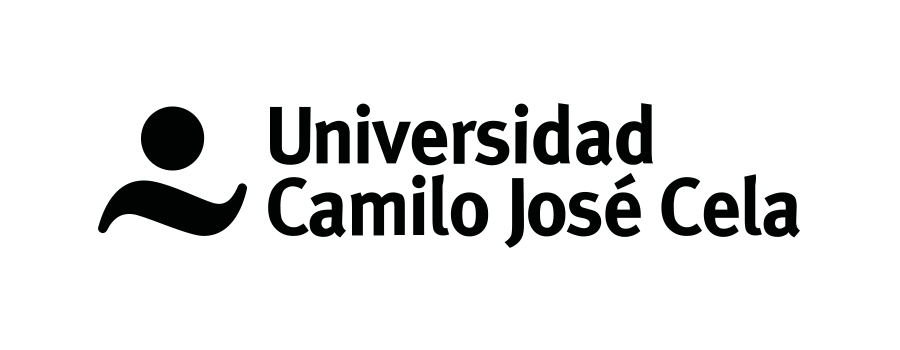

***

**Nombre y apellidos**: Alberto Fernández Santos

***

# Bloque 1: Ejercicios básicos de la prueba <a id="topic2"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

### 01 Ejercicio [1.5 puntos] 

Un analista de deportes quiere saber si existe una relación entre la variable número de bateos que realiza un equipo de béisbol (`numero_bateos`) y la variable dependiente, número de runs que consigue, (`runs`). Para ello contáis con la base de datos $\tt beisbol$ que se aporta debajo sobre diferentes equipos de la Major League Baseball (MLB) de los EE.UU. Realizar los siguientes apartados:

1. Exploración inicial de la base de datos 
2. Análisis de la existencia de relación lineal entre las variables
3. Estimación de un modelo de regresión lineal simple entre las variables
4. Interpretación de las salidas de estimación de un modelo de regresión lineal simple

In [1]:
# Base de datos beisbol MLB
equipos = c("Texas", "Boston", "Detroit", "Kansas", "St.", "New_S.", "New_Y.", "Milwaukee", "Colorado", "Houston", "Baltimore", "Los_An.", "Chicago", "Cincinnati", "Los_P.", "Philadelphia", "Chicago", "Cleveland", "Arizona", "Toronto", "Minnesota", "Florida", "Pittsburgh", "Oakland", "Tampa", "Atlanta", "Washington", "San.F", "San.I", "Seattle")
numero_bateos = c(5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421)
runs = c(855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654 , 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556)
beisbol = data.frame(equipos, numero_bateos, runs)

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

**PRESENTACIÓN DEL DATASET**

In [2]:
# Mostramos las 6 primeras filas del dataset
head(beisbol)

,equipos,numero_bateos,runs
,<chr>,<dbl>,<dbl>
1,Texas,5659,855
2,Boston,5710,875
3,Detroit,5563,787
4,Kansas,5672,730
5,St.,5532,762
6,New_S.,5600,718


In [3]:
# Resumen del dataset
cat('\nResumen del dataset:\n')
str(beisbol)

# Clase
cat('\nClase del dataset:\n')
class(beisbol)

# Dimensiones
cat('\nDimensiones del dataset:\n')
dim(beisbol)

# Variables
cat('\nNombre de las variables del dataset:\n')
names(beisbol)


Resumen del dataset:
'data.frame':	30 obs. of  3 variables:
 $ equipos      : chr  "Texas" "Boston" "Detroit" "Kansas" ...
 $ numero_bateos: num  5659 5710 5563 5672 5532 ...
 $ runs         : num  855 875 787 730 762 718 867 721 735 615 ...

Clase del dataset:


[1] "data.frame"


Dimensiones del dataset:


[1] 30  3


Nombre de las variables del dataset:


[1] "equipos"       "numero_bateos" "runs"

In [4]:
# Revisamos si existen valores NA
n_filas_NA = nrow(beisbol) - nrow(na.omit(beisbol)) # La función na.omit() devuelve el data.frame sin valores NA
cat('Número de filas con valores NA en el dataset =', n_filas_NA)

Número de filas con valores NA en el dataset = 0

In [5]:
# Revisamos si existen equipos duplicados en el dataset
table(beisbol$equipos)


     Arizona      Atlanta    Baltimore       Boston      Chicago   Cincinnati 
           1            1            1            1            2            1 
   Cleveland     Colorado      Detroit      Florida      Houston       Kansas 
           1            1            1            1            1            1 
     Los_An.       Los_P.    Milwaukee    Minnesota       New_S.       New_Y. 
           1            1            1            1            1            1 
     Oakland Philadelphia   Pittsburgh        San.F        San.I      Seattle 
           1            1            1            1            1            1 
         St.        Tampa        Texas      Toronto   Washington 
           1            1            1            1            1 

In [6]:
beisbol[beisbol$equipos == 'Chicago',]

,equipos,numero_bateos,runs
,<chr>,<dbl>,<dbl>
13,Chicago,5549,654
17,Chicago,5502,654


Se observa como en la columna de ``equipos``, aparece 2 veces "Chicago". Se supone que se trata de un error de transcripción ya que no es lógico que un solo equipo tenga el doble de número de bateos y runs en comparación con el resto de los equipos de la liga. Con el propósito de evitar errores de duplicidad en el resto de apartados, <mark>**se decide renombrar el equipo duplicado "Chicago" por "Chicago_A" y "Chicago_B"**</mark>:

In [7]:
beisbol$equipos[13] = 'Chicago_A'
beisbol$equipos[17] = 'Chicago_B'

In [8]:
# Verificamos de nuevo los equipos del dataset
table(beisbol$equipos)


     Arizona      Atlanta    Baltimore       Boston    Chicago_A    Chicago_B 
           1            1            1            1            1            1 
  Cincinnati    Cleveland     Colorado      Detroit      Florida      Houston 
           1            1            1            1            1            1 
      Kansas      Los_An.       Los_P.    Milwaukee    Minnesota       New_S. 
           1            1            1            1            1            1 
      New_Y.      Oakland Philadelphia   Pittsburgh        San.F        San.I 
           1            1            1            1            1            1 
     Seattle          St.        Tampa        Texas      Toronto   Washington 
           1            1            1            1            1            1 

**INTERPRETACIÓN DE RESULTADOS** Presentación del dataset ``beisbol``:

- El dataset está estructurado en un data.frame.
  
- El dataset registra el número de bateos y runs (carreras) de los equipos de la Major League Baseball (MLB) de los EE.UU.
  
- El dataset tiene un total de $30$ observaciones y $3$ variables. Resumen de las variables:
  
    - ``equipos`` (valores tipo cadena de caracteres): nombre de los equipos de la MLB.

    - ``numero_bateos`` (valores numéricos enteros): número de bateos.

    - ``runs`` (valores numéricos enteros): número de carreras.
      
- El dataset NO contiene valores NA.

**ANÁLISIS EXPLORATORIO**

In [9]:
# Principales estadísticos
summary(beisbol)

   equipos          numero_bateos       runs      
 Length:30          Min.   :5417   Min.   :556.0  
 Class :character   1st Qu.:5448   1st Qu.:629.0  
 Mode  :character   Median :5516   Median :705.5  
                    Mean   :5524   Mean   :693.6  
                    3rd Qu.:5575   3rd Qu.:734.0  
                    Max.   :5710   Max.   :875.0  

In [10]:
# Desviaciones estándar de las columnas numéricas
apply(beisbol[,sapply(beisbol, is.numeric)], MARGIN = 2, sd)

numero_bateos          runs 
     79.87307      82.47909

In [11]:
# Cargamos libreria que contiene la función skewness y kurtosis
library(e1071)

# Coeficientes de asimetría de las columnas numéricas
apply(beisbol[,sapply(beisbol, is.numeric)], MARGIN = 2, skewness)

# Coeficientes de curtosis de las columnas numéricas
apply(beisbol[,sapply(beisbol, is.numeric)], MARGIN = 2, kurtosis)

numero_bateos          runs 
    0.4622908     0.5199440

numero_bateos          runs 
   -0.6447216    -0.3617933

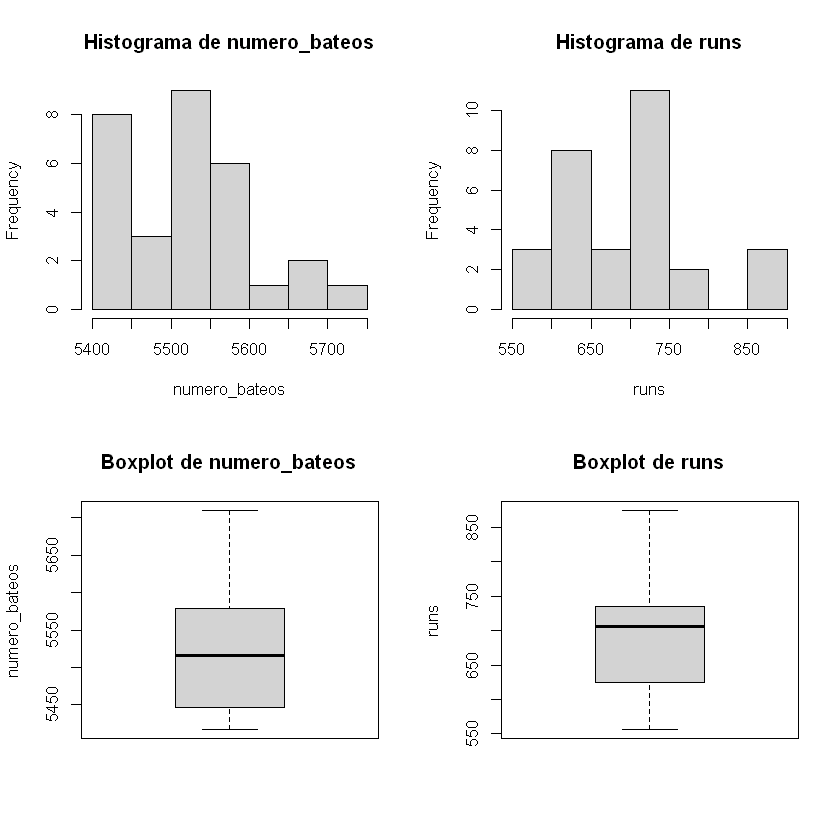

In [12]:
# ANÁLISIS GRÁFICO
# Creamos histogramas y diagramas de caja para las 2 variables de estudio

# Ajustamos el layout
par(mfrow=c(2,2))  # c(filas, columnas)

# Realizamos los histogramas  y diagramas de caja para cada variable numérica
hist(beisbol$numero_bateos, main="Histograma de numero_bateos", xlab="numero_bateos")
hist(beisbol$runs, main="Histograma de runs", xlab="runs")
boxplot(beisbol$numero_bateos, main = "Boxplot de numero_bateos", ylab = "numero_bateos")
boxplot(beisbol$runs, main = "Boxplot de runs", ylab = "runs")

# Reset del layout 
par(mfrow=c(1,1))

In [13]:
# Contamos el número de valores atípicos en cada variable

# Función para contar valores atípicos en un vector
contarAtipicos = function(vector) {
    
    # Calcular Q1, Q3 y IQR
    Q1 = quantile(vector, 0.25, na.rm = TRUE)
    Q3 = quantile(vector, 0.75, na.rm = TRUE)
    IQR = Q3 - Q1
    
    # Definir los límites para los valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Contar valores fuera de los límites
    atipicos = sum(vector < limite_inferior | vector > limite_superior, na.rm = TRUE)
    
    return(atipicos)
}

apply(beisbol[,sapply(beisbol, is.numeric)], MARGIN = 2, FUN = contarAtipicos)

numero_bateos          runs 
            0             0

In [14]:
# Indicamos los equipos con mayor y menor número de bateos
beisbol[beisbol$numero_bateos == max(beisbol$numero_bateos) | beisbol$numero_bateos == min(beisbol$numero_bateos), c('equipos', 'numero_bateos')]

,equipos,numero_bateos
,<chr>,<dbl>
2,Boston,5710
29,San.I,5417


In [15]:
# Indicamos los equipos con mayor y menor número de runs
beisbol[beisbol$runs == max(beisbol$runs) | beisbol$runs == min(beisbol$runs), c('equipos', 'runs')]

,equipos,runs
,<chr>,<dbl>
2,Boston,875
30,Seattle,556


**INTERPRETACIÓN DE LOS RESULTADOS** Interpretación del análisis exploratorio:

- Variable `numero_bateos`:
  
    - Valor mínimo 5417 (equipo "San.I") y máximo 5710 (equipo "Boston")`.
    
    - Media 5524 y mediana 5516. El valor de la media es ligeramente superior a la mediana, lo que sugiere que la distribución de la variable presenta una asimetría ligeramente positiva. Confirmamos este dato con el coeficiente de asimetría $g_1=0.46$. Por lo tanto, podemos afirmar que la mayoría de los valores se encuentran en la parte media-baja del rango con unos pocos valores extremos en la parte alta.
    
    - Desviación estándar de 79.87 (coeficiente de variación o $CV=1.45$) indicando poca variabilidad en el número de bateos realizados por los diferentes equipos.

    - No existen valores atípicos.

- Variable `runs`:

    - Valor mínimo 556 (equipo "Seattle") y máximo 875 (equipo "Boston")`.
    
    - Media 693.6 y mediana 705.5. El coeficiente de asimetría $g_1=0.52$ indica una distribución asimétrica positiva algo superior a la de la variable `numero_bateos`. Esto indica que los valores más altos de la variable `runs` son algo más extremos.
    
    - Desviación estándar de 82.48 (coeficiente de variación o $CV=11.89$). La variabilidad de `runs` es mayor a la de `numero_bateos`, lo que nos indica que existen equipos en la liga con mayor y menor nivel de efectividad para anotar carreras para un número de bateos dado.

    - No existen valores atípicos.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

**ANÁLISIS DE EXISTENCIA DE RELACIÓN LINEAL ENTRE VARIABLES**

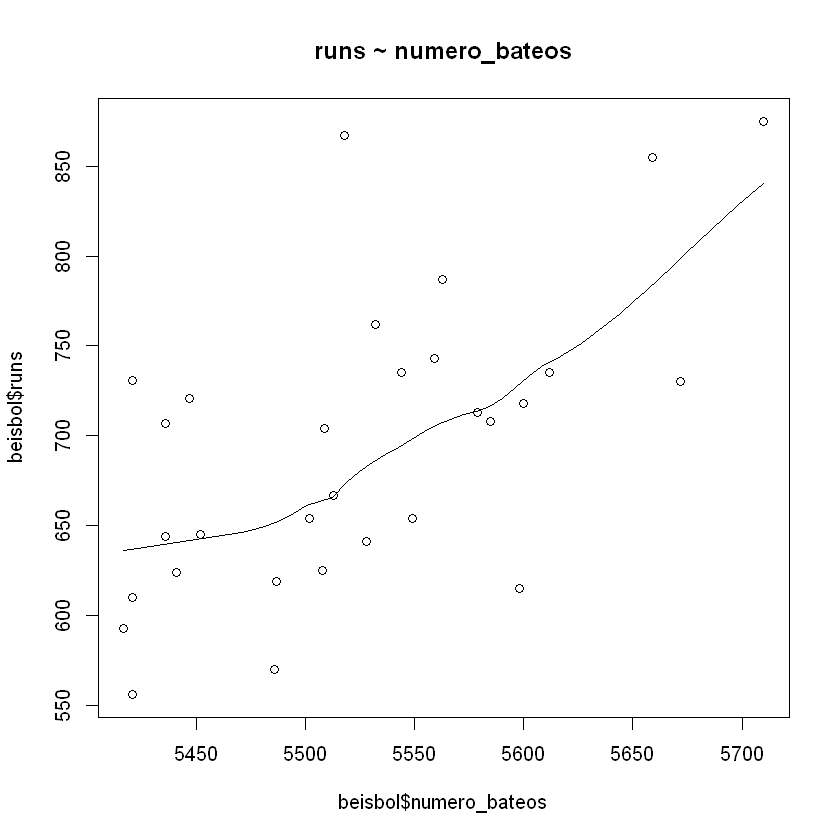

In [16]:
# Evidencia gráfica a través del gráfico de dispersión
scatter.smooth(x = beisbol$numero_bateos, y = beisbol$runs, main = "runs ~ numero_bateos")

**INTERPRETACIÓN DE RESULTADOS** El diagrama de dispersión del número de carreras en función del número de bateos sugiere la existencia de una relación positiva entre ambas variables (podemos observar como la curva suavizada tiene una tendencia alcista). Por lo tanto, la evidencia gráfica indica que, según aumenta el número de bateos, aumenta el número de carreras.

Sin embargo, en el gráfico se observa una variabilidad significativa (posiblemente por el tamaño reducido de la muestra) y consecuentemente, a continuación se evidencia numéricamente y se realiza el correspondiente contraste de hipótesis de relación lineal entre la variable dependiente `runs` e independiente `numero_bateos`:

In [17]:
# Antes de calcular la evidencia numérica mediante el método de Pearson, debemos verificar que
# ambas variables se ajusten a una distribución normal
# El contraste de bondad de ajuste lo realizaremos mediante el test K-S-L

# Cargamos la librería correspondiente
library(nortest)

In [18]:
# Calculamos p-valor de ambas variables para un nivel de significación del 5%
# H0 (Hipótesis Nula): la variable se ajusta a una distribución normal
# H1 (Hipótesis Alternativa): la variable NO se ajusta a una distribución normal
apply(beisbol[, sapply(beisbol, is.numeric)], MARGIN = 2, function(x) lillie.test(x)$p.value)

numero_bateos          runs 
    0.4004064     0.3582969

**INTERPRETACIÓN DE RESULTADOS** El contraste de bondad de ajuste devuelve un p-valor de $0.40$ y $0.36$ para las variables `numero_bateos` y `runs`, respectivamente. Dado que los valores obtenidos son superiores al nivel de significación $0.05$, NO podemos rechazar la Hipótesis Nula. Es decir, hay evidencia estadísticamente significativa de que las variables `numero_bateos` y `runs` se ajustan a una distribución normal y por lo tanto, podemos emplear el método de Pearson para evidenciar numéricamente y contrastar la relación lineal entre ambas variables:

In [19]:
# Contraste y evidencia numérica mediante el cálculo del coeficiente de correlación
# H0 (Hipótesis Nula): las variables son independientes (r = 0)
# H1 (Hipótesis Alternativa): las variables están correlacionadas (r != 0)
cor.test(x = beisbol$numero_bateos, y = beisbol$runs, method = 'pearson')


	Pearson's product-moment correlation

data:  beisbol$numero_bateos and beisbol$runs
t = 4.0801, df = 28, p-value = 0.0003388
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3209675 0.7958231
sample estimates:
     cor 
0.610627 


**INTERPRETACIÓN DE RESULTADOS** Al realizar el contraste de hipótesis de correlación mediante el método de Pearson para un nivel de significación del $0.05$, obtenemos un `p-valor` de $3.4e-4$. Consecuentemente, debemos rechazar la hipótesis nula en favor de la alternativa que indica que ambas variables están correlacionadas con un nivel de confianza del $95\%$.

El coeficiente de correlación es $0.61$. Por lo tanto, tal como había mostrado la evidencia gráfica, existe una correlación positiva entre variables. El valor de $0.61$ sugiere que la correlación entre ambas variables es moderada-significativa.

En conclusión, dado que las variables están relacionadas linealmente, podemos realizar la estimación de un modelo de regresión lineal simple con el propósito de predecir el número de carreras de un equipo en función del número de bateos.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

Modelo de Regresión Lineal Simple planteado:

\begin{align*}
runs_{i}&=\beta_{0}+\beta_{1}*numero\_bateos_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

Variables:

- $runs_{i}$: estimación del número de carreras (variable dependiente)
  
- $numero\_bateos_{i}$: número de bateos (variable independiente)
  
- $\beta_{0}$: ordenada en el orginen de la recta de regresión lineal
  
- $\beta_{1}$: pendiente de la recta de regresión lineal
  
- $epsilon_{i}$: error aleatorio (efecto de todas aquellas variables que influyen en la variable independiente  pero que no se incluyen en el modelo como variables explicativas)

In [20]:
# Creamos el Modelo de Regresión Lineal Simple (MRLS)
modelo = lm(runs ~ numero_bateos, data = beisbol)
modelo


Call:
lm(formula = runs ~ numero_bateos, data = beisbol)

Coefficients:
  (Intercept)  numero_bateos  
   -2789.2429         0.6305  


**INTERPRETACIÓN DE RESULTADOS** Interpretación de los coeficientes de regresión del MRLS estimado:

- $\beta_0=-2789.2429$: representa la ordendada en el origen. Para este caso, el número de carreras cuando el número de bateos es de 0. El valor no es interpretable debido a que el número de carreras debe ser 0 cuando el número de bateos es de 0.

- $\beta_1=0.6305$: representa la pendiente de la recta. Es decir, por cada aumento en una unidad en el número de bateos, se estima que el número de carreras incrementa aproximadamente 0.63 veces.

Representación del modelo estimado:
\begin{align*}
runs_{i}&=-2789.2429+0.6305*numero\_bateos_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [21]:
# Información de salida del MRLS
str(modelo)

List of 12
 $ coefficients : Named num [1:2] -2789.243 0.631
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "numero_bateos"
 $ residuals    : Named num [1:30] 76 63.8 68.5 -57.2 63 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ effects      : Named num [1:30] -3799 -271.2 55.1 -80.1 52.4 ...
  ..- attr(*, "names")= chr [1:30] "(Intercept)" "numero_bateos" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:30] 779 811 719 787 699 ...
  ..- attr(*, "names")= chr [1:30] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:30, 1:2] -5.477 0.183 0.183 0.183 0.183 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:30] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "numero_bateos"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.18 1.38
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 28
 $ xlevels     

**Output del modelo de regresión:**

In [22]:
# La función summary devuelve el output del modelo
summary(modelo)


Call:
lm(formula = runs ~ numero_bateos, data = beisbol)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2789.2429   853.6957  -3.267 0.002871 ** 
numero_bateos     0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


**INTERPRETACIÓN DE RESULTADOS** A continuación, se detalla la información de interés devuelta por la función `summary`:

- Principales estadísticos de los valores de error (columna `Residuals`):

    En esta tabla se observa el valor mínimo -125.58, primer cuartil -47.05, mediana -16.59, tercer cuartil 54.40 y máximo 176.87 de los residuos del modelo. Dichos valores se correponden a la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo (más abajo se calcula el vector de residuos).

- Coeficientes de regresión (columna `Estimate`):
  
    - $\beta_0=-2789.2429$: representa la ordendada en el origen. Para este caso, el número de carreras cuando el número de bateos es de 0. El valor no es interpretable debido a que el número de carreras debe ser 0 cuando el número de bateos es de 0.
    
    - $\beta_1=0.6305$: representa la pendiente de la recta. Es decir, por cada aumento en una unidad en el número de bateos, el número de carreras incrementa aproximadamente 0.63 veces.

- Errores típicos de los parámetros estimados (columna `Std. Error`):

  Estos valores indican la precisión con la que se ha estimado los coeficientes de regresión $\beta_0$ y $\beta_1$.
  
    - Error estándar de $\beta_0=853.6957$: indica que hay una variabilidad muy significativa en la estimación del número de carreras cuando no se tiene en cuenta la variable independiente del número de bateos.
      
    - Error estándar de $\beta_1=0.1545$: sugiere que hay mucha más precisión en la estimación del efecto del número de bateos sobre el número de carreras.

- P-valor para **Contraste de Significatividad Individual** sobre los parámetros estimados (columna `Pr(>|t|)`):
  
    - P-valor de $\beta_0=0.002871$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_0$. En otras palabras, $\beta_0$ es distinto de 0.
      
    - P-valor de $\beta_1=0.000339$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_1$. En otras palabras, $\beta_1$ es distinto de 0.

- Estimador de la desviación típica de los errores (valor de `Residual standard error`):
  
    - $SSR$ o $\sigma=66.47$: este valor indica la cantidad total de variabilidad en el número de carreras que no es capturada por el modelo. Un SSR de 66.47 puede ser interpretado como una indicación de que, aunque el número de bateos tiene un efecto sobre el número de carreras, hay otros muchos factores significativos que también afectan y que no están incluidos en el modelo estimado.

- Grados de libertad (valor de `degrees of freedom`):
  
    - $df=28$: este valor se obtiene de restar el número total de observaciones (30) y el número de parámetros estimados ($\beta_0$ y $\beta_1$). Los grados de libertad son importantes porque afectan a la precisión de las estimaciones de los parámetros y la robustez de las pruebas estadísticas. Un número mayor de grados de libertad generalmente indica una mayor confiabilidad en las conclusiones estadísticas derivadas del modelo, ya que se dispone de más datos para estimar los parámetros y evaluar el ajuste del modelo. No existe un criterio formal que indique qué es un número elevado o no de grados de libertad aunque si es menor, se suele identificar con una menor confiabilidad en los resultados. Dado que este dataset solo dispone de 30 observaciones, la confiabilidad en la estimación de los parámetros y robustez de las pruebas se puede considerar mínima.

- Coeficientes de determinación (valores de `Multiple R-squared` y `Adjusted R-squared`):
  
    - $R^{2}=0.3729$: indica que aproximadamente el 37% de la variabilidad en el número de carreras puede ser explicada por el número de bateos de un equipo. Este valor implica que, aunque existe una relación lineal entre ambas variables, hay otros factores significativos que sumados todos ellos, influyen con mayor peso en el número de carreras y que no están incluidos en el modelo. El $R^2$ de este tamaño sugiere que, el efecto de el número de bateos en el número de carreras es moderado, existiendo un 63% de la variabilidad atribuible a otros factores no contemplados en el modelo.
      
    - $R_{adj}^2=0.3505$: $R^2$ tiende a sobreestimar el proder predictivo del modelo, aunque las variables no sean significativas. Entonces, calculamos el coeficiente de determinación ajustado $R^2_{adj}$ que intenta corregir esto ya que penaliza la incorporación de nuevas variables independientes. En este caso, no es preocupación ya que tenemos una única variable independiente.

- P-valor para **Contraste de Significatividad Global** sobre los parámetros estimados (valor `p-value`):
  
    -  $p-valor=3.4e-4$: el valor es menor que el nivel de significación de $5\%$. Esto implica que los valores de los coeficientes de regresión son diferentes entre sí. Aunque ya lo habíamos comprobado utilizando el contraste de significatividad individual, obtenemos una doble evidencia, validando los resultados anteriores y dotando de mayor robustez a los mismos.

**Extracción de los valores ajustados de la variable dependiente:**

In [23]:
# Extracción directa de los valores ajustados de la variable dependiente
yhat_runs = modelo$fitted.values
head(yhat_runs)

1        2        3        4        5        6 
779.0395 811.1976 718.5067 787.2367 698.9597 741.8371

Los valores ajustados de la variable dependiente representan lo que el modelo anticipa que debería ser el número de carreras para un determinado número de bateos. La comparación de estos valores ajustados con los valores observados permite evaluar la precisión y utilidad del modelo. Si los valores ajustados se alinean estrechamente con los valores observados, indica que el modelo es un buen predictor. Sin embargo, las discrepancias entre los valores ajustados y observados pueden señalar limitaciones del modelo o la necesidad de considerar otras variables que también podrían influir en el número de carreras.

**Extracción de los errores estimados:**

In [24]:
# Extracción directa de los residuos del modelo
uhat_runs = modelo$residuals
head(uhat_runs)

1         2         3         4         5         6 
 75.96048  63.80243  68.49328 -57.23667  63.04033 -23.83707

Los errores o residuos son indicativos de la parte del número de carreras que no se puede explicar solo por el número de bateos.

Si los residuos son pequeños y distribuidos aleatoriamente alrededor de cero, sugiere que el modelo se ajusta bien a los datos y que el número de bateos es un buen predictor del número de carreras. Por otro lado, si los residuos son grandes o muestran algún patrón, esto puede indicar que el modelo no captura completamente la relación entre las variables, o que hay otras variables influyentes no consideradas en el modelo. Además, el análisis de los residuos es esencial para verificar suposiciones críticas del modelo, como la homocedasticidad (varianza constante de los residuos) y la normalidad.

Como hemos observado en el valor del coeficiente de determinación $R^2$ de 0.3729, existe un $63\%$ de la variabilidad del número de carreras atribuible a otros factores no contemplados en el modelo.

**Extracción de los intervalos de confianza para los coeficientes de regresión estimados:**

In [25]:
# Extracción de los intervalos de confianza para los coeficientes de regresión para un nivel de confianza del 95%
ci.bhat_runs = confint(modelo)
ci.bhat_runs

,2.5 %,97.5 %
(Intercept),-4537.9592982,-1040.5264727
numero_bateos,0.3139863,0.9471137


### 02 Ejercicio [1.5 puntos] 

El archivo de datos `USA.txt` contiene datos demográficos, sociales y económicos de los $50$ estados de los Estados Unidos más el distrito de Columbia el año que Barack Obama ganó sus segundas elecciones presidenciales. Estos datos han sido recopilados de diversas fuentes como el United States Census Bureau, el Pew Research Center y el Bureau of Labor Statistics. Explicar variable `obama` que representa el porcentaje de votos a Obama en esas elecciones para cada estado en función de la variable `grad_univ` que representa el porcentaje de graduados universitarios de cada estado, la variable `afro` que representa el porcentaje de afroamericanos de cada estado, la variable `hispanos` que representa el porcentaje de hispanohablantes de cada estado y la variable `blancos` que representa el porcentaje de personas para cada estado cuya tonalidad de piel es clara. Realizar los siguientes apartados:

1. Cargar el dataset en R y transformarlo en un dataframe
2. Exploración inicial de la base de datos 
3. Análisis de la existencia de relación lineal entre las variables seleccionadas
4. Estimación de un modelo de regresión lineal múltiple entre las variables seleccionadas
5. Interpretación de las salidas de estimación del modelo de regresión lineal múltiple obtenido

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [ ]:
# Cargamos dataset USA.txt en formato data.frame
df = read.table(file = 'datasets/usa.txt', header = TRUE, sep = ' ', dec = '.')

In [27]:
# Visualizamos las 6 primeras filas del dataset
head(df)

,estado,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,⋯,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,Alabama,3,94.4,8.1,51.5,82.6,22.3,26.2,1.1,3.9,⋯,49,1,18,6,1,13.8,8.0,43464,38.36,9
2,Alaska,4,1.2,10.1,48.0,91.6,27.5,3.3,5.4,5.5,⋯,26,19,2,14,4,7.7,7.6,63648,40.81,3
3,Arizona,4,56.3,8.2,50.3,85.4,26.6,4.1,2.8,29.6,⋯,23,15,2,25,4,13.8,8.4,47044,44.59,11
4,Arkansas,3,56.0,7.9,50.9,83.3,19.8,15.4,1.2,6.4,⋯,53,16,10,5,0,14.4,7.6,39018,36.88,6
5,California,4,239.1,5.0,50.3,81.0,30.5,6.2,13.0,37.6,⋯,18,14,4,31,2,11.4,10.4,57020,60.24,55
6,Colorado,4,48.5,8.1,49.9,89.9,36.7,4.0,2.8,20.7,⋯,23,19,2,19,2,10.9,7.8,57255,51.49,9


**INTERPRETACIÓN DE RESULTADOS** R nos permite leer y cargar en un data.frame un archivo de texto con información ordenada en filas y columnas mediante la separación de la información con un caracter delimitador. Parámetros empleados:

- `file`: nombre del archivo de texto guardado en la misma ruta que este jupyter notebook.

- `header`: indicamos explícitamente que la primera fila del archivo corresponde a las etiquetas de las columnas del dataset.

- `sep`: indicamos el caracter " " (espacio en blanco) como separador de valores.

- `dec`: indicamos el caracter "." (punto) como separador decimal de los valores numéricos.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

**PRESENTACIÓN DEL DATASET**

In [28]:
# Modificamos el data.frame quedándonos solo con las variables dependientes e independiente
df = df[,c('obama', 'grad_univ', 'afro', 'hispanos', 'blancos')]

# Mostramos las 6 primeras filas del dataset
head(df)

,obama,grad_univ,afro,hispanos,blancos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38.36,22.3,26.2,3.9,67.0
2,40.81,27.5,3.3,5.5,64.1
3,44.59,26.6,4.1,29.6,57.8
4,36.88,19.8,15.4,6.4,74.5
5,60.24,30.5,6.2,37.6,40.1
6,51.49,36.7,4.0,20.7,70.0


In [29]:
# Resumen del dataset
cat('\nResumen del dataset:\n')
str(df)

# Clase
cat('\nClase del dataset:\n')
class(df)

# Dimensiones
cat('\nDimensiones del dataset:\n')
dim(df)

# Variables
cat('\nNombre de las variables del dataset:\n')
names(df)


Resumen del dataset:
'data.frame':	51 obs. of  5 variables:
 $ obama    : num  38.4 40.8 44.6 36.9 60.2 ...
 $ grad_univ: num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro     : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ hispanos : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos  : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...

Clase del dataset:


[1] "data.frame"


Dimensiones del dataset:


[1] 51  5


Nombre de las variables del dataset:


[1] "obama"     "grad_univ" "afro"      "hispanos"  "blancos"

In [30]:
# Comprobamos si existen valores NA en el data.frame
nrow(df)
nrow(na.omit(df))

[1] 51

[1] 51

El data.frame creado que contiene las 4 variables independientes (`grad_univ`, `afro`, `hispanos` y `blancos`) y la variable dependiente (`obama`) NO presenta valores NA.

**INTERPRETACIÓN DE RESULTADOS** Presentación del dataset `df`:

- El dataset se ha guardado en la variable `df` tipo `data.frame`

- El dataset tiene un total de $51$ observaciones y $5$ variables. Resumen de las variables:

    - Variable dependiente:
    
        - ``obama`` (valores numéricos flotantes): representa el porcentaje en tanto por ciento de votos a Obama en cada uno de los estados de EEUU.
    
    -  Variables independientes:
    
        - `grad_univ` (valores numéricos flotantes): representa el porcentaje en tanto por ciento de graduados universitarios de cada estado.
        
        - `afro` (valores numéricos flotantes): representa el porcentaje en tanto por ciento de afroamericanos de cada estado.

        - `hispanos` (valores numéricos flotantes): representa el porcentaje en tanto por ciento de hispanohablantes de cada estado.
        
        - `blancos` (valores numéricos flotantes): representa el porcentaje en tanto por ciento de personas para cada estado cuya tonalidad de piel es clara. 
      
- El dataset NO presenta valores NA.

**EXPLORACIÓN DE LOS DATOS**

In [31]:
# Obtenemos los principales estadisticos
summary(df)

     obama         grad_univ          afro          hispanos        blancos    
 Min.   :24.75   Min.   :17.90   Min.   : 0.40   Min.   : 1.00   Min.   :22.7  
 1st Qu.:40.23   1st Qu.:24.70   1st Qu.: 3.10   1st Qu.: 3.05   1st Qu.:59.8  
 Median :50.67   Median :27.10   Median : 7.40   Median : 8.20   Median :74.5  
 Mean   :49.03   Mean   :28.23   Mean   :11.12   Mean   :10.21   Mean   :70.7  
 3rd Qu.:56.22   3rd Qu.:30.95   3rd Qu.:15.65   3rd Qu.:12.05   3rd Qu.:82.6  
 Max.   :90.91   Max.   :51.20   Max.   :50.70   Max.   :46.30   Max.   :94.4  

In [32]:
# Obtenemos las desviaciones estándar de cada variable
apply(df, MARGIN = 2, sd)

obama grad_univ      afro  hispanos   blancos 
11.810936  5.788205 11.021240 10.094712 16.167659

In [33]:
# Obtenemos los coeficientes de asimetría de cada variable
library(e1071)
apply(df, MARGIN = 2, skewness)

obama  grad_univ       afro   hispanos    blancos 
 0.6744378  1.2320774  1.4290557  1.8050021 -0.7608548

In [34]:
# Obtenemos los coeficientes de curtosis de cada variable
apply(df, MARGIN = 2, kurtosis)

obama grad_univ      afro  hispanos   blancos 
1.4401959 3.0098755 1.8524342 2.9377491 0.1959671

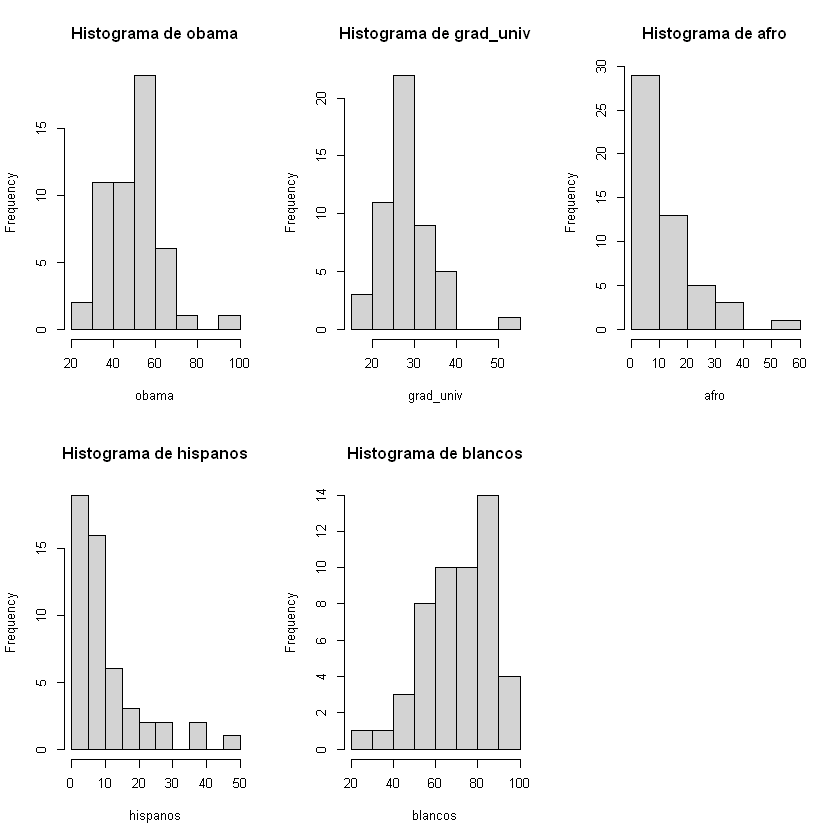

In [35]:
# ANÁLISIS GRÁFICO

# Creamos histogramas para las variables de estudio
# Ajustamos el layout
par(mfrow=c(2,3))  # c(filas, columnas)

# Dibujamos los histogramas para cada variable numérica
hist(df$obama, main="Histograma de obama", xlab="obama")
hist(df$grad_univ, main="Histograma de grad_univ", xlab="grad_univ")
hist(df$afro, main="Histograma de afro", xlab="afro")
hist(df$hispanos, main="Histograma de hispanos", xlab="hispanos")
hist(df$blancos, main="Histograma de blancos", xlab="blancos")

# Reset del layout 
par(mfrow=c(1,1))

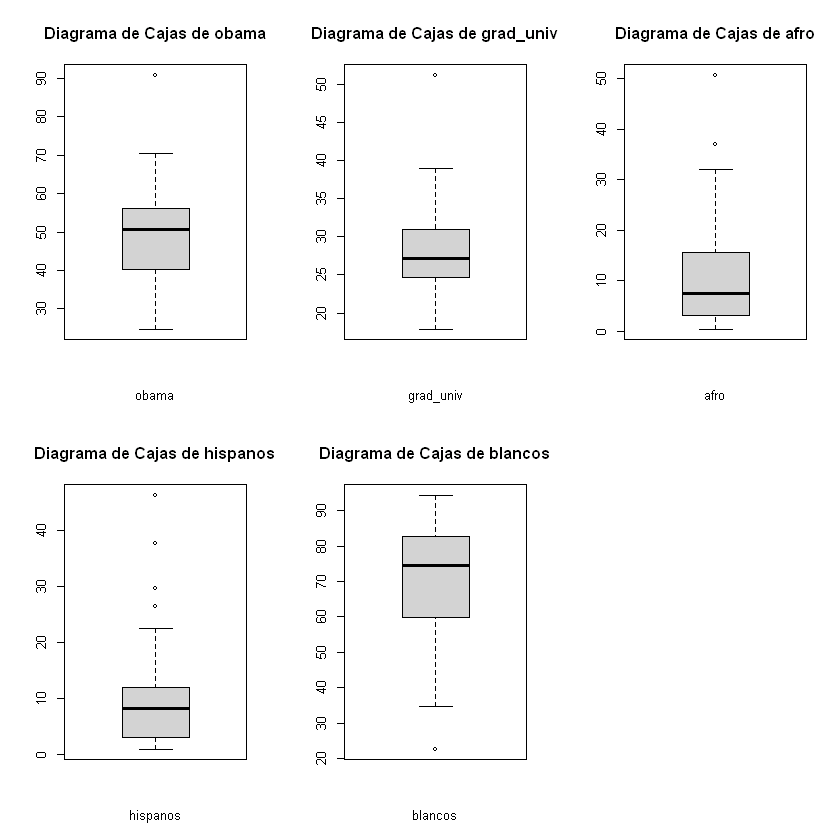

In [36]:
# Creamos diagramas de caja para las variables de estudio
# Ajustamos el layout
par(mfrow=c(2,3))  # c(filas, columnas)

# Dibujamos los histogramas para cada variable numérica
boxplot(df$obama, main="Diagrama de Cajas de obama", xlab="obama")
boxplot(df$grad_univ, main="Diagrama de Cajas de grad_univ", xlab="grad_univ")
boxplot(df$afro, main="Diagrama de Cajas de afro", xlab="afro")
boxplot(df$hispanos, main="Diagrama de Cajas de hispanos", xlab="hispanos")
boxplot(df$blancos, main="Diagrama de Cajas de blancos", xlab="blancos")

# Reset del layout 
par(mfrow=c(1,1))

In [37]:
# Calculamos el número de valores atípicos en cada variable

# Función para contar valores atípicos en un vector
contarAtipicos = function(vector) {
  # Calcular Q1, Q3 y IQR
  Q1 = quantile(vector, 0.25, na.rm = TRUE)
  Q3 = quantile(vector, 0.75, na.rm = TRUE)
  IQR = Q3 - Q1
  
  # Definir los límites para los valores atípicos
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  
  # Contar valores fuera de los límites
  atipicos = sum(vector < limite_inferior | vector > limite_superior, na.rm = TRUE)
  
  return(atipicos)
}

# Llamada a función contarAtipicos para calcular el número de valores atípicos de cada variable
apply(df, MARGIN = 2, FUN = contarAtipicos)

obama grad_univ      afro  hispanos   blancos 
        1         1         2         5         1

**INTERPRETACIÓN DE RESULTADOS** A continuación, se detalla los resultados obtenidos de la exploración de los datos y se incluye una interpretación de los mismos:

- Variable `obama` (porcentaje de votos a Obama en cada estado):

    - Rango de valores entre el 24.75% hasta el 90.91%.
    
    - Media de 49.03% y mediana de 50.67%. Valor de la media algo inferior a la mediana posiblemente por la presencia de estados con tendencia política republicana o conservadora donde la mayoría de los votos no fueron para Obama. Sin embargo, el valor de la mediana muestra como en la mayoría de los estados, más de la mitad de los votos fueron hacia el lider demócrata Obama.
    
    - Coeficiente de asimetría $g_1=0.67$, indicando una distribución ligeramente positiva. Además, en el histograma podemos observar como la mayoría de porcentajes de voto se encuentran en la parte media-baja del rango.
    
    - Deviación estándar de 11.81% lo que indica cierta varibilidad en los votos de los distintos estados.
    
    - Se observa la presencia de 1 valor atípico en la parte superior del rango con un porcentaje de voto del 90.91%, siendo este estado en el que Obama obtuvo un mayor triunfo.

- Variable `grad_univ` (porcentaje de graduados universitarios en cada estado):

    - Rango de valores entre el 17.90% hasta el 51.20%.
    
    - Media de 28.23% y mediana de 27.10%. Valor de la media algo superior al de la mediana, sugiriendo que la distribución de esta variable presenta algo de simetría positiva. Confirmamos este punto con el coeficiente de asimetría $g_1=1.23$. Se observa como solo unos pocos estados gozan con tasas de graduados universitarios superiores al 50%, posiblemente dichos estados sean los que disfruten de mayor estabilidad socioeconómica. La presencia de estos estados provoca que el valor de la media sea algo superior al de la mediana.
    
    - Desviación estándar de 5.79%. Este valor puede ser interpretado como una baja variabilidad entre diferentes estados en lo que a porcentaje de graduados universitarios se refiere. Esta variable es la que menor variabilidad presenta.
    
    - Se observa la presencia de 1 valor atípico en la parte superior del rango con un porcentaje de voto del 51.20%, siendo este estado en el que goza de mayor porcentaje de graduados universitarios.

- Variable `afro` (porcentaje de afroamericanos en cada estado):

    - Rango de valores entre el 0.40% hasta el 50.70%.
    
    - Media de 11.12% y mediana de 7.40%. Valor de la media significativamente superior al de la mediana, sugiriendo que la distribución de esta variable presenta una simetría significativamente positiva. Confirmamos este punto con el coeficiente de asimetría $g_1=1.43$. Se observa como en la mayoría de los estados la representación de afroamericanos es minoritaria y similar a la de hispanohablantes.
    
    - Desviación estándar de 11.02%, indicando variabilidad entre los distintos estados en lo que a representación afroamericana se refiere.
    
    - Se observa la presencia de 2 valores atípicos en la parte superior del rango con porcentajes de representación afroamericana superiores al 35%, teniendo sentido que una minoría de gente que comparte mismas raíces y cultura, se junte en unos pocos estados.

- Variable `hispanos` (porcentaje de hispanohablantes en cada estado):

    - La distribución de hispanos representa bastantes similitudes con la de afroamericanos 

    - Rango de valores entre el 1.00% hasta el 46.30%.
    
    - Media de 8.20% y mediana de 10.21%. Valor de la media significativamente superior al de la mediana, sugiriendo que la distribución de esta variable presenta una simetría significativamente positiva. Confirmamos este punto con el coeficiente de asimetría $g_1=1.81$. Se observa como en la mayoría de los estados la representación de hispanohablantes es minoritaria y similar a la de afroamericanos.
    
    - Desviación estándar de 10.09%, indicando variabilidad entre los distintos estados en lo que a representación hispanohablante se refiere.
    
    - Se observa la presencia de 5 valores atípicos en la parte superior del rango con porcentajes de representación hispanohablante superiores al 35%.

- Variable `blancos` (porcentaje de personas con tono de piel claro en cada estado):

    - Rango de valores entre el 22.70% hasta el 94.40%. En el rango ya podemos observar como la gente blanca es mayoritaria en el país.
    
    - Media de 70.70% y mediana de 74.70%. Valor de la media menor al de la mediana, sugiriendo que la distribución de esta variable presenta una simetría moderadamente negativa. Confirmamos este punto con el coeficiente de asimetría $g_1=0.76$. Se observa como en la mayoría de los estados, las personas blancas representan a la mayoría de la población y posiblemente, en aquellos estados donde la representación blanca es mínima, coincida con los estados donde la representación afroamericana e hispanohablante sea máxima
    
    - Desviación estándar de 16.17%. Podemos interpretar este valor como una significativa variabilidad en los porcentajes de personas blancas entre los distintos estados, siendo esta variable la que representa la mayor variabilidad entre todas las variables del estudio.
    
    - Se observa la presencia de 1 valor atípico en la parte baja del rango con porcentajes de representación blanca de aproximadamente el 20%. Como se ha comentado, posiblemente este estado corresponda al de mayor representación afroamericana y/o hispanohablante.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

**ANÁLISIS DE EXISTENCIA DE RELACIÓN LINEAL ENTRE VARIABLES**

In [38]:
# Antes de calcular la evidencia numérica mediante el método de Pearson, debemos verificar que
# las variables se ajusten a una distribución normal
# El contraste de bondad de ajuste lo realizaremos mediante el test K-S-L

# Calculamos p-valor de ambas variables para un nivel de significación del 5%
# H0 (Hipótesis Nula): la variable se ajusta a una distribución normal
# H1 (Hipótesis Alternativa): la variable NO se ajusta a una distribución normal
apply(df, MARGIN = 2, function(x) lillie.test(x)$p.value)

obama    grad_univ         afro     hispanos      blancos 
6.177240e-01 1.377534e-01 1.322260e-03 5.897892e-06 1.331648e-01

**INTERPRETACIÓN DE RESULTADOS**

El `p-valor` obtenido de la bondad de ajuste es inferior al nivel de significación del $5\%$ para las siguientes variables:

- `afro`
  
- `hispanos`

En este par de variables tenemos que rechazar la hipótesis nula de bondad de ajuste o en otras palabras, ambas variables no se ajustan a una distribución normal.

El `p-valor` obtenido de la bondad de ajuste es superior al nivel de significación del $5\%$ para las siguientes variables:

- `obama`
  
- `grad_univ`

- `blancos`

En estas tres variables NO podemos rechazar la hipótesis nula en favor de la alternativa. Por lo tanto, existe evidencia estadísticamente significativa de que estas tres variables se ajustan a una distribución normal.


En conclusión, dado que no todas las variables se ajustan a una distribución normal, **NO podemos emplear el método de Pearson para calcular y contrastar la relación lineal entre variables, en su defecto, emplearemos el método de Spearman el cual no precisa de la condición de normalidad**.

In [39]:
# Cargamos libreria para evidenciar gráficamente la correlación lineal entre las variables
library(psych)

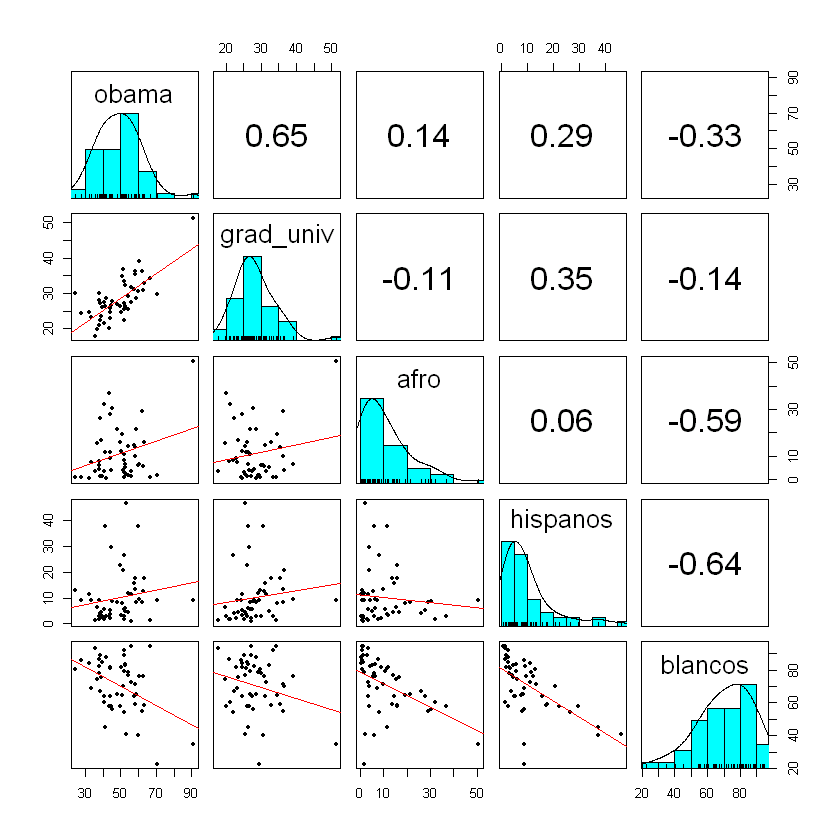

In [40]:
# Evidencia gráfica y numérica a través del gráfico de dispersión (caso múltiple)
pairs.panels(df, ellipses = FALSE, lm = TRUE, method = "spearman")

**INTERPRETACIÓN DE RESULTADOS** Con la función `pairs.panels` obtenemos los diagramas de dispersión junto con las rectas de regresión y los coeficientes de correlación de todos los pares de variables del dataset. Como se ha comentado anteriormente, se ha empleado el método de Spearman dado que no todas las variables del dataset se ajustan a una distribución normal.

Para nuestro caso, nos tenemos que fijar en la primera fila donde podemos ver los coeficientes de correlación entre la variable dependiente `obama` y las variables independientes `grado_univ`, `afro`, `hispanos` y `blancos`. Además, la primera columna muestra la evidencia gráfica.

Resultados obtenidos:

- Relación lineal positiva significativa entre `obama` y `grado_univ` con coeficiente de correlación $r=0.65$. Entre todas las variables sometidas a estudio, el porcentaje de graduados universitarios de un estado es la variable que más correlación tiene con el porcentaje de votos a Obama. Por lo tanto, esto nos sugiere que el candidato demócrata tuvo su mayor éxito en aquellos estados con mayores tasas de graduados universitarios.

- Relación lineal positiva débil entre `obama` y `afro` con coeficiente de correlación $r=0.14$. Dado el bajo nivel de correlación obtenido, habrá que contrastar la hipótesis de correlación para asegurarnos que existe una relación lineal directa entre el porcentaje de afroamericanos de un estado y el porcentaje de votos a Obama.

- Relación lineal positiva leve entre `obama` e `hispanos` con coeficiente de correlación $r=0.29$. La correlación obtenido entre el porcentaje de hispanohablantes de un estado y el porcentaje de votos a Obama es algo superior a la obtenida con el porcentaje de afroamericanos. Podemos observar como las minorias sociales (afroamericanos e hispanohablantes) se decantaron por votar las políticas progresistas del candidato demócrata Obama debido dada la correlación positiva existente en estas variables.

- Relación lineal inversa leve entre `obama` y `blancos` con coeficiente de correlación $r=-0.33$. De las tres etnias sometidas a estudio, la relación entre porcentaje de piel clara y votos a Obama es la única con una correlación inversa o negativa. Es decir, en aquellos estados donde el porcentaje de gente de piel clara es mayor, la tendencia fue votar a la alternativa de Obama. Posiblemente estos estados optaran por votar políticas más conservadoras de los republicanos.

A continuación, realizaremos el contraste de hipótesis de correlación con el propósito de confirmar la existencia de relación lineal entre la variable dependiente con las independientes.

In [41]:
# Contraste y evidencia numérica mediante el cálculo del coeficiente de correlación
# H0 (Hipótesis Nula): las variables son independientes (r = 0)
# H1 (Hipótesis Alternativa): las variables están correlacionadas (r != 0)
cor.test(x = df$grad_univ, y = df$obama, method = 'spearman')
cor.test(x = df$afro, y = df$obama, method = 'spearman')
cor.test(x = df$hispanos, y = df$obama, method = 'spearman')
cor.test(x = df$blancos, y = df$obama, method = 'spearman')

Warning message in cor.test.default(x = df$grad_univ, y = df$obama, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  df$grad_univ and df$obama
S = 7674.3, p-value = 2.094e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6527445 


Warning message in cor.test.default(x = df$afro, y = df$obama, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  df$afro and df$obama
S = 19087, p-value = 0.3401
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.136341 


Warning message in cor.test.default(x = df$hispanos, y = df$obama, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  df$hispanos and df$obama
S = 15796, p-value = 0.04245
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2852682 


Warning message in cor.test.default(x = df$blancos, y = df$obama, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  df$blancos and df$obama
S = 29286, p-value = 0.0199
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3251731 


**INTERPRETACIÓN DE RESULTADOS** A continuación, se indican los `p-valor` obtenidos en los contrastes de hipótesis entre la variable dependiente y las independientes:

- Entre los pares de variables `obama`-`grad_univ`, `obama`-`hispanos` y `obama`-`blancos`, se ha obtenidos unos `p-valor` de $2.094e-07$, $0.04245$ y $0.0199$, respectivamente. Dado que los valores obtenidos son inferiores al nivel de significación de $0.05$, podemos rechazar la hipótesis nula en favor de la alternativa. Es decir, hay evidencia estadísticamente significativa de que las variables independientes `grad_univ`, `hispanos` y `blancos`, están cada una de ellas relacionadas linealmente con la variable dependiente `obama`.

- Por el contrario, se ha obtenido un `p-valor` de $0.3401$ entre las variables `obama`-`afro`. En este caso, no podemos rechazar la hipótesis nula y consecuentemente, la relación entre el porcentaje de afroamericanos de un estado y el porcentaje de votos a Obama NO es significativa.

En conclusión, NO podemos incluir la variable `afro` en nuestro Modelo de Regresión Lineal Múltiple por no cumplirse la correlación entre ambas variables. Por lo tanto, nuestro MRLM tendrá la siguiente forma:

\begin{align*}
obama_{i}&=\beta_{0}+\beta_{1}*grad\_univ_{i}+\beta_{2}*hispanos_{i}+\beta_{3}*blancos_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

Variables:

- $obama_{i}$: estimación de porcentaje de votos a Obama en un estado de EEUU (variable dependiente).

- $\beta_{0}$: estimación de porcentaje de votos a Obama sin influencia o con independencia del porcentaje de graduados universitarios, personas hispanas o blancas.

- $grad\_univ_{i}$: porcentaje de graduados universitarios en un estado de EEUU (variable independiente).

- $\beta_{1}$: coeficiente de correlación entre las variables `obama` y `grad_univ`

- $hispanos_{i}$: porcentaje de personas hispanohablantes en un estado de EEUU (variable independiente).

- $\beta_{2}$: coeficiente de correlación entre las variables `obama` y `hispanos`

- $blancos_{i}$: porcentaje de personas blancas en un estado de EEUU (variable independiente).

- $\beta_{3}$: coeficiente de correlación entre las variables `obama` y `blancos`

- $epsilon_{i}$: error aleatorio o residuo (efecto de todas aquellas variables que influyen en la variable independiente pero que no se incluyen en el modelo como variables explicativas).

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [42]:
# Creamos Modelo de Regresión Lineal Múltiple
modelo = lm(obama ~ grad_univ + hispanos + blancos, data = df)
modelo


Call:
lm(formula = obama ~ grad_univ + hispanos + blancos, data = df)

Coefficients:
(Intercept)    grad_univ     hispanos      blancos  
    31.9948       1.3181      -0.1661      -0.2614  


**INTERPRETACIÓN DE RESULTADOS** Resultado obtenido e interpretación de los coeficientes de regresión del MRLM:

- $\beta_0=31.9948$: representa el porcentaje de votos a Obama en un estado de EEUU cuando el porcentaje de graduados universitarios, personas hispanohablantes y blancas del estado es igual a 0. Es decir, el valor de la variable dependiente cuando no está afectada por las variables independientes.

- $\beta_1=1.3181$: este coeficiente de regresión indica que por cada aumento porcentual en una unidad de graduados universitarios, el porcentaje de votos a Obama aumenta un $132\%$. Analizando los coeficientes de regresión, podemos observar como la variable `grad_univ` es la que más efecto tiene en el porcentaje de votos a Obama.

- $\beta_2=-0.1661$: este coeficiente de regresión indica que por cada aumento porcentual en una unidad de personas hispanohablantes en el estado, el porcentaje de votos a Obama disminuye un $17\%$. A tener en cuenta, a la hora de calcular el coeficiente de correlación entre `obama` e `hispanos` se obtuvo una correlación positiva. Por lo tanto, posiblemente debido a un problema de multicolinealidad entre las variables independientes, ahora se está obteniendo un coeficiente de regresión negativo que indica una correlación inversa entre las variables.

- $\beta_2=-0.2614$: este coeficiente de regresión indica que por cada aumento porcentual en una unidad de personas blancas en el estado, el porcentaje de votos a Obama disminuye un $26\%$.

Representación del modelo de regresión lineal múltiple:

\begin{align*}
obama_{i}&=31.9948+1.3181*grad\_univ_{i}-0.1661*hispanos_{i}-0.2614*blancos_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

Variables:

- $obama_{i}$: estimación de porcentaje de votos a Obama en un estado de EEUU (variable dependiente).

- $grad\_univ_{i}$: porcentaje de graduados universitarios en un estado de EEUU (variable independiente).

- $hispanos_{i}$: porcentaje de personas hispanohablantes en un estado de EEUU (variable independiente).

- $blancos_{i}$: porcentaje de personas blancas en un estado de EEUU (variable independiente).

- $epsilon_{i}$: error aleatorio o residuo (efecto de todas aquellas variables que influyen en la variable independiente pero que no se incluyen en el modelo como variables explicativas).

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

In [43]:
# Información de salida del Modelo de Regresión Lineal Múltiple o MRLM
str(modelo)

List of 12
 $ coefficients : Named num [1:4] 31.995 1.318 -0.166 -0.261
  ..- attr(*, "names")= chr [1:4] "(Intercept)" "grad_univ" "hispanos" "blancos"
 $ residuals    : Named num [1:51] -4.865 -9.762 -2.44 -0.673 4.771 ...
  ..- attr(*, "names")= chr [1:51] "1" "2" "3" "4" ...
 $ effects      : Named num [1:51] -350.11 59.75 -5.76 -23.08 5.1 ...
  ..- attr(*, "names")= chr [1:51] "(Intercept)" "grad_univ" "hispanos" "blancos" ...
 $ rank         : int 4
 $ fitted.values: Named num [1:51] 43.2 50.6 47 37.6 55.5 ...
  ..- attr(*, "names")= chr [1:51] "1" "2" "3" "4" ...
 $ assign       : int [1:4] 0 1 2 3
 $ qr           :List of 5
  ..$ qr   : num [1:51, 1:4] -7.14 0.14 0.14 0.14 0.14 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:51] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:4] "(Intercept)" "grad_univ" "hispanos" "blancos"
  .. ..- attr(*, "assign")= int [1:4] 0 1 2 3
  ..$ qraux: num [1:4] 1.14 1 1.29 1
  ..$ pivot: int [1:4] 1 2 3 4
  ..$ tol  : num 1e-07
  ..$ ran

**Output del modelo de regresión:**

In [44]:
# La función summary devuelve el output del modelo
summary(modelo)


Call:
lm(formula = obama ~ grad_univ + hispanos + blancos, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.4779  -4.6450   0.1355   5.8230  14.3982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.99476    9.90541   3.230  0.00226 ** 
grad_univ    1.31815    0.19592   6.728 2.11e-08 ***
hispanos    -0.16608    0.13780  -1.205  0.23413    
blancos     -0.26145    0.08801  -2.971  0.00467 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.771 on 47 degrees of freedom
Multiple R-squared:  0.5931,	Adjusted R-squared:  0.5671 
F-statistic: 22.83 on 3 and 47 DF,  p-value: 2.89e-09


**INTERPRETACIÓN DE RESULTADOS** A continuación, se detalla la información de interés devuelta por la función `summary`:

- Principales estadísticos de los valores de error (columna `Residuals`):

    En esta tabla se observan los valores mínimos, primer cuartil, mediana, tercer cuartil y máximos de los valores de error. Dichos valores se correponden a la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo (más abajo se calcula el vector de errores).

- Coeficientes de regresión (columna `Estimate`):

    - $\beta_0=31.99476$
      
    - $\beta_1=1.31815$

    - $\beta_2=-0.16608$

    - $\beta_3=-0.26145$
      
      **En el apartado anterior se ha incluido la interpretación de estos coeficientes de regresión**.

- Errores típicos de los parámetros estimados (columna `Std. Error`):

  Estos valores indican la precisión con la que se ha estimado los coeficientes de regresión.
  
    - Error estándar de $\beta_0=9.90541$: indica que hay una variabilidad muy alta en la estimación del porcentaje de votos a Obama cuando no existe la influencia de las variables independientes consideradas o en otras palabras, cuando el valor de todas las variables independientes es igual a 0.
      
    - Error estándar de $\beta_1=0.19592$: existe una variabilidad leve-moderada en la estimación del efecto del porcentaje de graduados universitarios sobre el porcentaje de votos a Obama.

    - Error estándar de $\beta_2=0.13780$: el valor obtenido indica la existencia de una variabilidad leve en la estimación del efecto del porcentaje de hispanohablantes sobre el porcentaje de votos a Obama.

    - Error estándar de $\beta_3=0.08801$: indicando una variabilidad leve en la estimación del efecto porcentaje de personas blancas sobre el porcentaje de votos a Obama.

- P-valor para **Contraste de Significatividad Individual** sobre los parámetros estimados (columna `Pr(>|t|)`):
  
    - P-valor de $\beta_0=0.00226$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_0$ (el coeficiente NO es igual a 0)
      
    - P-valor de $\beta_1=2.11e-08$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_1$ (el coeficiente NO es igual a 0).

    - P-valor de $\beta_2=0.23413$: el valor es mayor que el nivel de significación de $5\%$. Por lo tanto, **hay evidencia estadísticamente significativa de que el coeficiente de regresión $\beta_2=0$. Por lo tanto, se debe eliminar la variable `hispanos` del modelo ya que la relación con la variable dependiente es espúrea**.
      
    - P-valor de $\beta_3= 0.00467$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_1$ (el coeficiente NO es igual a 0).

- Estimador de la desviación típica de los errores (valor de `Residual standard error`):
  
    - $SSR$ o $\sigma=7.771$: este valor indica la cantidad total de variabilidad en el porcentaje de votos a Obama que no es capturada por el modelo. Un SSR de 7.771 puede ser interpretado como una indicación de que, aunque las variables independientes tienen un efecto sobre el porcentaje de votos a Obama, hay otros factores significativos que también afectan y que no están incluidos en el modelo actual.

- Grados de libertad (valor de `degrees of freedom`):
  
    - $df=47$: este valor se obtiene de restar el número total de observaciones (51) y el número de parámetros estimados ($\beta_0$, $\beta_1$ , $\beta_2$ y $\beta_3$). Los grados de libertad son importantes porque afectan a la precisión de las estimaciones de los parámetros y la robustez de las pruebas estadísticas. Un número mayor de grados de libertad generalmente indica una mayor confiabilidad en las conclusiones estadísticas derivadas del modelo, ya que se dispone de más datos para estimar los parámetros y evaluar el ajuste del modelo. No existe un criterio formal que indique qué es un número elevado o no de grados de libertad aunque si es menor, se suele identificar con una menor confiabilidad en los resultados. Para este caso, no sería posible aumentar el tamaño de la muestra ya que no existen más estados en EEUU.

- Coeficientes de determinación (valores de `Multiple R-squared` y `Adjusted R-squared`):
  
    - $R^{2}=0.5931$: indica que aproximadamente el 59% de la variabilidad en el porcentaje de votos a Obama puede ser explicada por las variables independientes consideradas en el modelo. Además, podemos interpretar que aunque existe una relación lineal entre las variables independientes con la dependiente, hay otros factores significativos que influyen aproximadamente un $41\%$ en el porcentaje de votos a Obama y que no están incluidos en el modelo.
      
    - $R_{adj}^2=0.5671$: $R^2$ tiende a sobreestimar el proder predictivo del modelo, aunque las variables no sean significativas. Entonces, calculamos el coeficiente de determinación ajustado $R^2_{adj}$ que intenta corregir esto ya que penaliza la incorporación de nuevas variables independientes.

- P-valor para **Contraste de Significatividad Global** sobre los parámetros estimados (valor `p-value`):
    -  $p-valor=2.89e-09$: el valor es menor que el nivel de significación de $5\%$. Esto implica que los valores de los coeficientes de regresión son diferentes entre sí. Aunque ya lo habíamos comprobado utilizando el contraste de significatividad individual, obtenemos una doble evidencia, validando los resultados anteriores y dotando de mayor robustez a los mismos.

Indicamos la representación del Modelo de Regresión Lineal Múltiple obtenido tras realizar los contrastes de significatividad:

\begin{align*}
obama_{i}&=31.9948+1.3181*grad\_univ_{i}+0*hispanos_{i}-0.2614*blancos_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

Variables:

- $obama_{i}$: estimación de porcentaje de votos a Obama en un estado de EEUU (variable dependiente).

- $grad\_univ_{i}$: porcentaje de graduados universitarios en un estado de EEUU (variable independiente).

- $hispanos_{i}$: porcentaje de personas hispanohablantes en un estado de EEUU (variable independiente). <u>Variable no significativa para el modelo ya que su respectivo coeficiente de regresión es igual a 0</u>.

- $blancos_{i}$: porcentaje de personas blancas en un estado de EEUU (variable independiente).

- $epsilon_{i}$: error aleatorio o residuo (efecto de todas aquellas variables que influyen en la variable independiente pero que no se incluyen en el modelo como variables explicativas).

**Extracción de los valores ajustados de la variable dependiente:**

In [45]:
# Extracción directa de los valores ajustados de la variable dependiente
yhat_obama = modelo$fitted.values
head(yhat_obama)

1        2        3        4        5        6 
43.22478 50.57162 47.02976 37.55333 55.46949 58.63157

Los valores ajustados de la variable dependiente representan lo que el modelo anticipa que debería ser el porcentae de votos a Obama para un determinado valor en las variables independientes del modelo. La comparación de estos valores ajustados con los valores observados permite evaluar la precisión y utilidad del modelo. Si los valores ajustados se alinean estrechamente con los valores observados, indica que el modelo es un buen predictor. Sin embargo, las discrepancias entre los valores ajustados y observados pueden señalar limitaciones del modelo o la necesidad de considerar otras variables que también podrían influir en la variable dependiente.

**Extracción de los errores estimados:**

In [46]:
# Extracción directa de los residuos
uhat_obama = modelo$residuals
head(uhat_obama)

1          2          3          4          5          6 
-4.8647777 -9.7616204 -2.4397618 -0.6733324  4.7705066 -7.1415691

Los errores o residuos son indicativos de la parte del porcentaje de votos a Obama que no se puede explicar por el efecto de las variables independientes consideradas en el modelo. Si los residuos son pequeños y distribuidos aleatoriamente alrededor de cero, sugiere que el modelo se ajusta bien a los datos y que las variables independientes son un buen predictor de la variable dependiente. Por otro lado, si los residuos son grandes o muestran algún patrón, esto puede indicar que el modelo no captura completamente la relación entre las variables, o que hay otras variables influyentes no consideradas en el modelo. Además, el análisis de los residuos es esencial para verificar suposiciones críticas del modelo, como la homocedasticidad (varianza constante de los residuos) y la normalidad.

Como hemos observado en el valor del coeficiente de determinación $R^2$ de 0.5931, existe aproximadamente un 41% de la variabilidad del porcentaje de votos a Obama atribuible a otros factores no contemplados en el modelo.

**Extracción de los intervalos de confianza para los coeficientes de regresión estimados:**

In [47]:
# Extracción de los intervalos de confianza para los coeficientes de regresión para un nivel de confianza del 95%
ci.bhat_obama = confint(modelo)
ci.bhat_obama

,2.5 %,97.5 %
(Intercept),12.0676484,51.92187887
grad_univ,0.9240161,1.71228391
hispanos,-0.4432999,0.11113024
blancos,-0.4385038,-0.08439169


### 03 Ejercicio [2 puntos] 

Utilizando el dataset del ejercicio anterior encontrar de forma automática el mejor modelo de regresión lineal múltiple para explicar la variable `obama` en función del resto de variables excepto `estado`. Comparar sus métricas y realizar la diagnosis del modelo de regresión elegido. Es decir, tenéis que hacer los siguientes pasos: 

1. Criterios de selección del modelo en base al ajuste de los datos
2. Proceso de automatización del proceso de selección del mejor modelo
3. Requisitos y validación del mejor modelo seleccionado en base al ajuste de los datos

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

En los modelos de regresión lineal múltiple la **comparación de modelos** se realizará <u>cambiando las variables independientes</u> entre todas las que se consideren en la base de datos para ver con cuál obtenemos un mejor ajuste. Por tanto, surge la idea de determinar de forma objetiva cuál es el mejor modelo, en el sentido de cuál es el conjunto de variables independientes que expliquen la mayor cantidad de varianza posible. Así, llegamos a la cuestión de qué criterio utilizar para comparar dos modelos de regresión lineal múltiple con diferentes variables. Emplearemos los siguientes **criterios de selección de modelos** para este fin:

1. Comparación del **coeficiente de determinación ajustado**: el modelo con un mayor $R^2_{adj}$ será el mejor de los comparados. $R^2_{adj}$ determina la capacidad explicativa del modelo.


2. Comparación de los **criterios de información** de Akaike (AIC) y Bayesiano (BIC): cuanto menor sea el valor, mejor será el ajuste realizado. La diferencia entre AIC y BIC es la severidad con la que penalizan el número de parámetros considerados. La fórmula de cada uno de ellos es la siguiente:

- $AIC = n\ln \left( {SSR/n} \right) + 2k$

- $BIC = n\ln \left( {SSR/n} \right) + k\ln \left( n \right)$

Donde $SSR$ indica la suma de los cuadrados de los residuos, cuantifica cuánta información de la variable dependiente se pierde con el modelo, el número de variables utilizado $k$ y el número total de observaciones $n$. A menores valores de $AIC$ y $BIC$, menor será la pérdida de información del modelo estimado.

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [ ]:
# Cargamos de nuevo el dataset USA.txt en formato data.frame con todas las variables
df = read.table(file = 'datasets/usa.txt', header = TRUE, sep = ' ', dec = '.')

# Con la función names obtenemos el nombre de todas las variables del dataset
names(df)

[1] "estado"         "region"         "densidad"       "veteranos"     
 [5] "mujeres"        "grad_instituto" "grad_univ"      "afro"          
 [9] "asia"           "hispanos"       "blancos"        "evangelicos"   
[13] "protestantes"   "relig_afro"     "catolicos"      "mormones"      
[17] "jubilados"      "paro"           "salario"        "obama"         
[21] "diputados"

In [49]:
# Modificamos el dataset para quedarnos solo con las variables independientes y dependiente indicadas en el enunciado
df = df[ , !names(df) %in% 'estado']

# Comprobamos de nuevo las variables del dataset
names(df)

[1] "region"         "densidad"       "veteranos"      "mujeres"       
 [5] "grad_instituto" "grad_univ"      "afro"           "asia"          
 [9] "hispanos"       "blancos"        "evangelicos"    "protestantes"  
[13] "relig_afro"     "catolicos"      "mormones"       "jubilados"     
[17] "paro"           "salario"        "obama"          "diputados"

In [50]:
# Verificamos que todas las variables sean numéricas
str(df)

'data.frame':	51 obs. of  20 variables:
 $ region        : int  3 4 4 3 4 4 1 3 3 3 ...
 $ densidad      : num  94.4 1.2 56.3 56 239.1 ...
 $ veteranos     : num  8.1 10.1 8.2 7.9 5 8.1 6 8.5 5.2 8.3 ...
 $ mujeres       : num  51.5 48 50.3 50.9 50.3 49.9 51.3 51.6 52.8 51.1 ...
 $ grad_instituto: num  82.6 91.6 85.4 83.3 81 89.9 89 87.7 87.5 85.8 ...
 $ grad_univ     : num  22.3 27.5 26.6 19.8 30.5 36.7 36.2 28.5 51.2 26.2 ...
 $ afro          : num  26.2 3.3 4.1 15.4 6.2 4 10.1 21.4 50.7 16 ...
 $ asia          : num  1.1 5.4 2.8 1.2 13 2.8 3.8 3.2 3.5 2.4 ...
 $ hispanos      : num  3.9 5.5 29.6 6.4 37.6 20.7 13.4 8.2 9.1 22.5 ...
 $ blancos       : num  67 64.1 57.8 74.5 40.1 70 71.2 65.3 34.8 57.9 ...
 $ evangelicos   : int  49 26 23 53 18 23 9 15 15 25 ...
 $ protestantes  : int  1 19 15 16 14 19 13 18 20 15 ...
 $ relig_afro    : int  18 2 2 10 4 2 4 14 18 8 ...
 $ catolicos     : int  6 14 25 5 31 19 43 27 18 26 ...
 $ mormones      : int  1 4 4 0 2 2 1 0 0 0 ...
 $ jubilados  

En primer lugar, hemos eliminado la variable `estado` del dataset. A continuación, verificamos que las 20 variables restantes son numércias, considerando `obama` como variable dependientes y el resto, como independientes para el Modelo de Regresión Lineal Múltiple.

In [51]:
# Verificamos si existen filas con valores NA
nrow(df)
nrow(na.omit(df))

[1] 51

[1] 51

Comprobamos que el dataset no contiene valores NA que puedan causar problemas en la estimación del modelo.

**ANÁLISIS DE EXISTENCIA DE RELACIÓN LINEAL ENTRE VARIABLES**

In [52]:
# Creamos un nuevo dataframe que contenga solo las variables independientes
df_independientes = df[, !names(df) == 'obma']

In [53]:
# Contraste de bondad de ajuste para comprobar si las variables dependientes se ajustan a una distribución normal
# H0: la variable se ajusta a una distribución normal
apply(df_independientes, MARGIN = 2, function(x){lillie.test(x)$p.value})

region       densidad      veteranos        mujeres grad_instituto 
  4.450089e-06   6.018834e-22   2.727881e-01   2.902627e-01   1.230087e-01 
     grad_univ           afro           asia       hispanos        blancos 
  1.377534e-01   1.322260e-03   7.473319e-11   5.897892e-06   1.331648e-01 
   evangelicos   protestantes     relig_afro      catolicos       mormones 
  2.290420e-03   1.933175e-01   7.385199e-04   3.748193e-01   7.196657e-20 
     jubilados           paro        salario          obama      diputados 
  9.345562e-02   2.571063e-01   1.813759e-01   6.177240e-01   5.985247e-07

Se observa como varias variables independientes han obtenido un p-valor inferior al nivel de significación del $5\%$ en el constrasted de bondad de ajuste. Dado que dichas variables no se ajustan a una distribución normal, emplearemos el método de `Kendall` para evidenciar numéricamente y contrastar la correlación de cada variable independiente con la variable dependiente. Este método no requiere de la condición de normalidad. 

In [54]:
# Función para realizar el test de correlación a todas las parejas de variables
correlation_tests = function(data) {
  # Verificar que el input sea un dataframe
  if (!is.data.frame(data)) {
    stop("El input debe ser un dataframe.")
  }
  
  # Seleccionar solo columnas numéricas
  numeric_data = data[sapply(data, is.numeric)]
  var_names = colnames(numeric_data)
  results = list()
  
  # Iterar sobre todas las combinaciones de pares de variables
  for (i in 1:(ncol(numeric_data) - 1)) {
    for (j in (i + 1):ncol(numeric_data)) {
      var1 = var_names[i]
      var2 = var_names[j]
      test_result = cor.test(numeric_data[[var1]], numeric_data[[var2]], method = 'kendall')
      
      # Guardar resultados
      results = rbind(
        results,
        data.frame(
          Variable1 = var1,
          Variable2 = var2,
          Correlation = test_result$estimate,
          P_value = test_result$p.value
        )
      )
    }
  }
  
  # Convertir lista a dataframe
  results_df = as.data.frame(results)
  return(results_df)
}

# Llamar a la función
correlation_results = correlation_tests(df_independientes)

In [55]:
# Visualizamos coeficientes y contrastes de correlación
correlation_results

,Variable1,Variable2,Correlation,P_value
,<chr>,<chr>,<dbl>,<dbl>
tau,region,densidad,-0.31393191,3.354682e-03
tau1,region,veteranos,0.34552160,1.381782e-03
tau2,region,mujeres,-0.37581570,5.498773e-04
tau3,region,grad_instituto,-0.14781506,1.681805e-01
tau4,region,grad_univ,-0.18010658,9.252857e-02
tau5,region,afro,-0.06244901,5.597061e-01
tau6,region,asia,0.06922081,5.203822e-01
tau7,region,hispanos,0.27589729,1.015970e-02
tau8,region,blancos,-0.28780850,7.184889e-03


In [56]:
# Extraemos las variables independientes que no están correlacionadas linealmente con la variable dependiente
correlation_results[correlation_results$P_value > 0.05 & (correlation_results$Variable1 == 'obama' | correlation_results$Variable2 == 'obama'),]

,Variable1,Variable2,Correlation,P_value
,<chr>,<chr>,<dbl>,<dbl>
tau52,veteranos,obama,-0.16806353,0.08471902
tau83,grad_instituto,obama,0.08022052,0.40729859
tau110,afro,obama,0.07770803,0.42130922
tau133,hispanos,obama,0.18418061,0.05727534
tau160,protestantes,obama,-0.02647019,0.78807710
tau167,relig_afro,obama,0.02114345,0.83175254
tau178,mormones,obama,-0.11005435,0.30496259
tau182,jubilados,obama,0.08644466,0.37537383
tau189,obama,diputados,0.13518058,0.17293364


In [57]:
# Modificamos el dataframe eliminando todas las variables independientes que no están correlacionadas con la variable dependiente
df = df[, !names(df) %in% c('veteranos', 'grad_instituto', 'afro', 'hispanos', 'protestantes', 'relig_afro', 'mormones', 'jubilados', 'diputados')]

# Visualizamos las primeras filas del dataframe modificado
head(df)

,region,densidad,mujeres,grad_univ,asia,blancos,evangelicos,catolicos,paro,salario,obama
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>
1,3,94.4,51.5,22.3,1.1,67.0,49,6,8.0,43464,38.36
2,4,1.2,48.0,27.5,5.4,64.1,26,14,7.6,63648,40.81
3,4,56.3,50.3,26.6,2.8,57.8,23,25,8.4,47044,44.59
4,3,56.0,50.9,19.8,1.2,74.5,53,5,7.6,39018,36.88
5,4,239.1,50.3,30.5,13.0,40.1,18,31,10.4,57020,60.24
6,4,48.5,49.9,36.7,2.8,70.0,23,19,7.8,57255,51.49


Las variables independientes que tienen relación lineal con la dependiente, son las siguientes:

- `region`

- `densidad`
  
- `mujeres`

- `grad_univ`

- `asia`
  
- `blancos`

- `evangelicos`

- `catolicos`
  
- `paro`

- `salario`

In [58]:
# Automatización proceso de selección de MRLM mediante procedimiento backward

# 1º Creamos el modelo general teniendo en cuenta todas las variables independientes del dataset y la variable dependiente
modelo_full = lm(obama ~ ., data = df)
summary(modelo_full)


Call:
lm(formula = obama ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.6075  -2.8514  -0.2946   2.8466  14.1901 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.334e+02  1.025e+02  -1.301  0.20058    
region      -1.147e+00  1.582e+00  -0.725  0.47240    
densidad     1.681e-03  9.308e-04   1.806  0.07840 .  
mujeres      2.848e+00  1.899e+00   1.500  0.14156    
grad_univ    8.845e-01  3.483e-01   2.539  0.01510 *  
asia         8.721e-01  1.999e-01   4.362 8.79e-05 ***
blancos      4.980e-02  8.894e-02   0.560  0.57865    
evangelicos -3.321e-02  1.104e-01  -0.301  0.76507    
catolicos    1.852e-01  1.572e-01   1.178  0.24593    
paro         1.611e+00  5.948e-01   2.708  0.00991 ** 
salario     -1.208e-04  1.978e-04  -0.611  0.54482    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.682 on 40 degrees of freedom
Multiple R-squared:  0.8148,	Adjusted R-squared:  0.768

In [59]:
# 2º Búsqueda automática del modelo óptimo hacia atrás (backward)
step(modelo_full, direction="backward")

Start:  AIC=186.82
obama ~ region + densidad + mujeres + grad_univ + asia + blancos + 
    evangelicos + catolicos + paro + salario

              Df Sum of Sq    RSS    AIC
- evangelicos  1      2.92 1294.5 184.94
- blancos      1     10.12 1301.7 185.22
- salario      1     12.04 1303.7 185.30
- region       1     16.99 1308.6 185.49
- catolicos    1     44.78 1336.4 186.56
<none>                     1291.6 186.82
- mujeres      1     72.62 1364.2 187.61
- densidad     1    105.35 1397.0 188.82
- grad_univ    1    208.22 1499.8 192.44
- paro         1    236.79 1528.4 193.41
- asia         1    614.52 1906.1 204.67

Step:  AIC=184.94
obama ~ region + densidad + mujeres + grad_univ + asia + blancos + 
    catolicos + paro + salario

            Df Sum of Sq    RSS    AIC
- salario    1     10.25 1304.8 183.34
- blancos    1     11.51 1306.0 183.39
- region     1     15.10 1309.6 183.53
<none>                   1294.5 184.94
- mujeres    1     71.50 1366.0 185.68
- catolicos  1     87.


Call:
lm(formula = obama ~ densidad + mujeres + grad_univ + asia + 
    catolicos + paro, data = df)

Coefficients:
(Intercept)     densidad      mujeres    grad_univ         asia    catolicos  
 -1.888e+02    1.534e-03    3.914e+00    7.344e-01    7.455e-01    2.781e-01  
       paro  
  1.250e+00  


**INTERPRETACIÓN DE RESULTADOS** La función `step` toma como parámetro un modelo de regresión lineal múltiple y va probando diferentes combinaciones de variables independientes, quitándo o añadiendo variables, hasta encontrar el modelo de regresión con menor valor de AIC (por defecto) o BIC.

El parámetro ``direction`` indica la metodología que ha de utilizar R para generar los nuevos modelos a evaluar en la siguiente iteración. En este caso, se ha empleado el método `backward` indicando que en cada iteración se debe evaluar y comparar el modelo obtenido en la iteración anterior y todos los modelos obtenidos a partir de él mismo, eliminando una de sus variables independientes.

Observamos como en la iteración inicial `start` que contempla todas las variables independientes del dataset, se listan en orden ascendente el valor del AIC en caso de eliminar cada una de las variables independientes. Por lo tanto, el método `backward` va eliminando en cada iteración la variable que minimiza el valor AIC del modelo. En este caso, en la segunda iteración se elimina la variable `evangelicos`. En la siguiente iteración, se elimina la variable `salarios`. Se realizan sucesivas iteraciones hasta llegar a la iteración donde la variable a eliminar con menor AIC es `none`. En este momento, el proceso de busqueda ya ha encontrado el mejor modelo de regresión múltiple.

In [60]:
# Automatización proceso de selección de MRLM mediante procedimiento forward

# 1º Creamos el modelo general teniendo en cuenta el modelo más sencillo (modelo cte)
modelo_cte = lm(obama ~ 1, data = df)
summary(modelo_cte)


Call:
lm(formula = obama ~ 1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.276  -8.801   1.644   7.189  41.884 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   49.026      1.654   29.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.81 on 50 degrees of freedom


In [61]:
# 2º Búsqueda automática del modelo óptimo hacia delante (forward)
step(modelo_cte, direction="forward", scope=list(lower = modelo_cte, upper = modelo_full))

Start:  AIC=252.83
obama ~ 1

              Df Sum of Sq    RSS    AIC
+ grad_univ    1    3570.6 3404.3 218.25
+ densidad     1    2378.5 4596.4 233.56
+ mujeres      1    1702.0 5272.9 240.56
+ catolicos    1    1549.6 5425.3 242.02
+ salario      1    1351.1 5623.8 243.85
+ blancos      1    1285.0 5689.9 244.45
+ asia         1    1174.4 5800.5 245.43
+ evangelicos  1    1129.4 5845.5 245.82
+ paro         1     795.7 6179.2 248.65
+ region       1     578.7 6396.2 250.41
<none>                     6974.9 252.83

Step:  AIC=218.25
obama ~ grad_univ

              Df Sum of Sq    RSS    AIC
+ paro         1    796.92 2607.4 206.65
+ mujeres      1    612.74 2791.6 210.13
+ asia         1    570.04 2834.3 210.90
+ blancos      1    478.34 2926.0 212.53
+ salario      1    232.01 3172.3 216.65
+ catolicos    1    224.72 3179.6 216.77
+ densidad     1    192.46 3211.9 217.28
<none>                     3404.3 218.25
+ region       1    109.94 3294.4 218.57
+ evangelicos  1      0.06 340


Call:
lm(formula = obama ~ grad_univ + paro + asia + mujeres + catolicos + 
    densidad, data = df)

Coefficients:
(Intercept)    grad_univ         paro         asia      mujeres    catolicos  
 -1.888e+02    7.344e-01    1.250e+00    7.455e-01    3.914e+00    2.781e-01  
   densidad  
  1.534e-03  


**INTERPRETACIÓN DE RESULTADOS** Esta última vez, se ha empleado la función `step` con el método `forward` para la búsqueda automatizada del mejor modelo de regresión múltiple. Al contrario que con el método `backward`, la primera iteración del método `forward` se trata del modelo constante ($y=\beta_0$). Se listan todas las variables independientes y su correspondiente valor AIC en caso de añadir dicha variable al modelo. Las variables se listan en orden ascendente según valor AIC. Consecuentemente, en cada iteración se va añadiendo al modelo la primera variable independiente listada hasta llegar a la situación de que la primera aparición sea la etiqueta `<none>`. En este momento, la función ha encontrado el mejor modelo.

Como se puede observar, en la segunda iteración se añade la variable `grad_univ` y en la tercera iteración, la variable `paro` y así sucesivamente hasta llegar a la combinación con menor valor AIC.

Finalmente, comparamos como el resultado devuelto por el método `backward` y `forward` es el mismo.

Representación del mejor Modelo de Regresión Lineal Múltiple obtenido:

\begin{align*}
obama_{i}&=-1.888 \times 10^2+1.534 \times 10^{-3}*densidad_{i}+3.914*mujeres_{i}+7.344 \times 10^{-1}*grad\_univ_{i}
\end{align*}

\begin{align*}
+7.455 \times 10^{-1}*asia_{i}+1.250*paro_{i}+2.781 \times 10^{-1}*catolicos_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

Finalmente, tenemos que comprobar si el mejor modelo seleccionado es BUENO o NO. Es decir, tenemos que validar el modelo ya que podría ser el menos malo de todos los modelos que hemos comparado. Este proceso se denomina la diagnosis del modelo seleccionado y se centra en el análisis de los residuos (errores). Para que sea considerado bueno, deberá de cumplir la mayoría de las siguientes condiciones. 

* Relativos al modelo [Gráfico 1]: comprueba si las variables están linealmente relacionadas. Para ello, hay que representar los valores de los residuos vs valores predichos `(Residuals vs Fitted)`.


* Relativos a los residuos [Gráficos 2-3]: verifica si los errores del modelo siguen una distribución normal con media 0 y varianza $σ^2$ constante. Para ello, el gráfico Q-Q `(Q-Q plot)` sirve para examinar la normalidad de los residuos y además, hay que representar gráficamente los valores predichos vs raíz cuadrada de los residuos estandarizados `(Fitted vs Square Standarized Residuals)` que sirve para comprobar la homocedasticidad del modelo, es decir, si la varianza de los errores es constante y no depende del valor de las variables independientes.

  
* Relativos a las observaciones anómalas [Gráfico 4]: comprueba si algunas de las observaciones no se ajusten al modelo, comprometiendo su validez general. Para ello, se representa gráficamente los valores de los residuos del modelo para identificar observaciones influyentes `(Residuals vs Leverage)`.


* Relativos a las variables independientes [Gráfico 5]: en el caso de los modelos de regresión múltiple es de especial interés el fenómeno de la colinealidad (o multicolinealidad). Cuando algunas variables explicativas estén altamente correlacionadas entre sí, tendremos una situación de alta colinealidad, y esto es un problema. En este caso, solamente os voy a pedir que lo indiquéis y nada más a través de los coeficientes de correlación `(Matriz correlaciones)`.

In [62]:
# Declaramos el mejor modelo de regresión múltiple obtenido
modelo = lm(formula = obama ~ densidad + mujeres + grad_univ +
            asia + paro + catolicos, data = df)
summary(modelo)


Call:
lm(formula = obama ~ densidad + mujeres + grad_univ + asia + 
    paro + catolicos, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4255  -3.3074  -0.0113   2.8587  16.3997 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.888e+02  6.029e+01  -3.131  0.00309 ** 
densidad     1.534e-03  8.603e-04   1.783  0.08148 .  
mujeres      3.914e+00  1.216e+00   3.219  0.00242 ** 
grad_univ    7.344e-01  2.149e-01   3.417  0.00137 ** 
asia         7.455e-01  1.506e-01   4.952 1.13e-05 ***
paro         1.250e+00  5.097e-01   2.452  0.01826 *  
catolicos    2.781e-01  9.318e-02   2.984  0.00462 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.542 on 44 degrees of freedom
Multiple R-squared:  0.8062,	Adjusted R-squared:  0.7798 
F-statistic: 30.51 on 6 and 44 DF,  p-value: 3.831e-14


**INTERPRETACIÓN DE RESULTADOS** Se observa como el coeficiente de regresión correspondients a la variable independiente `densidad`, NO es significativo para un nivel de significación del $5\%$. Podríamos ser menos estrictos y establecer un nivel de significación del $10\%$ para que todos los coeficientes de regresión del modelo estimado sean significativos. Sin embargo, a continuación estimamos un nuevo modelo de regresión lineal múltiple eliminando la variable `densidad` con el propósito de comparar ambos resultados:

In [63]:
# Refinamos el mejor modelo de regresión múltiple obtenido por no significatividad en los coeficientes de regresión
modelo_1 = lm(formula = obama ~ mujeres + grad_univ +
            asia + paro + catolicos, data = df)
summary(modelo_1)


Call:
lm(formula = obama ~ mujeres + grad_univ + asia + paro + catolicos, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2499  -2.9647  -0.4013   3.6227  15.1017 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -227.61775   57.55336  -3.955 0.000268 ***
mujeres        4.55640    1.18885   3.833 0.000391 ***
grad_univ      0.98733    0.16535   5.971 3.45e-07 ***
asia           0.72580    0.15374   4.721 2.31e-05 ***
paro           1.39484    0.51524   2.707 0.009557 ** 
catolicos      0.22043    0.08948   2.463 0.017648 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.675 on 45 degrees of freedom
Multiple R-squared:  0.7922,	Adjusted R-squared:  0.7691 
F-statistic: 34.32 on 5 and 45 DF,  p-value: 2.761e-14


**INTERPRETACIÓN DE RESULTADOS** Al eliminar la variable `densidad` del modelo, se observa como todos los coeficientes de regresión son significativos para el nuevo modelo de regresión lineal múltiple estimado.

A continuación, comparamos los criterios de selección de los dos modelos estimados.

In [64]:
# Comparamos criterios de seleccion de ajuste general del modelo entre el modelo devuelto por step() vs el...
# mismo modelo pero eliminando la variable hispanos

# Coeficiente de determinación ajustado
R2 = c(summary(modelo)$adj.r.squared,
       summary(modelo_1)$adj.r.squared)

# Criterio de Información de Akaike
AIC = c(extractAIC(modelo)[2],
        extractAIC(modelo_1)[2])

# Criterio de Información Bayesiano
BIC = c(extractAIC(modelo,k=log(nrow(df)))[2],
        extractAIC(modelo_1,k=log(nrow(df)))[2])

# Obtenemos la tabla de comparación
df_seleccion_modelo = data.frame(Modelo = c('Modelo_step','Modelo_refinado'), R2, AIC, BIC)
df_seleccion_modelo

Modelo,R2,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>
Modelo_step,0.7798036,181.1362,194.6590
Modelo_refinado,0.7691400,182.6942,194.2851


**INTERPRETACIÓN DE RESULTADOS** Al eliminar la variable independiente `densidad` del modelo, vemos como todos los coeficientes de regresión son significativos para un nivel de significación del $5\%$. Sin embargo, podemos observar como el coeficiente de determinación $R_{adj}^2$ ha disminuido, pasando de un valor de $0.7798036$ en el primer modelo, a un valor de $0.7691400$ en el segundo. Por otro lado, la pérdida de información aumenta en el segundo modelo según el criterio AIC y disminuye levemente según el criterio BIC. En este punto, se decide por priorizar el criterio de significatividad de los coeficientes de regresión y consecuentemente, <u>se toma el último modelo estimado como el mejor para predecir el porcentaje de votos a Obama en función de las variables independientes consideradas</u>.

Como hemos podido comprobar, la función `step` selecciona el "mejor" modelo en base al criterio global de ajuste AIC sin atender a la significatividad individual de cada uno de los coeficientes de regresión del modelo. Por este motivo, se ha obtenido un modelo con coeficientes de regresión NO significativos. Por otro lado, el contraste de significación individual evidencia si cada una de las variables tiene efecto en la variable dependiente, sin la influencia de las demas variables. En resumen, la función `step` busca el mejor ajuste global del modelo y por otro lado, el contraste de significatividad individual se enfoca en el efecto individual de cada variable independiente sobre la variable dependiente.

Ante esta situación, puede surgir la duda sobre cuál es el criterio que prevalece y la respuesta será dependiendo del objetivo final. Es decir, si se busca un modelo predictivo óptimo, debemos priorizar el criterio global de ajuste del modelo aunque algunos coeficientes de regresión no sean significativos, debido a que las variables con coeficientes no significativos pueden contribuir a explicar la variabilidad de los datos. Sin embargo, hay que tener cuidado ya que la contribución de estas variables puede deberse a una relación casual y habría que probar el modelo con muestras diferentes con el propósito de comparar resultados. Por otro lado, si buscamos simplicidad e interpretabilidad del modelo, debemos priorizar el criterio de significatividad de los coeficientes de regresión.

**DIAGNOSIS DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE**

In [65]:
# Renombramos el nombre de la variable del modelo
modelo = modelo_1

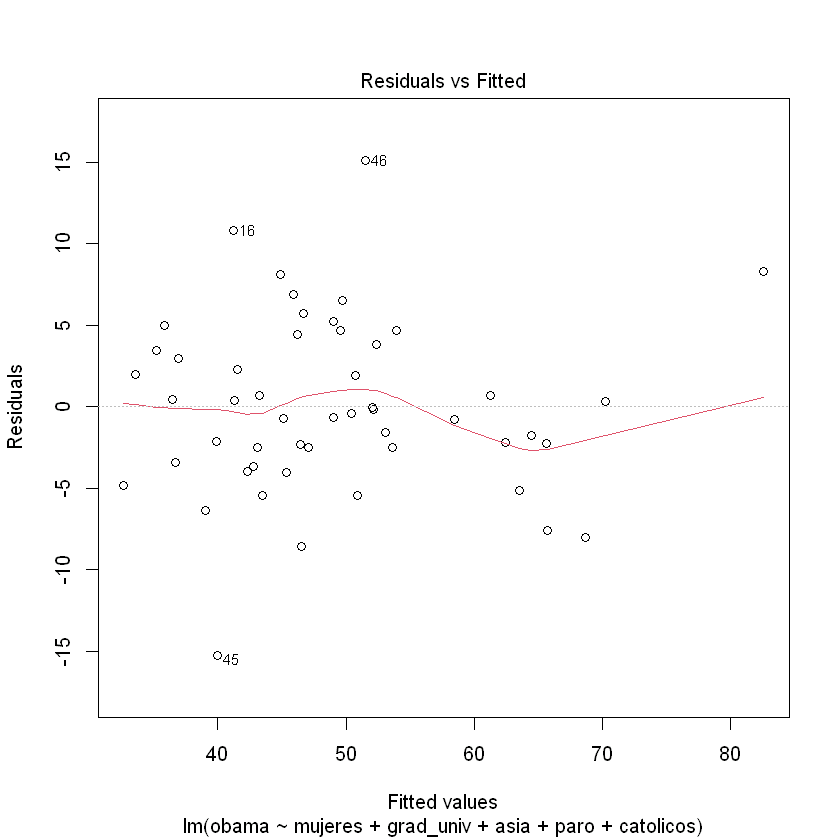

In [66]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(modelo, which=1) # El parámetro which=1 genera el grafico residuos = f(valores ajustados)

In [67]:
# Evidencia numérica para comprobar la existencia de una relación lineal entre los valores ajustados y los residuos

# Paso 1: verificar normalidad de los valores ajustados y residuos
yhat = modelo$fitted.values
uhat = modelo$residuals

lillie.test(yhat)
lillie.test(uhat)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  yhat
D = 0.12373, p-value = 0.04941



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  uhat
D = 0.095789, p-value = 0.2872


Se observa como el `p-valor` obtenido del contraste de bondad de ajuste para los valores ajustados es de $0.04941$, siendo inferior al nivel de significación del $5\%$. Por lo tanto, existe evidencia estadísticamente significativa para afirmar que los valores ajustados NO provienen de una distribución normal.

Por otro lado, el `p-valor` obtenido del contraste de bondad de ajuste para los residuos es de $0.2872$, en esta ocasión, superior al nivel de significación por lo que NO podemos rechazar la hipótesis nula en favor de la alternativa. Es decir, hay evidencia estadísticamente significativa de que los residuos sí provienen de una distribución normal.

Debido a que los valores ajustados no provienen de una distribución normal, a continuación se calculará la evidencia numérica y correspondiente contraste de hipótesis de correlación entre los valores ajustados y los residuos, empleando el método de `Spearman` (este método no precisa de que las variables cumplan el principio de normalidad).

In [68]:
# Evidencia numérica y contraste de linealidad mediante método de Spearman
# H0 (Hipótesis Nula): las variables son independientes (r=0)
# H1 (Hipótesis Alternativa): las variables están correlacionadas (r!=0)
cor.test(x = yhat, y = uhat, method = 'spearman')


	Spearman's rank correlation rho

data:  yhat and uhat
S = 22634, p-value = 0.8661
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0241629 


El `p-valor` obtenido es de $0.8661$ para el contraste de correlación lineal entre los valores ajustados y los residuos. Dicho `p-valor` es muy superior al nivel de significación del $5\%$ y por lo tanto, <u>existe evidencia estadísticamente significativa de que los valores ajustados y los residuos NO están linealmente correlacionados.

**INTERPRETACIÓN DE RESULTADOS** Conclusiones extraídas del gráfico Residuos vs Valores Ajustados y evidencia numérica:

- Para que las variables consideradas en el modelo estén linealmente relacionadas, no se debe observar ningún tipo de patrón en la gráfica de residuos vs valores ajustados o en otras palabras, los residuos y valores ajustados no deben estar linealmente relacionados. En este caso, no se observa ningún tipo de patrón por lo que la evidencia gráfica sugiere que las variables del modelo están linealmente relacionadas. Además, se ha realizado la evidencia numérica de correlación entre los valores ajustados vs residuos y su correspondiente contraste de hipótesis, obteniendo que hay evidencia estadísticamente significativa para afirmar que los valores ajustados y los residuos NO están relacionados linealmente. En resumen, se obtiene una `Evidencia POSITIVA` en esta primera valoración realizada mediante el gráfico residuos vs valores ajustados.

- El gráfico muestra un punto outlier en la zona central baja (etiqueta 45) y otros dos puntos outliers en la zona central alta (etiquetas 16 y 46). Estos outliers son los que tienen mayor valor absoluto de residuo y pueden estar afectando a la calidad del modelo, por lo que se debería verificar si los valores registrados son correctos o incluso, eliminarlos del modelo para ver si mejora el resultado.

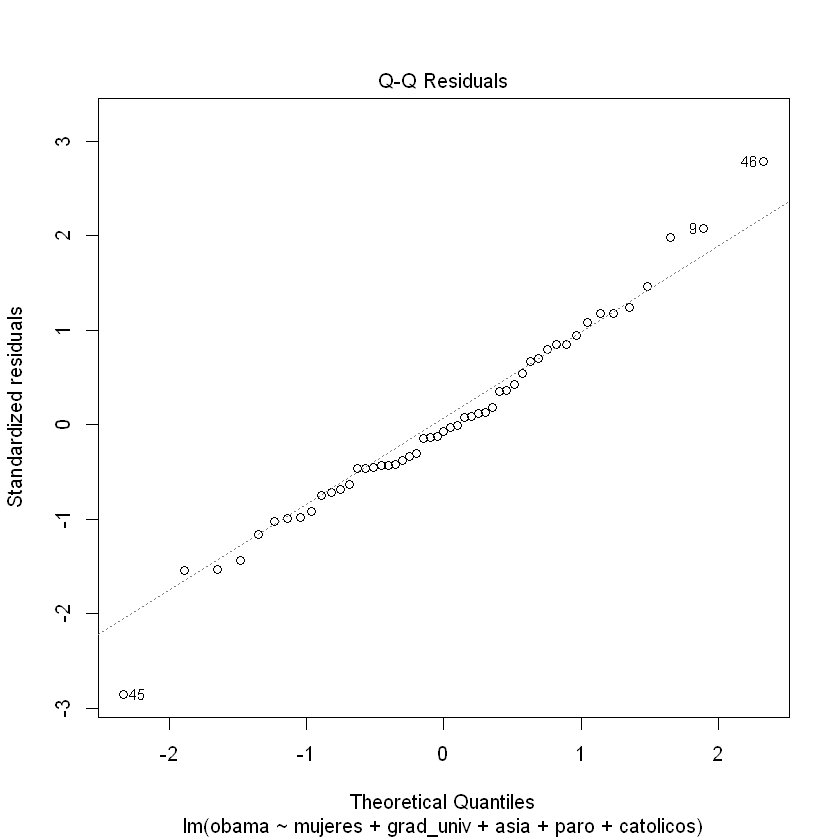

In [69]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(modelo, which=2) # El parámetro which=2 genera el gráfico Quantile-Quantile de los residuos

**INTERPRETACIÓN DE RESULTADOS** La normalidad de los residuos es clave para que los intervalos de confianza y los p-valores de las pruebas de hipótesis sobre los coeficientes sean válidos. Si los residuos no son normales, las predicciones del modelo pueden no ser confiables.

La anterior gráfica representa el gráfico Quantile-Quantile de residuos que evalua si dichos residuos siguen una distribución normal.

Conclusiones extraidas del gráfico y evidencia numérica:

- Para evidenciar gráficamente que los residuos del modelo se ajustan a una distribución normal, los puntos deben seguir la línea diagonal. En este caso, se observa como efectivamente, los puntos siguen la diagonal por lo que la evidencia gráfica sugiere que los residuos cumplen la condición de normalidad
  
- Además, en el anterior apartado se ha realizado el correspondiente contraste de hipótesis confirmando que los residuos se ajustan a una distribución normal.

En resumen, nuestro mejor modelo ha pasado esta segunda valoración realizada mediante el gráfico Q-Q de residuos, obteniendo una`Evidencia POSITIVA`.

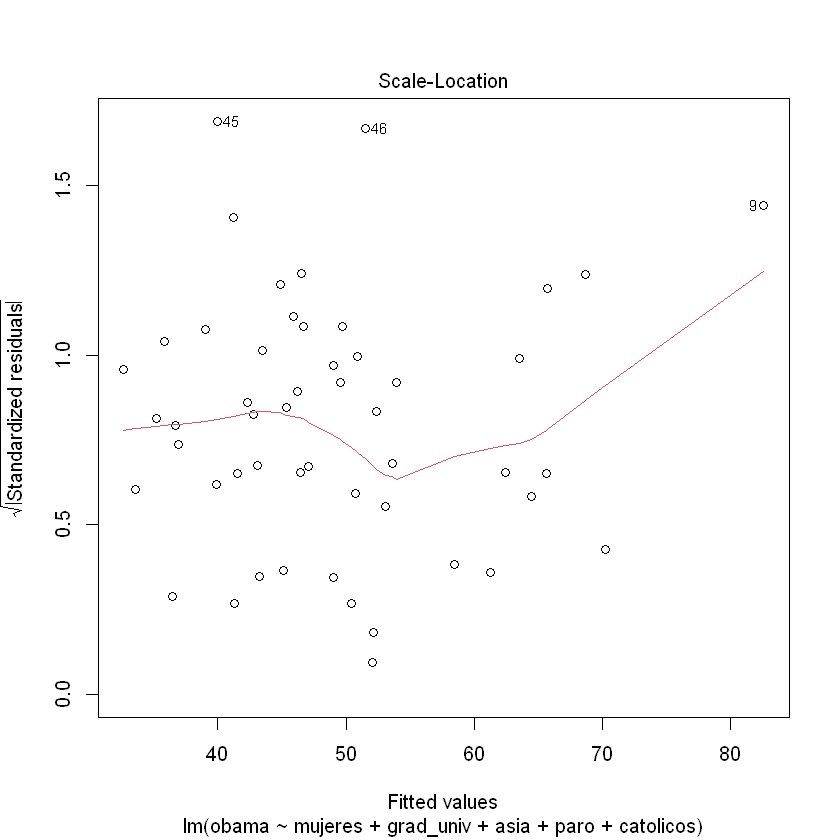

In [70]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(modelo, which=3) # which=3 genera un gráfico de residuos estandarizados frente a valores ajustados

Para contrastar la hipótesis de varianza constante en los residuos, podemos utilizar las pruebas de `Breusch-Pagan` (se debe cumplir la normalidad en los residuos) o `White` (no es necesario cumplir la normalidad en los residuos). Dado que ya se ha contrastado que los residuos se ajustan a una distribución normal, emplearemos la prueba de `Breusch-Pagan` para contrastar la hipótesis de varianza constante en los residuos:

In [71]:
# Constraste de varianza constante en los residuos mediante el test de White
# H0: la varianza de los errores es constante (homocedasticidad)
library(sandwich)
library(lmtest)
bptest(modelo)

Warning message:
"package 'sandwich' was built under R version 4.4.2"
Warning message:
"package 'lmtest' was built under R version 4.4.2"
Cargando paquete requerido: zoo


Adjuntando el paquete: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  modelo
BP = 8.8594, df = 5, p-value = 0.1148


**INTERPRETACIÓN DE RESULTADOS** Pasando el parámetro `which=3` a la función `plot`, se está representando el gráfico de la raíz cuadrada de los residuos estandarizados vs valores ajustados. El objetivo de este gráfico es analizar la heterocedasticidad de los residuos del modelos. Este tipo de modelos parten de la base de que los residuos deben tener una varianza constante para que los cálculos del modelo y los intervalos de confianza sean fiables.

Conclusiones extraídas:

- Para verificar gráficamente que los residuos no presentan heterocedasticidad, no se debe observar ningún tipo de patrón en la gráfica de raíz cuadrada de los residuos vs valores ajustados. En este caso, no se observa ningún tipo de patrón por lo que la evidencia gráfica sugiere que los residuos no presentan heterocedasticidad. Además, el contraste de varianza constante de los residuos realizado mediante el test de `Breusch-Pagan`, nos evidencia que el modelo NO presenta heterocedasticidad o en otras palabras, hay evidencia estadísticamente significativa de que la varianza de los residuos del modelo es constante.

En resumen, nuestro mejor modelo sí ha pasado esta tercera valoración realizada mediante el gráfico de residuos estandarizados vs valores ajustados, obteniendo una `Evidencia POSITIVA`.

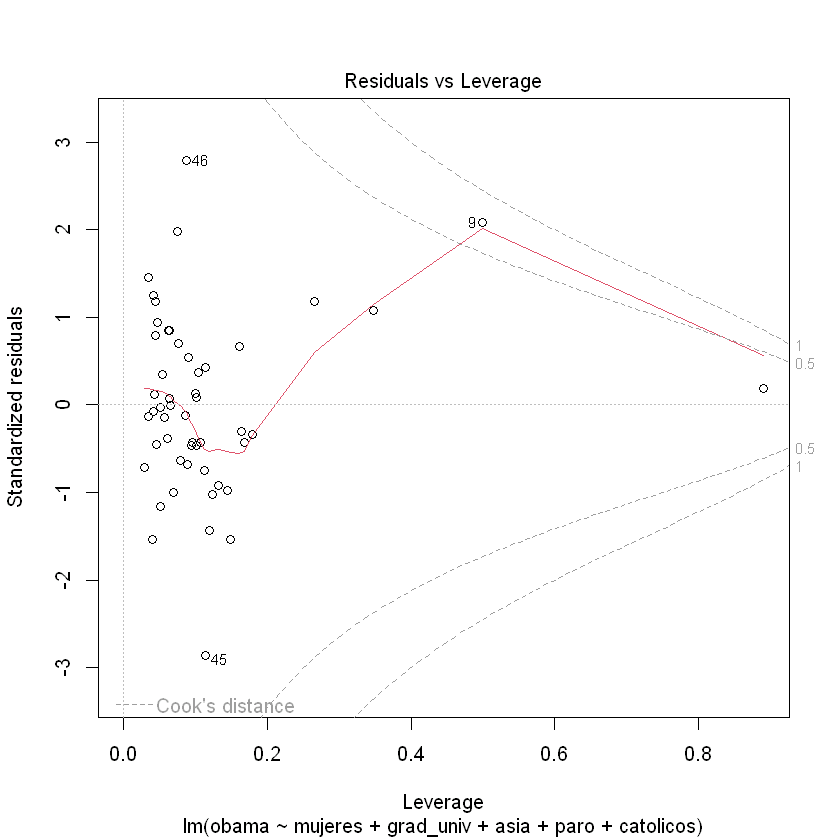

In [72]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(modelo, which=5) # which=5 crea el gráfico de residuos estandarizados frente al apalancamiento (leverage)

In [73]:
# Evidencia numérica de cantidad de puntos influyentes
# Cálculo del estadístico de la distancia de Cook
distancia_cook = cooks.distance(modelo)

# Identificar observaciones con alta influencia
umbral = 0.5
# Si distancia_cook > umbral -> punto influyente en el modelo
observaciones_influyentes = which(distancia_cook > umbral)

# Mostramos por pantalla el número de puntos influyentes
length(observaciones_influyentes)

[1] 1

**INTERPRETACIÓN DE RESULTADOS** Pasando el parámetro `which=5` a la función `plot`, se está representando el gráfico de residuos estandarizados frente al apalancamiento (leverage). El eje X representa el apalancamiento de cada observación. Los puntos con un apalancamiento alto tienen mayor capacidad para influir en el ajuste del modelo. El objetivo de este gráfico es:

- Identificar los puntos con alta influencia en el modelo (impacto desproporcionado en la determinación de los parámetros del modelo).
  
- Puntos aberrantes con valor muy alto de residuo asociado.

- Puntos con efecto palanca (leverage), es decir, predicciones no satisfactorias realizdas por el modelo.

Conslusiones extraídas:

- Visualmente, se observa la presencia de 1 punto fuera de la curva de Cook 0.5, dicho punto está etiquetado como "9". Además, la evidencia numérica confirma esta misma información. Sin embargo, dicho punto está dentro de la curva Cook 1 y por lo tanto, dependiento de lo estricto que seamos, se podría considerar que este punto tiene o no tiene excesivo impacto en la determinación de los parámetros del modelo. Para ser conservadores, vamos a considerar que dicho punto tiene un impacto desproporcionado, obteniendo en este sentido, una `Evidencia NEGATIVA`.

- NO se observan puntos muy negativos y con un apalancamiento significativo o en otras palabras, puntos aberrantes (puntos con valores de muy alto de residuo asociado). Por lo tanto, obtenemos una `Evidencia POSITIVA` en este apartado.

- La presencia de puntos muy positivos y con alto apalancamiento significa que son puntos que el modelo no ha sido capaz de predecir correctamente. En este caso NO se observan puntos muy positivos y con un apalancamiento significativo y por lo tanto, obtenemos una `Evidencia POSITIVA` en este apartado.

In [74]:
# Gráfico 5: Diagnosis para comprobar multicolinealidad
# Seleccionamos las variables independientes del modelo
df_independientes = df[, names(df) %in% c('mujeres', 'grad_univ', 'asia', 'paro', 'catolicos')]

In [75]:
# Contraste de bondad de ajuste para comprobar si las variables dependientes se ajustan a una distribución normal
# H0_ la variable se ajusta a una distribución normal
apply(df_independientes, MARGIN = 2, function(x){lillie.test(x)$p.value})

mujeres    grad_univ         asia    catolicos         paro 
2.902627e-01 1.377534e-01 7.473319e-11 3.748193e-01 2.571063e-01

Observamos como el p-valor obtenido para la variable independientes `asia` es menor al nivel de significación del $5\%$ y por lo tanto, NO todas las variables independientes del modelo se ajustan a una distribución normal. Emplearemos el método de Kendall para contrastar la correlación entre las variables dependientes ya que dicho método no precisa de la condición de normalidad.

In [76]:
# Función para realizar el test de correlación a todas las parejas de variables
# H0: las variables son independientes (r=0)
correlation_tests = function(data) {
  # Verificar que el input sea un dataframe
  if (!is.data.frame(data)) {
    stop("El input debe ser un dataframe.")
  }
  
  # Seleccionar solo columnas numéricas
  numeric_data = data[sapply(data, is.numeric)]
  var_names = colnames(numeric_data)
  results = list()
  
  # Iterar sobre todas las combinaciones de pares de variables
  for (i in 1:(ncol(numeric_data) - 1)) {
    for (j in (i + 1):ncol(numeric_data)) {
      var1 = var_names[i]
      var2 = var_names[j]
      test_result = cor.test(numeric_data[[var1]], numeric_data[[var2]], method = 'kendall')
      
      # Guardar resultados
      results = rbind(
        results,
        data.frame(
          Variable1 = var1,
          Variable2 = var2,
          Correlation = test_result$estimate,
          P_value = test_result$p.value
        )
      )
    }
  }
  
  # Convertir lista a dataframe
  results_df = as.data.frame(results)
  return(results_df)
}

# Llamar a la función
correlation_results = correlation_tests(df_independientes)

In [77]:
# Visualizamos coeficientes y contrastes de correlación
correlation_results

,Variable1,Variable2,Correlation,P_value
,<chr>,<chr>,<dbl>,<dbl>
tau,mujeres,grad_univ,0.08074790,0.4109908073
tau1,mujeres,asia,0.01126379,0.9092180761
tau2,mujeres,catolicos,0.05036562,0.6131365938
tau3,mujeres,paro,0.32246448,0.0011199562
tau4,grad_univ,asia,0.41186594,0.0000228909
tau5,grad_univ,catolicos,0.36157839,0.0002272192
tau6,grad_univ,paro,-0.04118954,0.6724846478
tau7,asia,catolicos,0.19358329,0.0497128431
tau8,asia,paro,0.15304933,0.1183427299


In [78]:
# Extraemos los pares de variables independientes relacionadas linealmente entre ellas
correlation_results[correlation_results$P_value <= 0.05,]

,Variable1,Variable2,Correlation,P_value
,<chr>,<chr>,<dbl>,<dbl>
tau3,mujeres,paro,0.3224645,0.0011199562
tau4,grad_univ,asia,0.4118659,0.0000228909
tau5,grad_univ,catolicos,0.3615784,0.0002272192
tau7,asia,catolicos,0.1935833,0.0497128431


En la tabla de arriba se muestran las parejas de variables independientes con correlación entre ellas. Sin embargo, que exista la evidencia significativa de que dos variables independientes estén relacionadas no implica problemas de multicolinealidad. Con el propósito de facilitar el análisis de multicolinealidad del modelo, se puede calcular la métrica VIF o Factor de Inflación de la Varianza.

El VIF es una métrica ampliamente aceptada para detectar multicolinealidad. Evalúa cuánto aumenta la varianza estimada de un coeficiente debido a la correlación con otras variables independientes. Cálculo del VIF:

\begin{align*}
VIF_i=\frac{1}{1-R_i^2}
\end{align*}
donde $R_i^2$ es el coeficiente de determinación de una regresión auxiliar que explica la variable independiente $X_i$ en función de las demás variables independientes.

Criterio de interpretación del VIF:

- $VIF=1$: no hay multicolinealidad.

- $1<VIF≤5$: multicolinealidad baja o moderada.

- $VIF>5$: multicolinealidad significativa que podría ser preocupante.

- $VIF>10$: multicolinealidad grave, y es probable que debas abordar el problema.

In [79]:
# Cargamos librería car para calcular el VIF
library(car)

# La función vif calcula automáticamente el VIF de cada variable independiente del modelo
vif(modelo)

Cargando paquete requerido: carData


Adjuntando el paquete: 'car'


The following object is masked from 'package:psych':

    logit




mujeres grad_univ      asia      paro catolicos 
 1.383376  1.422137  1.112575  1.207613  1.232632

**INTERPRETACIÓN DE RESULTADOS** Se observa como todas las variables independientes del modelo presentan un VIF próximo a 1 y por lo tanto, el modelo no tiene problemas de multicolinealidad, obteniendo una `Evidencia POSITIVA` en este apartado.

La multicolinealidad representa un problema para los modelos de regresión lineal múltiple ya que el cálculo de los coeficientes es poco fiables debido a que al modelo le cuesta distinguir el efecto individual de cada variable independiente sobre la dependiente. Como su propio nombre indica, las variables independientes deben ser independientes entre ellas. En caso contrario, los coeficientes de regresión pueden cambiar drásticamente ante un mínimo cambio en los datos de entrenamiento del modelo.

Como conclusión final del proceso de diagnosis del modelo, hemos obtenido un total de 6 evidencias positivas y únicamente 1 negativa. Por lo tanto, podemos afirmar que el modelo de regresión lineal múltiple seleccionado para predecir el porcentaje de votos a Obama SÍ es bueno.

# Bloque 2: Ejercicios intermedios de la prueba <a id="topic3"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


### 04 Ejercicio [1.5 puntos]

Utilizando el archivo de datos `hatco.csv` que contiene observaciones de clientes de la compañía de distribución industrial Hatco S.L. Realizar un modelo de regresión lineal múltiple de la variable `fidedila` que representa el porcentaje de compra de los clientes de la empresa Hatco S.L. en función de las siguientes variables explicativas: `velocida` que representa la velocidad de entrega, la variable `precio` que representa el nivel de precios, la variable `flexprec` que representa la flexibilidad de precios, la variable `imgfabri` que representa la imagen del fabricante, la variable `imgfvent` que representa la imagen de fuerza de ventas y la variable `calidadp` que representa la calidad del producto. Responder a las siguientes cuestiones:

1. Ajustar el mejor modelo de regresión lineal múltiple posible con ese conjunto de variables 
2. Comparar sus métricas y realizar la diagnosis del modelo de regresión lineal elegido
3. Realizar una interpretación de los coeficientes del modelo de regresión lineal elegido
4. Realizar la descomposición de valores ajustados y residuos del modelo de regresión lineal elegido
5. Evaluar e interpretar la bondad de ajuste del modelo de regresión lineal elegido ($R^2$ y $R^2_{adj}$)
6. Evaluar e interpretar la prueba de significatividad individual del modelo de regresión lineal elegido
7. Evaluar e interpretar la prueba de significatividad global del modelo de regresión lineal elegido
8. Evaluar e interpretar la multicolinealidad (existencia de relación lineal entre las variables independientes) usando la matriz de correlaciones

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

**PRESENTACIÓN DEL DATASET**

In [ ]:
# Leemos el archivo hatco.csv y lo guardamos en un data.frame
df = read.csv('datasets/hatco.csv', header = TRUE, sep = ';', dec = '.')

La función ``read.csv`` nos permite leer una base de datos a partir de un archivo ``.csv``. La función guarda la información leida en un ``data.frame``. Parámetros empleados en la función:

- ``file``: nombre del archivo con extensión .csv
  
- ``header``: indicando TRUE en este parámetro estamos diciendo a la función que la primero fila del archivo .csv corresponde a los nombres de las variables
  
- ``sep``: indicamos el carácter separador de los valores empleado en el archivo .csv. En este caso, el archivo ``hatco.csv`` emplea ``;`` como carácter separador

- ``dec``: indicamos el carácter separador de decimales. En este caso, el archivo ``hatco.csv`` emplea ``.`` como carácter separador de decimales

In [81]:
# Mostramos las 6 primeras filas del dataset
head(df)

,fidelida,precio,flexprec,imgfabri,imgfvent,calidadp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32,0.6,6.9,4.7,2.3,5.2
2,43,3.0,6.3,6.6,4.0,8.4
3,48,5.2,5.7,6.0,2.7,8.2
4,32,1.0,7.1,5.9,2.3,7.8
5,58,0.9,9.6,7.8,4.6,4.5
6,45,3.3,7.9,4.8,1.9,9.7


<mark>**NOTA**: el enunciado menciona la presencia de la variable `velocida` en el dataset `hatco.csv`. Sin embargo, podemos observar como el archivo no contiene esta columna. El ejercicio se realizará sin tener en cuenta la variable `velocida`.

In [82]:
# Resumen del dataset
cat('\nResumen del dataset:\n')
str(df)

# Clase
cat('\nClase del dataset:\n')
class(df)

# Dimensiones
cat('\nDimensiones del dataset:\n')
dim(df)

# Variables
cat('\nNombre de las variables del dataset:\n')
names(df)


Resumen del dataset:
'data.frame':	100 obs. of  6 variables:
 $ fidelida: num  32 43 48 32 58 45 46 44 63 54 ...
 $ precio  : num  0.6 3 5.2 1 0.9 3.3 2.4 4.2 1.6 3.5 ...
 $ flexprec: num  6.9 6.3 5.7 7.1 9.6 7.9 9.5 6.2 9.4 6.5 ...
 $ imgfabri: num  4.7 6.6 6 5.9 7.8 4.8 6.6 5.1 4.7 6 ...
 $ imgfvent: num  2.3 4 2.7 2.3 4.6 1.9 4.5 2.2 3 3.2 ...
 $ calidadp: num  5.2 8.4 8.2 7.8 4.5 9.7 7.6 6.9 7.6 8.7 ...

Clase del dataset:


[1] "data.frame"


Dimensiones del dataset:


[1] 100   6


Nombre de las variables del dataset:


[1] "fidelida" "precio"   "flexprec" "imgfabri" "imgfvent" "calidadp"

In [83]:
# Revisamos si existen valores NA
n_filas_NA = nrow(df) - nrow(na.omit(df)) # La función na.omit() devuelve el data.frame sin valores NA
cat('Número de filas con valores NA en el dataset =', n_filas_NA)

Número de filas con valores NA en el dataset = 1

In [84]:
# Mostramos solo las filas con valores NA
filas_NA = df[rowSums(is.na(df)) > 0, ]
filas_NA

,fidelida,precio,flexprec,imgfabri,imgfvent,calidadp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,NA,NA,NA,NA,NA,NA


**INTERPRETACIÓN DE RESULTADOS** Presentación del dataset ``hatco.csv``:

- El dataset se ha guardado en la variable `df` tipo `data.frame`.
  
- El dataset registra diferentes aspectos de la cartera de clientes de la compañía Hatco S.L.
  
- El dataset tiene un total de $100$ registros y $6$ variables. Resumen de las variables:

    - Variable dependiente: 
  
        - ``fidelida`` (variable numérica tipo flotante): representa el porcentaje en tanto por ciento de compra de los clientes

    - Variables independientes: 
      
        - ``precio`` (variable numérica tipo flotante): nivel de precios.
          
        - ``flexprec`` (variable numérica tipo flotante): flexibilidad de precios.
          
        - ``imgfabri`` (variable numérica tipo flotante): imagen del fabricante con valores entre 0 y 10.
          
        - ``imgfvent`` (variable numérica tipo flotante): imagen de fuerza de ventas con valores entre 0 y 10.
          
        - ``calidadp`` (variable numérica tipo flotante): calidad del producto con valores entre 0 y 10.
      
- El dataset presenta una única fila con valores NA en las 6 variables. Esta fila se eliminará a continuación ya que no aporta nada al dataset.

In [85]:
# Eliminamos la fila con valores NA
df = na.omit(df)
nrow(df)

[1] 99

Al eliminar la fila con valores NA, nos queda un dataset con 99 observaciones.

**ANÁLISIS EXPLORATORIO DEL DATASET**

In [86]:
# Principales estadisticos
summary(df)

    fidelida         precio        flexprec         imgfabri    
 Min.   :25.00   Min.   :0.20   Min.   : 5.000   Min.   :2.500  
 1st Qu.:39.00   1st Qu.:1.45   1st Qu.: 6.700   1st Qu.:4.550  
 Median :47.00   Median :2.20   Median : 8.000   Median :5.000  
 Mean   :46.24   Mean   :2.37   Mean   : 7.883   Mean   :5.251  
 3rd Qu.:53.50   3rd Qu.:3.25   3rd Qu.: 9.100   3rd Qu.:6.000  
 Max.   :65.00   Max.   :5.40   Max.   :10.000   Max.   :8.200  
    imgfvent        calidadp     
 Min.   :1.100   Min.   : 3.700  
 1st Qu.:2.200   1st Qu.: 5.800  
 Median :2.600   Median : 7.200  
 Mean   :2.662   Mean   : 6.981  
 3rd Qu.:3.000   3rd Qu.: 8.350  
 Max.   :4.600   Max.   :10.000  

In [87]:
# Calculamos las desviaciones estándar de las variables
apply(df, MARGIN = 2, sd)

fidelida    precio  flexprec  imgfabri  imgfvent  calidadp 
8.9367129 1.2003787 1.3890270 1.1368928 0.7740309 1.5902558

In [88]:
# Calculamos los coeficientes de asimetría de las variables
apply(df, MARGIN = 2, skewness)

fidelida      precio    flexprec    imgfabri    imgfvent    calidadp 
-0.07658257  0.44143064 -0.26296703  0.20405456  0.48975110 -0.23828556

In [89]:
# Calculamos los coeficientes de curtosis de las variables
apply(df, MARGIN = 2, kurtosis)

fidelida      precio    flexprec    imgfabri    imgfvent    calidadp 
-0.76241771 -0.61528495 -1.12545035 -0.06807627 -0.02908718 -0.91078200

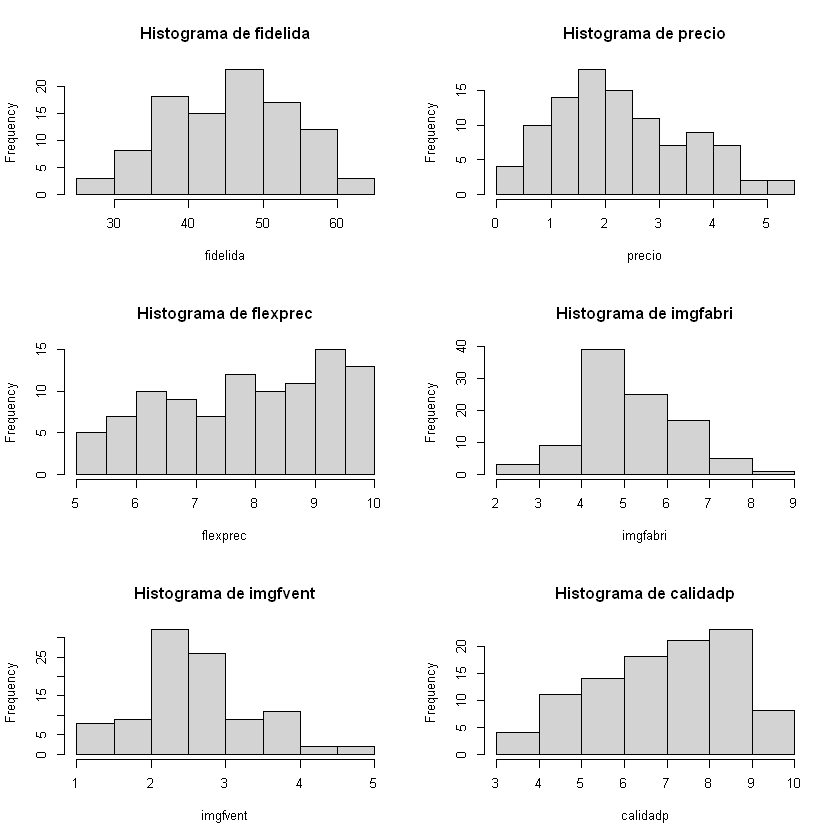

In [90]:
# ANÁLISIS GRÁFICO
# Representación gráfica de los valores mediante histogramas
# Ajustamos el layout
par(mfrow=c(3,2))  # c(filas, columnas)

# Realizamos los histogramas para cada variable numérica
hist(df$fidelida, main="Histograma de fidelida", xlab="fidelida")
hist(df$precio, main="Histograma de precio", xlab="precio")
hist(df$flexprec, main="Histograma de flexprec", xlab="flexprec")
hist(df$imgfabri, main="Histograma de imgfabri", xlab="imgfabri")
hist(df$imgfvent, main="Histograma de imgfvent", xlab="imgfvent")
hist(df$calidadp, main="Histograma de calidadp", xlab="calidadp")

# Reset del layout 
par(mfrow=c(1,1))

In [91]:
# ANÁLISIS GRÁFICO
# Representación gráfica de los valores mediante diagrama de cajas
# Dividimos las variables en dos grupos para una mejor visualización
grupo1 = c('fidelida')
grupo2 = c('precio','flexprec','imgfabri','imgfvent','calidadp')

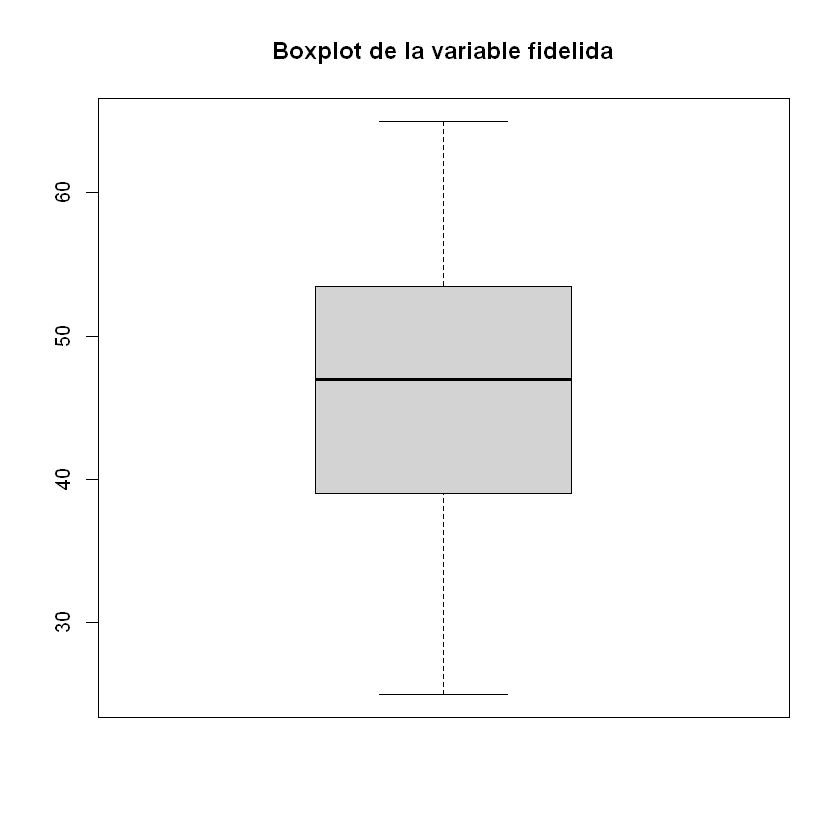

In [92]:
# Boxplot para el primer grupo de variables
boxplot(df[, grupo1], main="Boxplot de la variable fidelida")

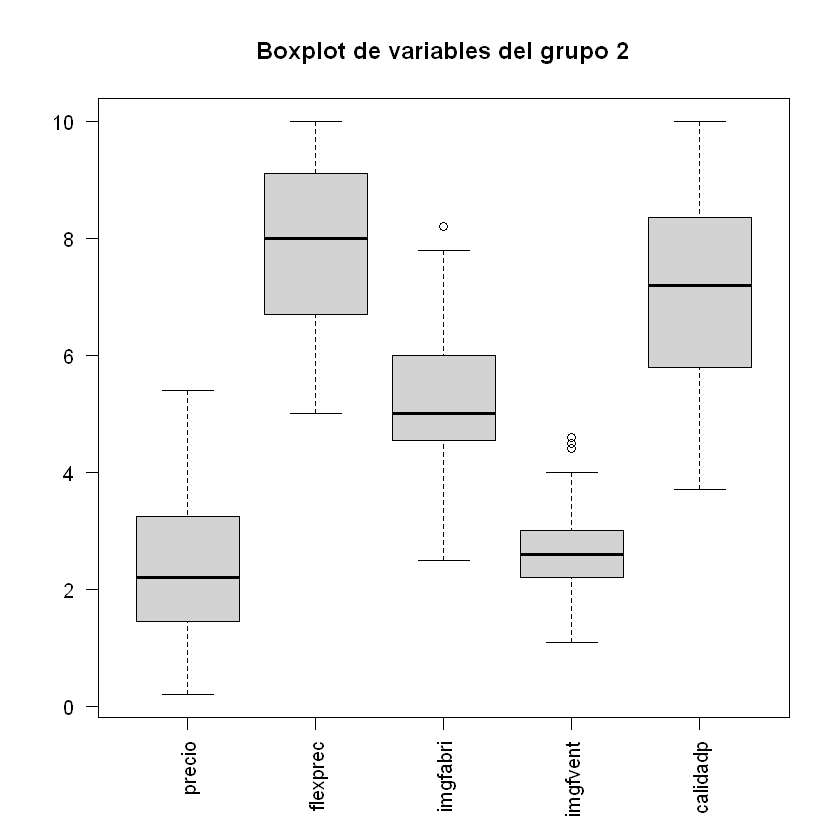

In [93]:
# Boxplot para el segundo grupo de variables
boxplot(df[, grupo2], main="Boxplot de variables del grupo 2", las=2)

In [94]:
# Contamos el número de valores atípicos en cada variable

# Función para contar valores atípicos en un vector
contarAtipicos = function(vector) {
    
    # Calcular Q1, Q3 y IQR
    Q1 = quantile(vector, 0.25, na.rm = TRUE)
    Q3 = quantile(vector, 0.75, na.rm = TRUE)
    IQR = Q3 - Q1
    
    # Definir los límites para los valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Contar valores fuera de los límites
    atipicos = sum(vector < limite_inferior | vector > limite_superior, na.rm = TRUE)
    
    return(atipicos)
}

apply(df, MARGIN = 2, FUN = contarAtipicos)

fidelida   precio flexprec imgfabri imgfvent calidadp 
       0        0        0        1        4        0

**INTERPRETACIÓN DE RESULTADOS** A continuación, se detalla la interpretación del análisis exploratorio del dataset:

**ANÁLISIS DE CADA VARIABLE**

**1. Fidelidad (`fidelida`)**

   - **Rango de valores:** entre 25 y 65. Podemos interpretar que todos los clientes registrados en el dataset dependen en gran medida de la compañia Hatco S.L., debido a que más del 25% de las compras son realizadas a Hatco S.L.
     
   - **Mediana** 47 y **Media** 46.24, valores próximos lo que indica una distribución simétrica. Confirmamos este dao con el coef. asimetría $g_1=-0,07\approx0$. Aproximadamente la mitad del presupuesto de los clientes de Hatco S.L. es gastado en esta empresa.
     
   - **Desviación estándar:** 8.94, lo que indica que la mayoría de clientes de la compañía presentan un grado de fidelidad similar entre ellos. Por lo tanto, podemos deducir que el negocio Hatco S.L. es clave en la cadena del producto o servicio de venta.

**2. Precio (`precio`)**

   - **Rango de valores:** entre 0.20 y 5.40.
     
   - **Mediana** 2.20 y **Media** 2.37, media algo superior a la mediana, lo que sugiere una posible leve asimetría positiva (coef. asimetría $g_1=0,44$). Es decir, la mayoria de los valores se encuentran en la parte media-baja del rango con valores extremos en la parte superior.
     
   - **Desviación estándar:** 1.20, sugiriendo una dispersión relativamente amplia en los precios. La variabilidad en el precio es considerable, lo que puede deberse a que el dataset incluye clientes agrupados en distintas unidades de negocio dentro de la empresa Hatco S.L. Los precios más repetidos o más frecuentes se encuentran en la parte baja del rango.

**3. Flexibilidad de precio (`flexprec`)**

   - **Rango de valores:** entre 5.0 y 10.0.
     
   - **Mediana:** 8.0, mostrando que la flexibilidad es generalmente alta.
     
   - **Media:** 7.88, media algo inferior a la mediana, lo que sugiere una posible leve asimetría negativa (coef. asimetría $g_1=-0,26$). Podemos interpretar este resultado como la mayoría de los productos/servicios presentan gran flexibilidad de precios. Sin embargo, existen unos pocos productos/servicios con más rigidez.
     
   - **Desviación estándar:** 1.39, lo que indica una dispersión moderada. La flexibilidad en los precios se encuentra concentrada en valores relativamente altos, mostrando que los precios tienen un margen razonable para ajustarse. Esto puede reflejar una estrategia de precios adaptable en la empresa.

**4. Imagen de la fábrica (`imgfabri`)**

   - **Rango de valores:** entre 2.5 y 8.2.
     
   - **Mediana:** 5.0, lo que sugiere una imagen de fábrica es percibida por la mayoría de los clientes como aceptable con margen de mejora.
     
   - **Media:** 5.25, media algo superior a la mediana, lo que sugiere una posible leve asimetría positiva (coef. asimetría $g_1=0,20$). Es decir, la mayoria de los valores se encuentran en la parte media-baja del rango con valores extremos en la parte superior que distorsionan el valor de la media respecto al de la mediana.
     
   - **Desviación estándar:** 1.14, indicando una dispersión baja a moderada. La imagen de fábrica parece percibirse de manera consistente, con la mayoría de los valores cerca de la media. Esto puede reflejar una percepción de marca uniforme entre los clientes, aunque con margen de mejora.

**5. Imagen de la fuerza de ventas (`imgfvent`)**

   - **Rango de valores:** entre 1.1 y 4.6.
     
   - **Mediana:** 2.6, señalando que la percepción de la fuerza de ventas es generalmente baja con bastante margen de mejora.
     
   - **Media:** 2.66, muy cercana a la mediana, lo que indica simetría en la distribución. Sin embargo, observamos un coef. de asimetría positivo moderado de $g_1=0,49$.
     
   - **Desviación estándar:** 0.77, indicando una dispersión baja. La imagen de la fuerza de ventas está en un rango bajo a moderado, con poca variabilidad. Esto puede reflejar que la percepción de la fuerza de ventas está consolidada entre los clientes, aunque en niveles bajos.

**6. Calidad del producto (`calidadp`)**

   - **Rango de valores:** entre 3.7 y 10.0.
     
   - **Mediana:** 7.2, lo que sugiere una percepción de calidad notable.
     
   - **Media:** 6.98, media algo inferior a la mediana, lo que sugiere una posible leve asimetría negativa (coef. asimetría $g_1=-0,24$). Posiblemente se deba a alguna mala experiencia puntual de algún cliente.
     
   - **Desviación estándar:** 1.59, lo que indica una dispersión moderada. La percepción de calidad del producto está en un nivel moderado a alto, pero con cierta variabilidad. Esto puede indicar que algunos productos son percibidos como de alta calidad, mientras que otros se perciben menos favorables

**ANÁLISIS DE EXISTENCIA DE RELACIÓN LINEAL ENTRE LAS VARIABLES**

In [95]:
# Antes de calcular la evidencia numérica mediante el método de Pearson, debemos verificar que
# las variables se ajusten a una distribución normal
# El contraste de bondad de ajuste lo realizaremos mediante el test K-S-L

# Calculamos p-valor de ambas variables para un nivel de significación del 5%
# H0 (Hipótesis Nula): la variable se ajusta a una distribución normal
# H1 (Hipótesis Alternativa): la variable NO se ajusta a una distribución normal
apply(df, MARGIN = 2, function(x) lillie.test(x)$p.value)

fidelida       precio     flexprec     imgfabri     imgfvent     calidadp 
0.1412504770 0.0398045800 0.0366242581 0.0114005435 0.0004838281 0.0401009412

**INTERPRETACIÓN DE RESULTADOS**

El `p-valor` obtenido de la bondad de ajuste es inferior al nivel de significación del $5\%$ para las siguientes variables:

- `precio`
  
- `flexprec`

- `imgfabri`

- `imgfvent`

- `calidadp` 

En esta lista de variables tenemos que rechazar la hipótesis nula de bondad de ajuste o en otras palabras, estas variables no se ajustan a una distribución normal.

El `p-valor` obtenido de la bondad de ajuste es superior al nivel de significación del $5\%$ para las siguientes variables:

- `fidelida`

En esta variables NO podemos rechazar la hipótesis nula en favor de la alternativa. Por lo tanto, existe evidencia estadísticamente significativa de que la variable ``fidelida se ajustan a una distribución normal.

En conclusión, dado que no todas las variables se ajustan a una distribución normal, **NO podemos emplear el método de Pearson para calcular y contrastar la relación lienal entre variables, en su defecto, emplearemos el método de Kendall el cual no precisa de la condición de normalidad**.

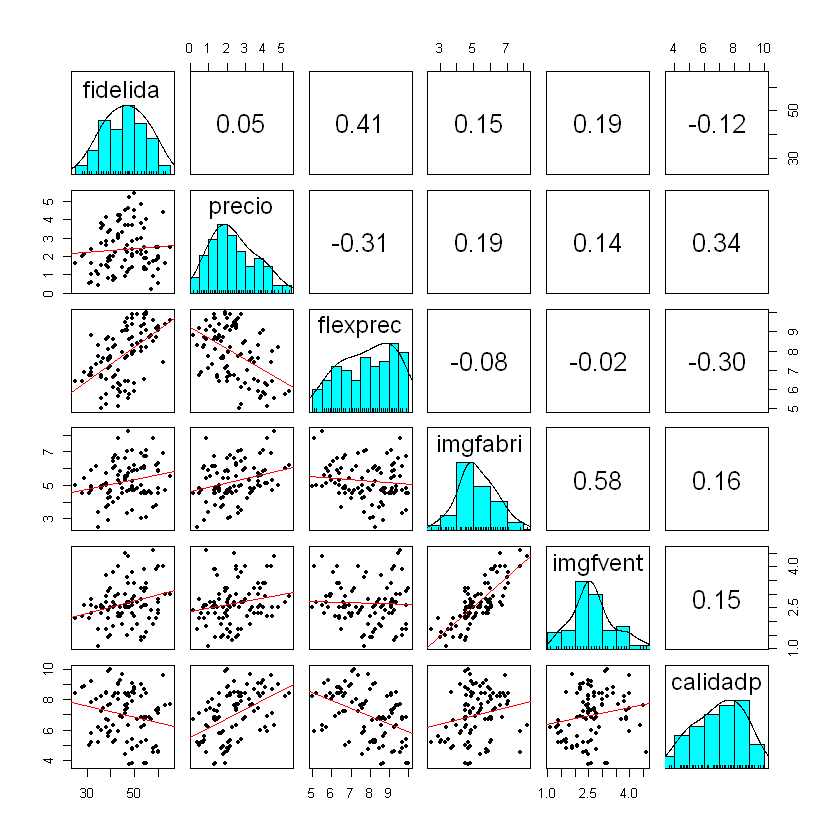

In [96]:
# Evidencia gráfica y numérica a través del gráfico de dispersión (caso múltiple)
pairs.panels(df, ellipses = FALSE, lm = TRUE, method = "kendall")

**INTERPRETACIÓN DE RESULTADOS** Con la función `pairs.panels` obtenemos los diagramas de dispersión junto con las rectas de regresión y los coeficientes de correlación de todos los pares de variables del dataset. Como se ha comentado anteriormente, se ha empleado el método de Kendall dado que no todas las variables del dataset se ajustan a una distribución normal.

Para este caso, nos tenemos que fijar en la primera fila donde podemos ver los coeficientes de correlación entre la variable dependiente `fidelida` y las variables independientes `precio`, `felxprec`, `imgfabri`, `imgfvent` y `calidadp`. Además, la primera columna muestra la evidencia gráfica.

Resultados obtenidos:

- Relación lineal positiva muy débil entre `fidelida` y `precio` con coeficiente de correlación $r=0.05$. Dado el bajo nivel de correlación obtenido, habrá que contrastar la hipótesis de correlación para asegurarnos que existe una relación lineal directa entre el porcentaje de fidelidad de los clientes y el nivel de precios.

- Relación lineal positiva moderada entre `fidelida` e `flexprec` con coeficiente de correlación $r=0.41$. La variable independiente `flexprec` es la que presenta mayor correlación con `fidelida`. Esto nos sugiere que esta variable seguramente esté presente en el modelo de regresión lineal múltiple estimado.

- Relación lineal positiva leve entre los pares de variable `fidelida`-`imgfabri` y `fidelida`-`imgfvent` con coeficiente de correlación $r=0.15$ y $r=0.19$, respectivamente. Estos datos nos sugieren que existe cierta relación entre una mejor imagen de fabricante y fuerza de ventas con un aumento en la fidelidad de los clientes.

- Relación lineal inversa leve entre las variables `fidelida` y `calidadp` con coeficiente de correlación $r=-0.12$. Este resultado parece ser contraintuitivo ya que la lógica nos sugiere que una mayor calidad del producto ofrecido, se asocia con una mayor fidelidad de los clientes. Se deberá contrastar la hipótesis de correlación para descartar que la evidencia numérica obtenida se trate de una casualidad.

A continuación, realizaremos el contraste de hipótesis de correlación con el propósito de confirmar la existencia de relación lineal entre la variable dependiente con las independientes.

In [97]:
# Contraste y evidencia numérica mediante el cálculo del coeficiente de correlación
# H0 (Hipótesis Nula): las variables son independientes (r = 0)
# H1 (Hipótesis Alternativa): las variables están correlacionadas (r != 0)
cor.test(x = df$precio, y = df$fidelida, method = 'kendall')
cor.test(x = df$flexprec, y = df$fidelida, method = 'kendall')
cor.test(x = df$imgfabri, y = df$fidelida, method = 'kendall')
cor.test(x = df$imgfvent, y = df$fidelida, method = 'kendall')
cor.test(x = df$calidadp, y = df$fidelida, method = 'kendall')


	Kendall's rank correlation tau

data:  df$precio and df$fidelida
z = 0.67226, p-value = 0.5014
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.04691523 



	Kendall's rank correlation tau

data:  df$flexprec and df$fidelida
z = 5.9499, p-value = 2.682e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.4148708 



	Kendall's rank correlation tau

data:  df$imgfabri and df$fidelida
z = 2.1607, p-value = 0.03072
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1515409 



	Kendall's rank correlation tau

data:  df$imgfvent and df$fidelida
z = 2.6968, p-value = 0.007
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1903703 



	Kendall's rank correlation tau

data:  df$calidadp and df$fidelida
z = -1.7204, p-value = 0.08536
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1201997 


**INTERPRETACIÓN DE RESULTADOS** El contraste de hipótesis de correlación nos evidencia que las variables independientes `precio` y `calidadp` NO presentan relación lineal con la variable dependiente `fidelida`, debido a que los valores de `p-valor` obtenidos son menores al nivel de significación del $5\%$. Por lo tanto, estas dos variables NO pueden formar parte del Modelo de Regresión Lineal Múltiple.

Por el contrario, se observa como el resto de variables independientes `flexprec`, `imgfabri` y `imgfvent`, existe evidencia estadísticamente significativa para afirmar que cada una de las variables, presentan relación lineal con la variable independiente `fidelida`.

En conclusión, el Modelo de Regresión Lineal Múltiple solo podrá formarse a partir de las variables independientes `flexprec`, `imgfabri` y `imgfvent`. Representación del modelo:

\begin{align*}
fidelida_{i}&=\beta_{0}+\beta_{1}*flexprec_{i}+\beta_{2}*imgfabri_{i}+\beta_{3}*imgfvent_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

Variables:

- $fidelida_{i}$: estimación de porcentaje de fidelidad de un cliente de la empresa Hatco S.L. (variable dependiente).

- $\beta_{0}$: estimación del porcentaje de fidelidad sin influencia o con independencia de las variables independientes consideradas.

- $flexprec_{i}$: flexibilidad en los precios (variable independiente).

- $\beta_{1}$: coeficiente de correlación entre las variables `fidelida` y `flexprec`

- $imgfabri_{i}$: imagen del fabricante con valores de 0 a 10 (variable independiente).

- $\beta_{2}$: coeficiente de correlación entre las variables `fidelida` y `imgfabri`

- $imgfvent_{i}$: imagen del la fuerza de ventas con valores de 0 a 10 (variable independiente).

- $\beta_{3}$: coeficiente de correlación entre las variables `fidelida` y `imgfvent`

- $epsilon_{i}$: error aleatorio o residuo (efecto de todas aquellas variables que influyen en la variable independiente pero que no se incluyen en el modelo como variables explicativas).

In [98]:
# Modificamos el dataset para quedarnos solo con las variables independientes relacionadas con la dependiente
df = df[ , !names(df) %in% c('precio', 'calidadp')]

# Comprobamos de nuevo las variables del dataset
names(df)

[1] "fidelida" "flexprec" "imgfabri" "imgfvent"

In [99]:
# Automatización proceso de selección de MRLM mediante procedimiento backward

# 1º Creamos el modelo general teniendo en cuenta todas las variables independientes del dataset y la variable dependiente
modelo_full = lm(fidelida ~ ., data = df)
summary(modelo_full)


Call:
lm(formula = fidelida ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4352  -3.9645  -0.3991   4.8870  13.0300 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7889     5.4625   0.694     0.49    
flexprec      3.8840     0.5042   7.704 1.26e-11 ***
imgfabri      1.3555     1.0043   1.350     0.18    
imgfvent      1.7716     1.4664   1.208     0.23    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.861 on 95 degrees of freedom
Multiple R-squared:  0.4286,	Adjusted R-squared:  0.4106 
F-statistic: 23.75 on 3 and 95 DF,  p-value: 1.48e-11


In [100]:
# 2º Búsqueda automática del modelo óptimo hacia atrás (backward)
step(modelo_full, direction="backward")

Start:  AIC=385.24
fidelida ~ flexprec + imgfabri + imgfvent

           Df Sum of Sq    RSS    AIC
- imgfvent  1     68.71 4540.8 384.75
- imgfabri  1     85.76 4557.9 385.12
<none>                  4472.1 385.24
- flexprec  1   2793.85 7266.0 431.29

Step:  AIC=384.75
fidelida ~ flexprec + imgfabri

           Df Sum of Sq    RSS    AIC
<none>                  4540.8 384.75
- imgfabri  1    670.43 5211.3 396.38
- flexprec  1   2891.72 7432.5 431.53



Call:
lm(formula = fidelida ~ flexprec + imgfabri, data = df)

Coefficients:
(Intercept)     flexprec     imgfabri  
      3.046        3.937        2.316  


In [101]:
# Automatización proceso de selección de MRLM mediante procedimiento forward

# 1º Creamos el modelo general teniendo en cuenta el modelo más sencillo (modelo cte)
modelo_cte = lm(fidelida ~ 1, data = df)
summary(modelo_cte)


Call:
lm(formula = fidelida ~ 1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.2384  -7.2384   0.7616   7.2616  18.7616 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.2384     0.8982   51.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.937 on 98 degrees of freedom


In [102]:
# 2º Búsqueda automática del modelo óptimo hacia delante (forward)
step(modelo_cte, direction="forward", scope=list(lower = modelo_cte, upper = modelo_full))

Start:  AIC=434.65
fidelida ~ 1

           Df Sum of Sq    RSS    AIC
+ flexprec  1   2615.49 5211.3 396.38
+ imgfvent  1    556.90 7269.9 429.34
+ imgfabri  1    394.21 7432.5 431.53
<none>                  7826.8 434.65

Step:  AIC=396.38
fidelida ~ flexprec

           Df Sum of Sq    RSS    AIC
+ imgfabri  1    670.43 4540.8 384.75
+ imgfvent  1    653.38 4557.9 385.12
<none>                  5211.3 396.38

Step:  AIC=384.75
fidelida ~ flexprec + imgfabri

           Df Sum of Sq    RSS    AIC
<none>                  4540.8 384.75
+ imgfvent  1    68.706 4472.1 385.24



Call:
lm(formula = fidelida ~ flexprec + imgfabri, data = df)

Coefficients:
(Intercept)     flexprec     imgfabri  
      3.046        3.937        2.316  


**INTERPRETACIÓN DE RESULTADOS** Tanto el método `backward` como `forward` de la función `step`, han devuelto el mismo resultado con un valor AIC de 384.75. Representación del mejor modelo encontrado por la función `step`:

\begin{align*}
fidelida_{i}&=\beta_{0}+\beta_{1}*flexprec_{i}+\beta_{2}*imgfabri_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

In [103]:
# Creamos el mejor modelo encontrado por la función step
modelo = lm(formula = fidelida ~ flexprec + imgfabri, data = df)
summary(modelo)


Call:
lm(formula = fidelida ~ flexprec + imgfabri, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8057  -3.9457  -0.3133   4.7117  13.8423 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.0464     5.4408   0.560 0.576836    
flexprec      3.9367     0.5035   7.819 6.85e-12 ***
imgfabri      2.3159     0.6151   3.765 0.000287 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.878 on 96 degrees of freedom
Multiple R-squared:  0.4198,	Adjusted R-squared:  0.4077 
F-statistic: 34.73 on 2 and 96 DF,  p-value: 4.473e-12


**INTERPRETACIÓN DE RESULTADOS** A pesar de ser el mejor modelo encontrado por la función `step`, se observa como el coeficiente de regresión $\beta_0$ NO es significativo. Consecuentemente, procederemos a refinar este último modelo condicionando su paso por el origen de coordenadas o en otras palabras, imponiendo al modelo que $\beta_0=0$.

In [104]:
modelo_refinado = lm(formula = fidelida ~ 0 + flexprec + imgfabri, data = df)
summary(modelo_refinado)


Call:
lm(formula = fidelida ~ 0 + flexprec + imgfabri, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8576  -3.8137  -0.7002   4.9933  13.6152 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
flexprec   4.1615     0.3026  13.751  < 2e-16 ***
imgfabri   2.5492     0.4510   5.653 1.59e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.853 on 97 degrees of freedom
Multiple R-squared:  0.9792,	Adjusted R-squared:  0.9788 
F-statistic:  2288 on 2 and 97 DF,  p-value: < 2.2e-16


**INTERPRETACIÓN DE RESULTADOS** Se observa como en este último modelo estimado, todos los coeficientes de regresión son significativos. Además, la capacidad explicativa del modelo ha aumentado a un considerable $98\%$. Por lo tanto, tomamos este último modelo como el mejor de los estimados. <u>La correspondiente comparativa con el resto de modelos e interpretación de las salidas del modelo se realizará en los siguientes apartados del ejercicio.

Representación del mejor modelo seleccionado:

\begin{align*}
obama_{i}&=4.1615*flexprec_{i}+2.5492*imgfabri_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [105]:
# Comparamos criterios de seleccion de ajuste general entre los diferentes modelos estimados

# Coeficiente de determinación ajustado
R2 = c(summary(modelo_full)$adj.r.squared,
       summary(modelo_cte)$adj.r.squared,
       summary(modelo)$adj.r.squared,
       summary(modelo_refinado)$adj.r.squared
      )

# Criterio de Información de Akaike
AIC = c(extractAIC(modelo_full)[2],
        extractAIC(modelo_cte)[2],
        extractAIC(modelo)[2],
        extractAIC(modelo_refinado)[2]
       )

# Criterio de Información Bayesiano
BIC = c(extractAIC(modelo_full,k=log(nrow(df)))[2],
        extractAIC(modelo_cte,k=log(nrow(df)))[2],
        extractAIC(modelo,k=log(nrow(df)))[2],
        extractAIC(modelo_refinado,k=log(nrow(df)))[2]
       )

# Obtenemos la tabla de comparación
df_seleccion_modelo = data.frame(Modelo = c('Modelo_completo','Modelo_cte', 'Modelo_step', 'Modelo_refinado'), R2, AIC, BIC)
df_seleccion_modelo

Modelo,R2,AIC,BIC
<chr>,<dbl>,<dbl>,<dbl>
Modelo_completo,0.4105672,385.2393,395.6198
Modelo_cte,0.0000000,434.6481,437.2433
Modelo_step,0.4077459,384.7487,392.5341
Modelo_refinado,0.9788162,383.0715,388.2617


**INTERPRETACIÓN DE RESULTADOS** Analizando la tabla comparativa de criterios de selección de modelos, observamos como el `modelo_refinado` es el que presenta una mayor capacidad explicativa ($R_{adj}^2=0.98$) con mucha diferencia respecto a los demás modelos estimados y además, este mismo modelo es el que presenta una menor pérdida de información (los valores de AIC y BIC son los menores). Por lo tanto, con estos resultados reforzamos la conclusión obtenida en el anterior apartado de que el modelo refinado que pasa por el origen es el mejor de los modelos estimados para predecir el porcentaje de fidelidad de los clientes de la compañía Hatco S.L.

A continuación, se procede con la diagnosis del mejor modelo obtenido.

**DIAGNOSIS DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE ELEGIDO**

Finalmente, tenemos que comprobar si el mejor modelo seleccionado es BUENO o NO. Es decir, tenemos que validar el modelo ya que podría ser el menos malo de todos los modelos que hemos comparado. Este proceso se denomina la diagnosis del modelo seleccionado y se centra en el análisis de los residuos (errores). Para que sea considerado bueno deberá de cumplir la mayoría de las siguientes condiciones. 

* Relativos al modelo [Gráfico 1]: Queremos comprobar si las variables están linealmente relacionadas. Para ello, hay que representar los valores de los residuos vs valores predichos `(Residuals vs Fitted)`.


* Relativos a los residuos [Gráficos 2-3]: Tenemos que saber si los errores del modelo siguen una distribución normal con media 0 y varianza $σ^2$ constante. Para ello, contamos con el gráfico Q-Q `(Q-Q plot)` que sirve para examinar la normalidad de los residuos y además, hay que representar gráficamente los valores predichos vs raíz cuadrada de los residuos estandarizados `(Fitted vs Square Standarized Residuals)` que sirve para comprobar la homocedasticidad del modelo, es decir, si la varianza de los errores es constante y no depende del valor de las variables independientes.

  
* Relativos a las observaciones anómalas [Gráfico 4]: Hay que comporbar si algunas de las observaciones no se ajusten al modelo, comprometiendo su validez general. Para ello, representaremos gráficamente los valores de los residuos del modelo para identificar observaciones influyentes `(Residuals vs Leverage)`.


* Relativos a las variables independientes [Gráfico 5]: En el caso de los modelos de regresión múltiple es de especial interés el fenómeno de la colinealidad (o multicolinealidad). Cuando algunas variables explicativas estén altamente correlacionadas entre sí, tendremos una situación de alta colinealidad, y esto es un problema. En este caso, solamente os voy a pedir que lo indiquéis y nada más a través de los coeficientes de correlación `(Matriz correlaciones)`. En general, los métodos de selección de variables como los que hemos vistos anteriormente solucionan automáticamente este problema pero siempre hay que comprobarlo.

In [106]:
# Realizamos cambio de variable para facilitar la diagnosis del modelo
modelo = modelo_refinado
summary(modelo)


Call:
lm(formula = fidelida ~ 0 + flexprec + imgfabri, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8576  -3.8137  -0.7002   4.9933  13.6152 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
flexprec   4.1615     0.3026  13.751  < 2e-16 ***
imgfabri   2.5492     0.4510   5.653 1.59e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.853 on 97 degrees of freedom
Multiple R-squared:  0.9792,	Adjusted R-squared:  0.9788 
F-statistic:  2288 on 2 and 97 DF,  p-value: < 2.2e-16


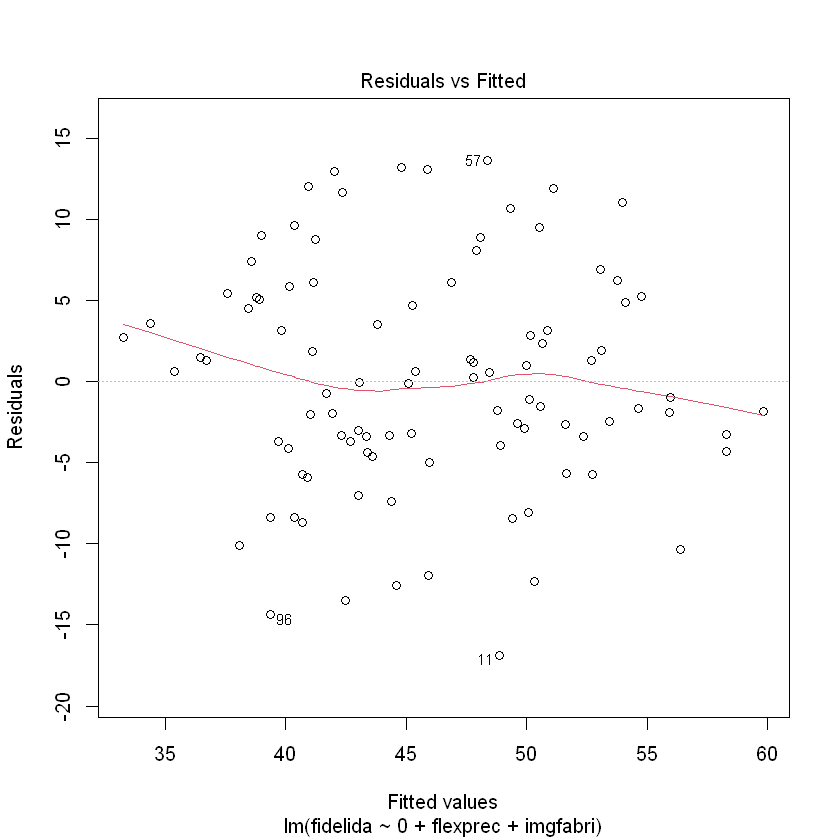

In [107]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(modelo, which=1) # El parámetro which=1 genera el grafico residuos = f(valores ajustados)

In [108]:
# Evidencia numérica para comprobar la existencia de una relación lineal entre los valores ajustados y los residuos

# Paso 1: verificar normalidad de los valores ajustados y residuos
yhat = modelo$fitted.values
uhat = modelo$residuals

lillie.test(yhat)
lillie.test(uhat)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  yhat
D = 0.079055, p-value = 0.1337



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  uhat
D = 0.067997, p-value = 0.3142


El `p-valor` obtenido en el contraste de bondad de ajuste para los valores ajustados y los residuos del modelo es de $0.1337$ y $0.3142$, respectivamente. Al ser ambos valores superiores al nivel de significación del $5\%$, no podemos rechazar la hipótesis nula o en otras palabras, existe evidencia estadísticamente significativa de que los valores ajustados y los residuos del modelo SÍ se ajustan a una distribución normal y consecuentemente, se puede emplear el método de `Pearson` para contrastar la correlación lineal de los valores ajustados con los residuos del modelo.

In [109]:
# Evidencia numérica y contraste de linealidad mediante método de Pearson
# H0 (Hipótesis Nula): las variables son independientes (r=0)
# H1 (Hipótesis Alternativa): las variables están correlacionadas (r!=0)
cor.test(x = yhat, y = uhat, method = 'pearson')


	Pearson's product-moment correlation

data:  yhat and uhat
t = -0.53865, df = 97, p-value = 0.5914
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.249334  0.144358
sample estimates:
        cor 
-0.05461013 


El `p-valor` obtenido es de $0.5914$ para el contraste de correlación lineal entre los valores ajustados y los residuos. Dicho `p-valor` es superior al nivel de significación del $5\%$ y por lo tanto, <u>existe evidencia estadísticamente significativa de que los valores ajustados y los residuos NO están linealmente correlacionados.

**INTERPRETACIÓN DE RESULTADOS** Conclusiones extraídas del gráfico Residuos vs Valores Ajustados y evidencia numérica:

- Para que las variables consideradas en el modelo estén linealmente relacionadas, no se debe observar ningún tipo de patrón en la gráfica de residuos vs valores ajustados. En este caso, no se observa ningún tipo de patrón por lo que la evidencia gráfica sugiere que las variables están linealmente relacionadas. Además, se ha realizado la evidencia numérica de correlación entre los valores ajustados vs residuos y su correspondiente contraste de hipótesis, obteniendo que hay evidencia estadísticamente significativa para afirmar que los valores ajustados y los residuos NO están relacionados linealmente. En resumen, se obtiene una `Evidencia POSITIVA` en esta primera valoración realizada mediante el gráfico residuos vs valores ajustados.

- El gráfico muestra un punto outlier en la zona central alta (etiqueta 57) y otros dos puntos outliers en la zona central baja (etiquetas 96 y 11). Estos outliers son los que tienen mayor valor absoluto de residuo y pueden estar afectando a la calidad del modelo, por lo que se debería verificar si los valores registrados son correctos o incluso, eliminarlos del modelo para ver si mejora el resultado.

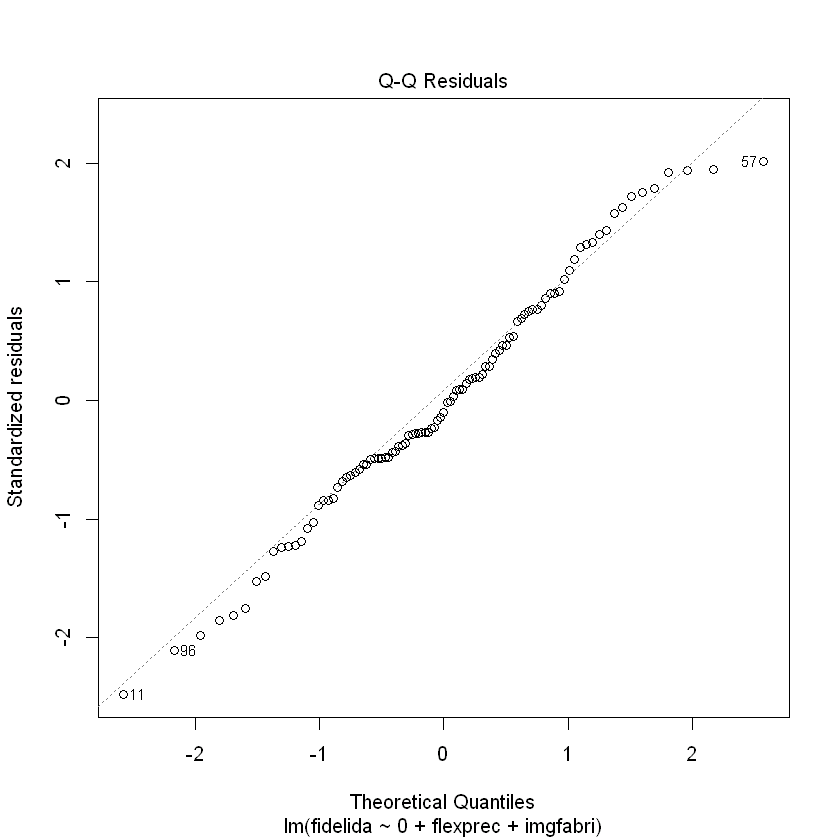

In [110]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(modelo, which=2) # El parámetro which=2 genera el gráfico Quantile-Quantile de los residuos

**INTERPRETACIÓN DE RESULTADOS** La normalidad de los residuos es clave para que los intervalos de confianza y los valores p de las pruebas de hipótesis sobre los coeficientes sean válidos. Si los residuos no son normales, las predicciones del modelo pueden no ser confiables.

La anterior gráfica representa el gráfico Quantile-Quantile de residuos que evalua si dichos residuos siguen una distribución normal.

Conclusiones extraidas del gráfico y evidencia numérica:

- Se observa como los puntos del gráfico se ajustan bastante bien a la diagonal, sugiriendo que la distribución de los residuos se ajusta a una normal. Consecuentemente, la evidencia gráfica sugiere que los residuos se ajustan a una distribución normal y de este modo, los cálculos realizados en las pruebas de hipótesis y los intervalos de confianza son precisos para este modelo.

- En el anterior apartado se ha realizado el correspondiente contraste de hipótesis confirmando que los residuos se ajustan a una distribución normal. Obteniendo una doble evidencia (gráfica y numérica) además del correspondiente contraste que confirma la condición de normalidad en la distribución de los residuos.

En resumen, nuestro mejor modelo ha pasado esta segunda valoración realizada mediante el gráfico Q-Q de residuos, obteniendo una`Evidencia POSITIVA`.

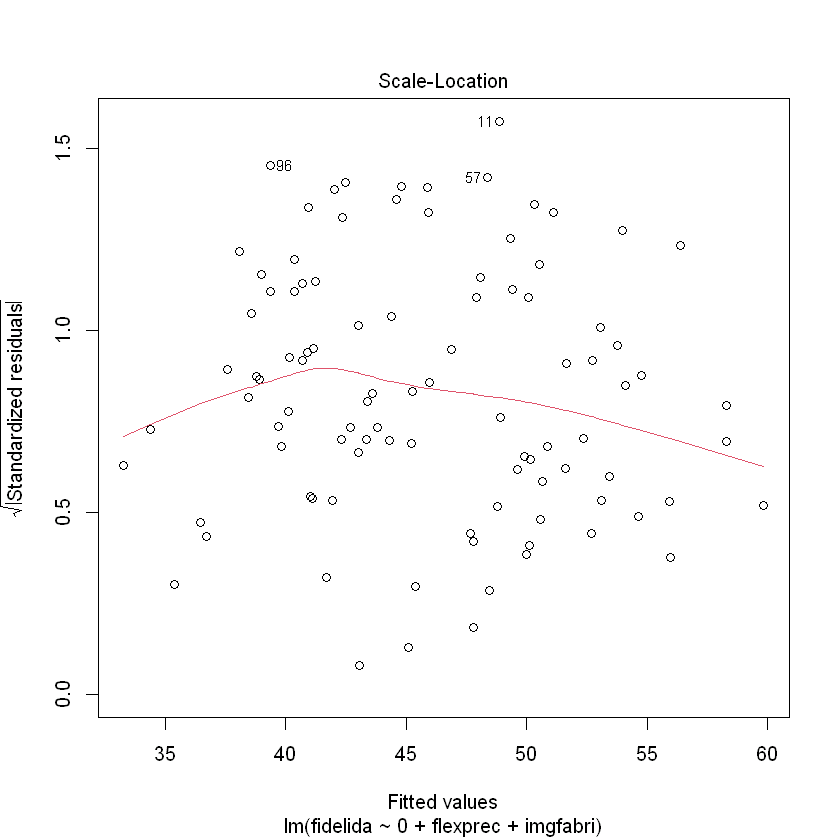

In [111]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(modelo, which=3) # which=3 genera un gráfico de residuos estandarizados frente a valores ajustados

Para contrastar la hipótesis de varianza constante en los residuos, podemos utilizar las pruebas de `Breusch-Pagan` (se debe cumplir la normalidad en los residuos) o `White` (no es necesario cumplir la normalidad en los residuos). Dado que ya se ha contrastado que los residuos se ajustan a una distribución normal, emplearemos la prueba de `Breusch-Pagan` para contrastar la hipótesis de varianza constante en los residuos:

In [112]:
# Constraste de varianza constante en los residuos mediante el test de White
# H0: la varianza de los errores es constante (homocedasticidad)
#library(sandwich)
#library(lmtest)
bptest(modelo, studentize = FALSE)


	Breusch-Pagan test

data:  modelo
BP = 0.41471, df = 1, p-value = 0.5196


**INTERPRETACIÓN DE RESULTADOS** Pasando el parámetro `which=3` a la función `plot`, se está representando el gráfico de la raíz cuadrada de los residuos estandarizados vs valores ajustados. El objetivo de este gráfico es analizar la heterocedasticidad de los residuos del modelos. Este tipo de modelos parten de la base de que los residuos deben tener una varianza constante para que los cálculos del modelo y los intervalos de confianza sean fiables.

Conclusiones extraídas:

- Para verificar gráficamente que los residuos no presentan heterocedasticidad, no se debe observar ningún tipo de patrón no aleatorio en la gráfica de raíz cuadrada de los residuos vs valores ajustados. En este caso, no se observa ningún tipo de patrón por lo que la evidencia gráfica sugiere que los residuos no presentan heterocedasticidad.

- Además, el contraste de varianza constante de los residuos realizado mediante el test de `Breusch-Pagan`, nos evidencia que el modelo NO presenta heterocedasticidad o en otras palabras, hay evidencia estadísticamente significativa de que la varianza de los residuos del modelo es constante.

En resumen, nuestro mejor modelo sí ha pasado esta tercera valoración realizada mediante el gráfico de residuos estandarizados vs valores ajustados, obteniendo una `Evidencia POSITIVA`.

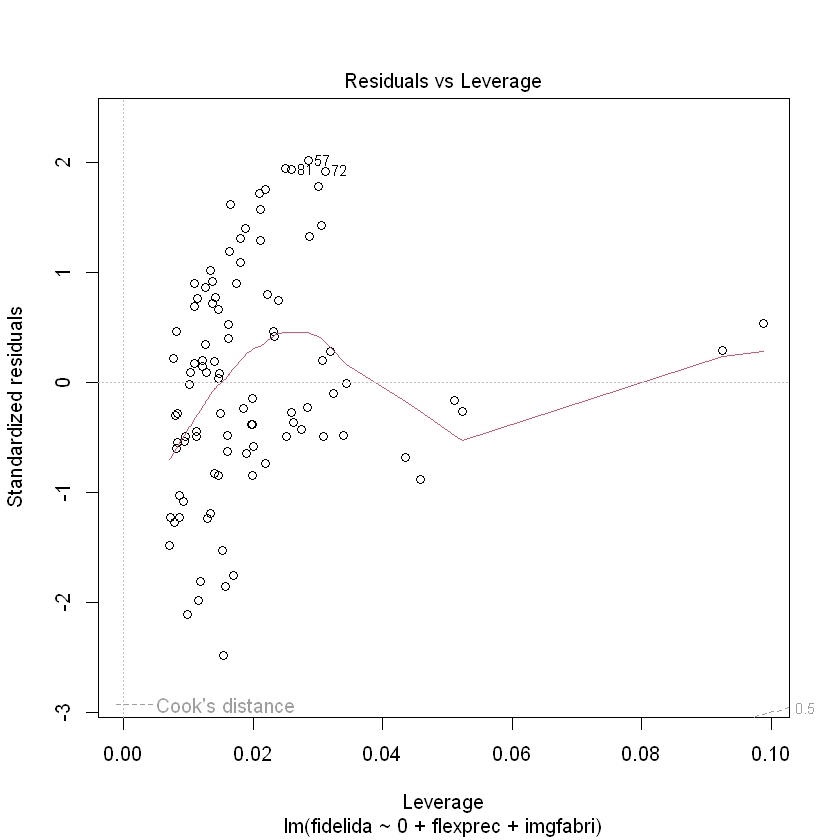

In [113]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(modelo, which=5) # which=5 crea el gráfico de residuos estandarizados frente al apalancamiento (leverage)

In [114]:
# Evidencia numérica de cantidad de puntos influyentes
# Cálculo del estadístico de la distancia de Cook
distancia_cook = cooks.distance(modelo)

# Identificar observaciones con alta influencia
umbral = 1
# Si distancia_cook > umbral -> punto influyente en el modelo
observaciones_influyentes = which(distancia_cook > umbral)

# Mostramos por pantalla el número de puntos influyentes
length(observaciones_influyentes)

[1] 0

**INTERPRETACIÓN DE RESULTADOS** Pasando el parámetro `which=5` a la función `plot`, se está representando el gráfico de residuos estandarizados frente al apalancamiento (leverage). El eje X representa el apalancamiento de cada observación. Los puntos con un apalancamiento alto tienen mayor capacidad para influir en el ajuste del modelo. El objetivo de este gráfico es:

- Identificar los puntos con alta influencia en el modelo (impacto desproporcionado en la determinación de los parámetros del modelo).
  
- Puntos aberrantes con valor muy alto de residuo asociado.

- Puntos con efecto palanca (leverage), es decir, predicciones no satisfactorias realizdas por el modelo.

Conslusiones extraídas:

- Visualmente, no se observa ningún punto fuera de las curvas de Cook. Además, la evidencia numérica confirma esta misma información. Consecuentemente, el modelo no presenta puntos con un impacto desproporcionado en la determinación de los parámetros del modelo, obteniendo en este sentido, una `Evidencia POSITIVA`.

- NO se observan puntos muy negativos y con un apalancamiento significativo o en otras palabras, puntos aberrantes (puntos con valores de muy alto de residuo asociado). Por lo tanto, obtenemos una `Evidencia POSITIVA` en este apartado.

- No se observan puntos muy positivos y con mucho apalancamiento o en otras palabras, el modelo no presenta puntos que no ha sido capaz de predecir correctamente. En este caso, obtenemos una `Evidencia POSITIVA`.

In [115]:
# Gráfico 5: Diagnosis para comprobar multicolinealidad
# Contraste de bondad de ajuste para comprobar si las variables dependientes se ajustan a una distribución normal
# H0: la variable se ajusta a una normal
lillie.test(df$flexprec)
lillie.test(df$imgfabri)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  df$flexprec
D = 0.092388, p-value = 0.03662



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  df$imgfabri
D = 0.10307, p-value = 0.0114


Observamos como los valores obtenidos del `p-valor` para las variables independientes son menores al nivel de significación del $5\%$ y por lo tanto, las variables independientes no se ajustan a una distribución normal. Emplearemos el método de Kendall para contrastar la correlación entre las variables dependientes:

In [116]:
# Contraste y evidencia numérica mediante el cálculo del coeficiente de correlación
# H0 (Hipótesis Nula): las variables son independientes (r = 0)
# H1 (Hipótesis Alternativa): las variables están correlacionadas (r != 0)
cor.test(x = df$flexprec, y = df$imgfabri, method = 'kendall')


	Kendall's rank correlation tau

data:  df$flexprec and df$imgfabri
z = -1.1055, p-value = 0.2689
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.07711167 


**INTERPRETACIÓN DE RESULTADOS** Con el contraste de correlación realizado entre las variables independientes del modelo, el `p-valor` obtenido es superior al nivel de significación del $5\%$. Es decir, existe evidencia estadísticamente significativa de que las variables independientes del modelo no están relacionadas y por tanto, el modelo no presenta problemas de multicolinealidad, obteniendo una `Evidencia POSITIVA` en este apartado de diagnosis del modelo.

La multicolinealidad representa un problema para los modelos de regresión lineal múltiple ya que el cálculo de los coeficientes es poco fiables debido a que al modelo le cuesta distinguir el efecto individual de cada variable independiente sobre la dependiente. Como su propio nombre indica, las variables independientes deben ser independientes entre ellas. En caso contrario, los coeficientes de regresión pueden cambiar drásticamente ante un mínimo cambio en los datos de entrenamiento del modelo.

Como conclusión final del proceso de diagnosis del modelo, hemos obtenido un total de 7 evidencias positivas y 0 negativas. Por lo tanto, el modelo seleccionado para predecir el porcentaje de satisfacción de los clientes de la compañía Hatco S.L. SÍ es bueno.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [117]:
# Extracción de los coeficientes de regresión con la función `coef`
bhat = coef(modelo)
bhat

flexprec imgfabri 
4.161531 2.549199

**INTERPRETACIÓN DE RESULTADOS** Interpretación de los coeficientes de regresión del MRLM:

- $\beta_0=0$: este coeficiente de regresión es 0 debido a que hemos refinado o forzado al modelo para que pase por el origen de coordenadas.

- $\beta_1=4.16153092764733$: este coeficiente de regresión indica que por cada aumento en una unidad en la flexibilidad de precios con un cliente, el porcentaje de fidelidad con el cliente aumenta aproximadamente un $416\%$. Analizando los coeficientes de regresión, podemos observar como la variable `flexprec` es la que más efecto tiene en el porcentaje de fidelidad de los clientes.

- $\beta_2=2.549198780495$: este coeficiente de regresión indica que por cada aumento en una unidad en la imagen del fabricante, el porcentaje de fidelidad del cliente aumenta un $255\%$.

En conclusión, se observa como las dos variables independientes seleccionadas tienen un gran impacto en la estimación del porcentaje de fidelidad de un cliente de la compañía Hatco S.L, siendo la flexibilidad de precios la que mayor impacto tiene de las dos variables independientes.

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [118]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat = fitted(modelo)
yhat

1        2        3        4        5        6        7        8 
40.69580 43.04236 39.01592 44.58714 59.83445 45.11225 56.35926 38.80241 
       9       10       11       12       13       14       15       16 
51.09962 42.34514 48.85763 49.59625 43.39536 50.31960 58.27879 52.34808 
      17       18       19       20       21       22       23       24 
36.72164 43.00534 55.91696 58.27879 45.98596 40.91370 55.96924 40.11841 
      25       26       27       28       29       30       31       32 
48.44147 47.66145 39.70226 55.91696 50.12135 38.57363 38.47994 54.62710 
      33       34       35       36       37       38       39       40 
53.74251 41.16423 40.71106 42.68288 38.92223 51.63560 42.48024 38.10519 
      41       42       43       44       45       46       47       48 
43.35395 59.83445 50.17363 47.77040 36.48199 50.84471 53.08670 37.58009 
      49       50       51       52       53       54       55       56 
48.09287 40.93984 49.41975 46.87055 41.25792 40.37333 43.59800 49.88818 
      57       58       59       60       61       62       63       64 
48.38480 53.97129 45.39331 45.27348 52.67055 53.07144 52.72283 35.37949 
      65       66       67       68       69       70       71       72 
41.94426 48.92517 54.09112 40.14455 44.80505 47.79654 40.35806 42.02707 
      73       74       75       76       77       78       79       80 
53.43531 49.34133 44.29082 51.60946 50.09082 48.77921 41.01826 47.93163 
      81       82       83       84       85       86       87       88 
45.89227 43.79185 41.70021 44.37363 50.66821 39.83735 49.99713 43.03148 
      89       90       91       92       93       94       95       96 
45.92929 54.76219 50.55925 42.33427 41.10756 33.29873 39.35365 39.37979 
      97       98       99 
50.52224 34.38595 45.21681

Los valores ajustados de la variable dependiente representan lo que el modelo anticipa que debería ser el porcentaje de fidelidad de un cliente para un determinado valor en las variables independientes del modelo. La comparación de estos valores ajustados con los valores observados permite evaluar la precisión y utilidad del modelo. Si los valores ajustados se alinean estrechamente con los valores observados, indica que el modelo es un buen predictor. Sin embargo, las discrepancias entre los valores ajustados y observados pueden señalar limitaciones del modelo o la necesidad de considerar otras variables que también podrían influir en la variable dependiente.

In [119]:
# Extracción de los residuos de la variable dependiente con la función `fitted`
uhat = modelo$residuals
uhat

1           2           3           4           5           6 
 -8.6957977  -0.0423568   8.9840810 -12.5871424  -1.8344474  -0.1122485 
          7           8           9          10          11          12 
-10.3592558   5.1975945  11.9003750  11.6548563 -16.8576263  -2.5962458 
         13          14          15          16          17          18 
 -4.3953559 -12.3195990  -4.2787880  -3.3480843   1.2783599  -3.0053429 
         19          20          21          22          23          24 
 -1.9169626  -3.2787880  -4.9859611  -5.9137037  -0.9692428  -4.1184114 
         25          26          27          28          29          30 
  0.5585268   1.3385527  -3.7022583  -1.9169626  -1.1213519   7.4263742 
         31          32          33          34          35          36 
  4.5200609  -1.6270968   6.2574896   6.1357690  -5.7110640  -3.6828765 
         37          38          39          40          41          42 
  5.0777677  -5.6356049 -13.4802368 -10.1051924  -3.3539494  -1.8344474 
         43          44          45          46          47          48 
  2.8263679   0.2295998   1.5180135   3.1552949   1.9132962   5.4199136 
         49          50          51          52          53          54 
  8.9071333  12.0601562  -8.4197463   6.1294525   8.7420824  -8.3733312 
         55          56          57          58          59          60 
 -4.5979955  -2.8881796  13.6151995  11.0287098   0.6066915   4.7265183 
         61          62          63          64          65          66 
  1.3294493   6.9285625  -5.7228309   0.6205059  -1.9442569  -3.9251729 
         67          68          69          70          71          72 
  4.9088830   5.8554485  13.1949516   1.2034596   9.6419351  12.9729302 
         73          74          75          76          77          78 
 -2.4353103  10.6586740  -3.2908161  -2.6094647  -8.0908193  -1.7792060 
         79          80          81          82          83          84 
 -2.0182641   8.0683665  13.1077256   3.5081499  -0.7002109  -7.3736290 
         85          86          87          88          89          90 
  2.3317944   3.1626486   1.0028674  -7.0314830 -11.9292883   5.2378101 
         91          92          93          94          95          96 
 -1.5592526  -3.3342699   1.8924418   2.7012713  -8.3536517 -14.3797918 
         97          98          99 
  9.4777613   3.6140453  -3.2168089

Los errores o residuos son indicativos de la parte del porcentaje de fidelidad de un cliente que no se puede explicar por el efecto de las variables independientes consideradas en el modelo. Si los residuos son pequeños y distribuidos aleatoriamente alrededor de cero, sugiere que el modelo se ajusta bien a los datos y que las variables independientes son un buen predictor de la variable dependiente. Por otro lado, si los residuos son grandes o muestran algún patrón, esto puede indicar que el modelo no captura completamente la relación entre las variables, o que hay otras variables influyentes no consideradas en el modelo. Además, el análisis de los residuos es esencial para verificar suposiciones críticas del modelo, como la homocedasticidad (varianza constante de los residuos) y la normalidad.

Como hemos observado en el valor del coeficiente de determinación $R^2$ de 0.98, existe aproximadamente un 2% de la variabilidad del porcentaje de fidelidad de los clientes atribuible a otros factores no contemplados en el modelo.

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

Los coeficientes de determinación $R^2$ y $R_{adj}^2$ de bondad de ajuste son fundamentales para la interpretación del modelo de regresión. Concretamente, estos coeficientes indican la capacidad explicativa del modelo. A continuación, se muestra el cálculo y la interpretación de cada uno de estos coeficientes.

In [120]:
# Extracción directa del valor de los coeficientes de determinación
R2 = summary(modelo)$r.squared
R2

[1] 0.9792441

Se obtiene un $R^{2}=0.97924412780953$, indicando que aproximadamente el 98% de la variabilidad en el porcentaje de fidelidad de un cliente de la compañía Hatco S.L. puede ser explicada por las variables independientes consideradas en el modelo. Además, podemos interpretar que aunque existe una relación lineal entre las variables independientes con la dependiente, hay otros factores que influyen aproximadamente un $2\%$ en el porcentaje de fidelidad y que no están incluidos en el modelo.

In [121]:
# Obtenemos R2 ajustado a través de su ecuación formal 1-(1-R2)*(n-1/n-k)
k = 2 # k = número parámetros estimados
n = nrow(df) # n = número de observaciones
R2adj = 1-(1-R2)*((n-1)/(n-k))
R2adj

[1] 0.9790301

El valor del coeficiente $R^2$ está relacionado con el número de variables independientes que consideramos. En este sentido, si agregamos variables independientes a nuestro modelo, $R^2$ mejorará, por el simple hecho de incluir más variables en el modelo. Luego, $R^2$ tiende a **sobreestimar el proder predictivo del modelo**, aunque las variables no sean significativas. Entonces, calculamos el coeficiente de determinación ajustado $R^2_{adj}$ que intenta corregir esto ya que penaliza la incorporación de nuevas variables independiente. Para nuestro caso, obtenemos un $R_{adj}^2=0.979030149745711$, manteniento una capacidad explicativa muy alta.

<div style="background-color:#5DADE2"><b>Apartado 6</b></div>

In [122]:
# Extracción directa de los p-valor de la prueba de significatividad individual del modelo
# H0 (Hipótesis Nula): el coeficiente de regresión NO es significativo (beta_i=0)
# H1 (Hipótesis Alternativa): el coeficiente de regresión es significativo (beta_i!=0)
summary(modelo)$coef[, 'Pr(>|t|)']

flexprec     imgfabri 
1.636374e-24 1.585237e-07

La prueba de significatividad individual se encarga de contrastar la significatividad de cada uno de los coeficientes de regresión del modelo o en otras palabras, determina si cada una de las variables independientes tiene realmente influencia sobra la independiente. Se establece como <u>Hipótesis Nula $H_0$: el coeficiente de regresión NO es significativo</u> ($\beta_i=0$).

En caso de obtener un p-valor inferior al nivel de significación alternativo, se debe rechazar la Hipótesis Nula en favor de la Hipótesis Alternativa, evidenciando que el coeficiente de regresión SÍ es significativo. En caso de que el p-valor sea mayor que el nivel de significación, significa que el coeficiente de regresión NO es significativo y por lo tanto, la variable independiente no tiene influencia sobre la dependiente en el modelo. Para nuestro caso, observamos como el p-valor obtenido para las variables independientes del modelo `flexprec` y `imgfabri` es $1.6363735702632e-24$ y $1.58523671274157e-07$, respectivamente. Al ser ambos valores inferiores al nivel de significación del $5\%$, existe evidencia estadísticamente significativa para afirmar que los dos coeficientes de regresión del modelo son significativos.

<div style="background-color:#5DADE2"><b>Apartado 7</b></div>

La prueba de significatividad global evalúa la hipótesis nula de que todos los coeficientes de las variables explicativas son iguales a cero, es decir: $H_0$: $\beta^{'s}=0$.

In [123]:
# Extracción manual del p-valor de la prueba de significatividad global del modelo
# Extraemos grados de libertad de numerador y denominador para cálculo del p-valor
df1 = summary(modelo)$fstatistic[2] # Grados de libertad numerador
df2 = summary(modelo)$fstatistic[3] # Grados de libertad denominador

# La función pf nos devuelve el p-valor
p_valor_global = pf(summary(modelo)$fstatistic[1] , df1, df2, lower.tail = FALSE)
p_valor_global

value 
2.406234e-82

Realizamos el contraste de **significatividad global** del conjunto de parámetros $\beta^{'s}$ siendo la hipótesis nula $H_0:\beta_1=\beta_2=0$. En este caso, rechazamos la hipótesis nula ya que el p-valor es menor que el nivel de significación del $5\%$. Lo que implica que los valores de los coeficientes son diferentes entre sí. Aunque ya lo habíamos comprobado utilizando el contraste de significatividad individual, obtenemos una doble evidencia, validando los resultados anteriores y dotando de mayor robustez a los mismos.

<div style="background-color:#5DADE2"><b>Apartado 8</b></div>

La multicolinealidad representa un problema para los modelos de regresión lineal múltiple ya que el cálculo de los coeficientes es poco fiables debido a que al modelo le cuesta distinguir el efecto individual de cada variable independiente sobre la dependiente. Como su propio nombre indica, las variables independientes deben ser independientes entre ellas. En caso contrario, los coeficientes de regresión pueden cambiar drásticamente ante un mínimo cambio en los datos de entrenamiento del modelo.

A continuación, se realizará el correspondiente de contraste de correlación entre las variables independientes del modelo. En primer lugar, se verificará la condición de normalidad de las variables independientes para ver si se puede aplicar el método de `Pearson` para el contraste de correlación.

In [124]:
# Contraste de bondad de ajuste para comprobar si las variables dependientes se ajustan a una distribución normal
lillie.test(df$flexprec)
lillie.test(df$imgfabri)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  df$flexprec
D = 0.092388, p-value = 0.03662



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  df$imgfabri
D = 0.10307, p-value = 0.0114


Observamos como los valores obtenidos del `p-valor` para las variables independientes son menores al nivel de significación del $5\%$ y por lo tanto, las variables independientes no se ajustan a una distribución normal. Emplearemos el método de Kendall para contrastar la correlación entre las variables dependientes:

In [125]:
# Contraste y evidencia numérica mediante el cálculo del coeficiente de correlación
# H0 (Hipótesis Nula): las variables son independientes (r = 0)
# H1 (Hipótesis Alternativa): las variables están correlacionadas (r != 0)
cor.test(x = df$flexprec, y = df$imgfabri, method = 'kendall')


	Kendall's rank correlation tau

data:  df$flexprec and df$imgfabri
z = -1.1055, p-value = 0.2689
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.07711167 


Con el contraste de correlación realizado entre las variables independientes del modelo, el `p-valor` obtenido es superior al nivel de significación del $5\%$. Es decir, existe evidencia estadísticamente significativa de que las variables independientes del modelo no están relacionadas y por tanto, el modelo no presenta problemas de multicolinealidad.

### 05 Ejercicio [1.5 puntos] 

En este ejercicio deberéis de <u>crear vuestra propia función de R</u> con el objetivo de automatizar el proceso de ajuste de un modelo de regresión lineal múltiple a un conjunto de datos de sección cruzada dado. Es decir, tenéis que replicar la función **`lm()`** de la librería $\tt stats$. Una vez creada, comparar los resultados obtenidos con la propia función **`lm()`** utilizando alguna de las bases de datos propias de las librerías de R teniendo en cuenta los principales objetos de la salida de los modelos: output de la regresión, coeficientes de regresión estimados, residuos estimados, grados de libertad, etc.

Para aplicar a un ejemplo la función que diseñéis podéis utilizar cualquier base de datos disponible en las precargadas de R.

In [126]:
# Bases de datos precargadas en R
data(package = .packages(all.available = TRUE))

Package,Item,Title
<chr>,<chr>,<chr>
carData,AMSsurvey,American Math Society Survey Data
carData,Adler,Experimenter Expectations
carData,Angell,Moral Integration of American Cities
carData,Anscombe,U. S. State Public-School Expenditures
carData,Arrests,Arrests for Marijuana Possession
carData,BEPS,British Election Panel Study
carData,Baumann,Methods of Teaching Reading Comprehension
carData,Bfox,Canadian Women's Labour-Force Participation
carData,Blackmore,Exercise Histories of Eating-Disordered and Control Subjects


<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 05</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [127]:
# Cargaremos el dataset mtcars para comparar los resultados devueltos por nuestra función linearModel vs la función precargada lm
data('mtcars')
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [128]:
# Creamos función linearModel que replica el funcionamiento de la función precargada lm
# La función toma los siguientes parámetros de entrada:
# formula: fórmula del modelo de regresión lineal
# data: dataset que contiene las variables independientes y dependiente
linearModel = function(formula, data){
   
    # Coeficientes de regresión
        # Extraemos términos del modelo
        var_dependiente_nombre = formula[[2]] # Nombre de la variable dependiente
        vars_independientes_nombre = attr(terms(formula, data = data), 'term.labels') # Nombre de las variables independientes
        y = data[, names(data) == var_dependiente_nombre] # Vector valores variable dependiente (valores originales)
        X = as.matrix(cbind('(Intercept)' = 1, data[, names(data) %in% vars_independientes_nombre]))  # Matriz modelo

        # Calculamos los coeficientes de regresión y guardamos los resultados en un vector
        betas = as.vector(solve(t(X) %*% X) %*% t(X) %*% y)

        # Aplicamos nombre a los valores de los coeficientes de regresión
        names(betas) = colnames(X)

    # Valores ajustados del modelo
        # Calculamos los valores ajustados del modelo y guardamos los resultados en un vector
        y_ajustados = as.vector(X %*% betas)

        # Aplicamos nombre a los valores de los valores ajustados
        names(y_ajustados) = rownames(data)

    # Residuos
        # Calculamos los residuos
        residuos = y - y_ajustados

    # Grados de libertad
        # Calculamos el número de parámetros del modelo
        num_parametros = length(betas)

        # Calculamos número de grados de libertad del modelo
        gdl = nrow(data) - num_parametros
    
    # Error estándar de los residuos
        # Calculamos el error estándar de los residuos
        SSR = sqrt(sum(residuos^2)/gdl)

    # Error estándar de los parámetros estimados
        # Calculamos matriz var-cov
        varcov = SSR^2 * solve(t(X) %*% X)

        # Calculamos error estándar de los parámetros estimados
        se = sqrt(diag(varcov))

    # Estadístico t
        # Cálculo del estadístico t
        t_values = betas / se

    # P-valor prueba de significatividad individual
        # Calculamos p-valor de los coeficientes de regresión para la prueba de significatividad individual
        p_values_individual = 2 * pt(-abs(t_values), df = gdl) # La función pt calcula la probabilidad acumulada de la distrib. t de Student

    # Coeficientes de determinación
        # Calculamos coeficiente de determinación R2
        R2 = var(y_ajustados) / var(y)

        # Calculamos coeficiente de determinación ajustado R2_adj
        n = nrow(data) # n = número de observaciones
        k = num_parametros # k = número de parámetros estimados
        R2_adj = 1 - (1 - R2) * (n - 1) / (n- k)

    # Estadístico F
        # Calculamos sumas de SST, SSR y SSE
        SST_sum = sum((y - mean(y))^2) # Suma total de cuadrados
        SSR_sum = sum((y_ajustados - mean(y))^2) # Suma de cuadrados explicada
        SSE_sum = sum(residuos^2) # Suma de cuadrados de los residuos

        # Calculamos MSR y MSE
        MSR = SSR_sum / (num_parametros - 1) # Variabilidad explicada por el modelo
        MSE = SSE_sum / gdl  # Variabilidad NO explicada por el modelo

        # Calculamos estadístico F
        F_value = MSR / MSE

    # P-valor prueba de significatividad global
        # Calculamos p-valor de los coeficientes de regresión para la prueba de significatividad global
        p_value_global = pf(F_value, df1 = (num_parametros - 1), df2 = gdl, lower.tail = FALSE)  # La función pf calcula la probabilidad acumulada de la distrib. F de Fisher-Snedecor
    
    # Creamos objeto tipo lista del modelo lineal
    result = list(
        coefficients = betas, # Coeficientes de regresión del modelo
        residuals = residuos, # Residuos del modelo
        fitted.values = y_ajustados, # Valores ajustados del modelo
        df = gdl, # Grados de libertad del modelo
        SSR = SSR, # Error estándar de los residuos
        se = se, # Error estándar de los parámetros estimados
        't value' = t_values, # Estadístico t de los coeficientes de regresión
        'Pr(>|t|)' = p_values_individual, # P-valor de significatividad individual
        R2 = R2, # Coeficientes de determinación
        R2_adj = R2_adj, # Coeficientes de determinación ajustado
        F_value = F_value, # Estadístico F global del modelo
        p_value = p_value_global, # P-valor de significatividad global
        call = match.call() # Devuelve la llamada a la función
    )  

    # Creamos clase linearModel
    class(result) = 'linearModel'
    
    return(result)
}

# Creamos método de linearModel para imprimir resultados
print.linearModel = function(model) {
  cat("Call:\n")
  print(model$call) # Imprimimos expresión del modelo
  cat("\nCoefficients:\n")
  print(round(model$coefficients, 5))  # Imprimimos coeficientes de regresión del modelo
}

# Creamos método de linearModel para resumir resultados
summary.linearModel = function(model) {
    cat('\nCall:\n')
    
    # Imprimimos expresión del modelo
    print(model$call)
    cat('\nResiduals:\n')

    # Imprimimos principales estadísticos de los residuos
    print(c('Min' = round(min(model$residuals), 4),  # Valor mínimo de los residuos
            '1Q' = round(quantile(model$residuals, 0.25, names = FALSE), 4),  # Primer cuartil de los residuos
            'Median' = round(quantile(model$residuals, 0.50, names = FALSE), 4),  # Mediana de los residuos
            '3Q' = round(quantile(model$residuals, 0.75, names = FALSE), 4),  # Tercer cuartil de los residuos
            'Max' = round(max(model$residuals), 4)))  # Valor máximo de los residuos
    cat('\nCoefficients:\n')

    # Imprimimos información relativa a los coeficientes de regresión
    # Creamos data.frame con información de los coeficientes de regresión
    coefficients_df = data.frame(round(model$coefficients, 5), # Valores de los coeficientes de regresión
                                 round(model$se, 5), # Errores estándar de los coeficientes de regresión
                                 round(model$'t value', 5), # Estadístico t  de los coeficientes de regresión 
                                 round(model$'Pr(>|t|)', 5),  # Significatividad  de los coeficientes de regresión 
                                 sapply(model$'Pr(>|t|)', function(x){ # Codificación de p-valores (significatividad) replicado de función lm
                                     if (x < 0.001){return('***')}
                                     else if (x >= 0.001 & x < 0.01){return('**')}
                                     else if (x >= 0.01 & x < 0.05){return('*')}
                                     else if (x >= 0.05 & x < 0.1){return('.')}
                                     else if (x >= 0.1 & x <= 1){return(' ')}
                                 })
                                )
    # Establecemos nombres a las columnas del data.frame creado
    colnames(coefficients_df) = c('Estimate', 'Std. Error', 't value', 'Pr(>|t|)', ' ')
    print(coefficients_df)
    
    cat('---\n')
    cat('Signif. codes:  0 \'***\' 0.001 \'**\' 0.01 \'*\' 0.05 \'.\' 0.1 \' \' 1\n')
    
    # Imprimimos error estándar y grados de libertad del modelo
    cat('\nResidual standard error:', round(model$SSR,2), 'on', model$df, 'degrees of freedom\n')

    # Imprimimos coeficientes de determinación del modelo
    cat('Multiple R-squared:  ', round(model$R2, 3),',	Adjusted R-squared:  ', round(model$R2_adj, 4), '\n', sep = '')

    # Imprimimos estadístico F y p-valor de significatividad global del modelo
    cat('F-statistic: ', round(model$F_value,2), ' on ',
        length(model$coefficients) - 1,' and ',
        model$df,' DF,  p-value: ', format(model$p_value, digits = 4, scientific = TRUE),
        sep = '')
}

In [129]:
# Declaramos modelo con función creada linearModel
modelo_linearModel = linearModel(formula = mpg ~ ., data = mtcars)

# Declaramos mismo modelo con función creada lm
modelo_lm = lm(formula = mpg ~ ., data = mtcars)

Observamos la estructura del objeto devuelto por la función creada `linearModel`:

In [130]:
str(modelo_linearModel)

List of 13
 $ coefficients : Named num [1:11] 12.3034 -0.1114 0.0133 -0.0215 0.7871 ...
  ..- attr(*, "names")= chr [1:11] "(Intercept)" "cyl" "disp" "hp" ...
 $ residuals    : Named num [1:32] -1.6 -1.112 -3.451 0.163 1.007 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ fitted.values: Named num [1:32] 22.6 22.1 26.3 21.2 17.7 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ df           : int 21
 $ SSR          : num 2.65
 $ se           : Named num [1:11] 18.7179 1.045 0.0179 0.0218 1.6354 ...
  ..- attr(*, "names")= chr [1:11] "(Intercept)" "cyl" "disp" "hp" ...
 $ t value      : Named num [1:11] 0.657 -0.107 0.747 -0.987 0.481 ...
  ..- attr(*, "names")= chr [1:11] "(Intercept)" "cyl" "disp" "hp" ...
 $ Pr(>|t|)     : Named num [1:11] 0.518 0.916 0.463 0.335 0.635 ...
  ..- attr(*, "names")= chr [1:11] "(Intercept)" "cyl" "disp" "hp" ...
 $ R2           : num 0.869
 $ R2_

**INTERPRETACIÓN DE RESULTADOS** Atributos del objeto creado devuelto por la función creada `linearModel`:

- `coefficients`: vector de coeficientes de regresión.
  
- `residuals`: vector de residuos.

- `fitted.values`: vector de valores ajustados.

- `df`: grados de libertad del modelo.

- `SSR`: error estándar de los residuos.

- `se`: error estándar de los parámetros estimados (coeficientes de regresión).

- `t value`: estadístico t de los parámetros estimados.

- `Pr(>|t|)`: p-valor de significatividad individual de los coeficientes de regresión.

- `R2`: coeficiente de determinación.

- `R2_adj`: coeficiente de determinación ajustado.

- `F_value`: estadístico F global del modelo.

- `p_value`: p-valor de significatividad global del modelo.

- `call`: devuelve la llamada de la función.

A continuación, comparamos las salidas devueltas por la función creada `linearModel` y la función precargada `lm`:

In [131]:
# Imprimimos salida de la función linearModel
modelo_linearModel

Call:
linearModel(formula = mpg ~ ., data = mtcars)

Coefficients:
(Intercept)         cyl        disp          hp        drat          wt 
   12.30337    -0.11144     0.01334    -0.02148     0.78711    -3.71530 
       qsec          vs          am        gear        carb 
    0.82104     0.31776     2.52023     0.65541    -0.19942 

In [132]:
# Imprimimos salida de la función lm
modelo_lm


Call:
lm(formula = mpg ~ ., data = mtcars)

Coefficients:
(Intercept)          cyl         disp           hp         drat           wt  
   12.30337     -0.11144      0.01334     -0.02148      0.78711     -3.71530  
       qsec           vs           am         gear         carb  
    0.82104      0.31776      2.52023      0.65541     -0.19942  


**INTERPRETACIÓN DE RESULTADOS** Podemos observar como la función creada `linearModel` devuelve la llamada a la función y los valores y nombres de los coeficientes de regresión del modelo.

Observamos como la salida devuelta por la función `linearModel` y la función `lm` es exactamente la misma.

Finalmente, comparamos las salidas devueltas por la función `summary` al pasarle los modelos creados mediante las funciones `linearModel` y `lm`:

In [133]:
# Resumen del modelo estimado mediante la función creada linearModel
summary(modelo_linearModel)


Call:
linearModel(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4506 -1.6044 -0.1196  1.2193  4.6271 

Coefficients:
            Estimate Std. Error  t value Pr(>|t|)  
(Intercept) 12.30337   18.71788  0.65731  0.51812  
cyl         -0.11144    1.04502 -0.10664  0.91609  
disp         0.01334    0.01786  0.74676  0.46349  
hp          -0.02148    0.02177 -0.98684  0.33496  
drat         0.78711    1.63537  0.48130  0.63528  
wt          -3.71530    1.89441 -1.96119  0.06325 .
qsec         0.82104    0.73084  1.12341  0.27394  
vs           0.31776    2.10451  0.15099  0.88142  
am           2.52023    2.05665  1.22540  0.23399  
gear         0.65541    1.49326  0.43891  0.66521  
carb        -0.19942    0.82875 -0.24063  0.81218  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.65 on 21 degrees of freedom
Multiple R-squared:  0.869,	Adjusted R-squared:  0.8066
F-statistic: 13.93 on 10 and 21 DF,

In [134]:
# Resumen del modelo estimado mediante la función precargada lm
summary(modelo_lm)


Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4506 -1.6044 -0.1196  1.2193  4.6271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 12.30337   18.71788   0.657   0.5181  
cyl         -0.11144    1.04502  -0.107   0.9161  
disp         0.01334    0.01786   0.747   0.4635  
hp          -0.02148    0.02177  -0.987   0.3350  
drat         0.78711    1.63537   0.481   0.6353  
wt          -3.71530    1.89441  -1.961   0.0633 .
qsec         0.82104    0.73084   1.123   0.2739  
vs           0.31776    2.10451   0.151   0.8814  
am           2.52023    2.05665   1.225   0.2340  
gear         0.65541    1.49326   0.439   0.6652  
carb        -0.19942    0.82875  -0.241   0.8122  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.65 on 21 degrees of freedom
Multiple R-squared:  0.869,	Adjusted R-squared:  0.8066 
F-statistic: 13.93 on 10 and 21 DF,  p-value: 3.793e-07

**INTERPRETACIÓN DE RESULTADOS** Al pasar el método `summary` al modelo creado mediante la función `linearModel` devuelte la siguiente información:

- `Call`: llamada a la función `linearModel`.

- `Residuals`: principales estadísticos de los residuos del modelo.

- `Coefficients`: valores, errores estándar, estadísticos t y p-valores de significatividad individual de los coeficientes de regresión estimados del modelo.

- `Residual standard error`: error estándar de los residuos y grados de libertad del modelo.

- `Multiple R-squared`: coeficiente de determinación.

- `Adjusted R-squared`: coeficiente de determinación ajustado.

- `F-statistic`: estadístico F global del modelo, número de parámetros estimados excluyendo el intercepto y grados de libertad.

- `p-value`: p-valor de significatividad global del modelo.

Verificamos como el método `summary` del modelo estimado con la función creada `linearModel`, devuelve la misma información y estructura que el método devuelto por la función `lm`.

# Bloque 3: Ejercicio avanzado de la prueba <a id="topic4"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


### 06 Ejercicio [2 puntos]

En este ejercicio deberéis de realizar paso a paso las diferentes etapas que aparecen en el R Notebook `Script 4.3 Estimación de los modelos de regresión espacial`. Es decir, tenéis que realizar los siguientes apartados. 

1. Cargar las librerías necesarias.
2. Cargar las cartografías de los municipios españoles (`Munic04_ESP_GEO_ETRS89`).
3. Realizar los mapas descriptivos oportunos.
4. Contruir la matriz de pesos espaciales (al menos, por estos dos criterios).
- Por contigüidad de la reina
- Por k-vecinos cercanos

5. Contruir los retardos espaciales.
6. Realizar el proceso de correlación entre una variable y su retardo espacial.
- Coeficiente de correlación espacial global
- Coeficiente de correlación espacial local 

7. Estimar el modelo de regresión lineal SIN tener en cuenta el efecto espacial. 
8. Estimar dos modelos de regresión CON dependencia espacial: Spatial Lag Model (SLM) y Spatial Error Model (SEM). 

**Nota.** El dataset `Munic04_ESP_GEO_ETRS89` lo podéis encontrar en la carpeta del tema $4$ y, como sabéis, contiene información sobre diferentes variables socioeconómicas que tenéis que considerar para poder realizar dichos pasos y validar los resultados. La variable dependiente es la tasa de paro `TASA_PARO`, las independientes son el resto de variables numéricas. Ustedes elegís cuántas consideráis teniendo siempre en cuenta que debe de existir una correlación entre las variables explicativas y la explicada para poder aplicar los modelos de regresión.

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 06</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

**1 Cargamos las librerias necesarias**

In [135]:
#==============================================#
# 1 Cargamos las librerias necesarias ----
#==============================================#
if(!require(sf)){install.packages('sf')}
if(!require(dplyr)){install.packages('dplyr')}
if(!require(tmap)){install.packages('tmap')}
if(!require(classInt)){install.packages('classInt')}
if(!require(RColorBrewer)){install.packages('RColorBrewer')}
if(!require(sp)){install.packages('sp')}
if(!require(spdep)){install.packages('spdep')}
if(!require(sphet)){install.packages('sphet')}
if(!require(spatialreg)){install.packages('spatialreg')}
if(!require(stargazer)){install.packages('stargazer')}
if(!require(lmtest)){install.packages('lmtest')}

require(sf)           # paquete de referencia de cartografías
require(dplyr)        # paquete de referencia de manipulación de datos
require(tmap)         # paquete de referencia gráficos datos espaciales
require(classInt)     # paquete de referencia de clases
require(RColorBrewer) # paquete de referencia de paleta de colores
require(sp)           # paquete de referencia de herramientas de análisis de datos espaciales
require(spdep)        # paquete de referencia de modelos de regresión espacial
require(sphet)        # paquete de referencia de modelos de regresión espacial
require(spatialreg)   # paquete de referencia de modelos de regresión espacial
require(stargazer)    # paquete de referencia de tablas
require(lmtest)       # paquete de referencia para realizar test sobre modelos de regresion

Cargando paquete requerido: sf

Warning message:
"package 'sf' was built under R version 4.4.2"
Linking to GEOS 3.12.2, GDAL 3.9.3, PROJ 9.4.1; sf_use_s2() is TRUE

Cargando paquete requerido: dplyr


Adjuntando el paquete: 'dplyr'


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Cargando paquete requerido: tmap

Warning message:
"package 'tmap' was built under R version 4.4.2"
Breaking News: tmap 3.x is retiring. Please test v4, e.g. with
remotes::install_github('r-tmap/tmap')

Cargando paquete requerido: classInt

Warning message:
"package 'classInt' was built under R version 4.4.2"
Cargando paquete requerido: RColorBrewer

Cargando paquete requerido: sp

Warning message:
"package 'sp' was built under R version 4.4.2"
Cargando paquete requerido: spdep

Warning message:
"package 'spdep' was built un

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

**2 Leer las cartografias**

In [ ]:
#==============================================#
# 2 Leer las cartografias de los municipios espanoles ----
#==============================================#
# Datos: 
# Codigos de municipios del INE: https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736177031&menu=ultiDatos&idp=1254734710990
# Actualmente hay 8133 municipios aqui tenemos 8108 porque son con datos de 2020
# Proyección que usa España desde 2015: ETRS89 (Sistema de coordenadas geograficas)

# Sistema de informacion geografica GIS (shapefile)
#.shp - es el archivo que almacena las entidades geometricas de los objetos (cartografía)
#.shx - es el archivo que almacena el indice de las entidades geometricas
#.dbf - es la base de datos, en formato dBASE, donde se almacena la informacion de los atributos de los objetos
#.prj - es el archivo que almacena la inormacion de proyeccion y sistema de coordenadas 

# La función st_read() sirve para cargar una cartografía
MUNIC_ESP = st_read("datasets/Munic04_ESP_GEO_ETRS89.shp")

Reading layer `Munic04_ESP_GEO_ETRS89' from data source 
  `C:\Users\alber\Desktop\MASTER DATA SCIENCE UCJC\02_ASIGNATURAS\01_AE-ANALISIS ESTADISTICOS Y MODELOS LINEALES\05_PECs\02_PEC2\Munic04_ESP_GEO_ETRS89.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8108 features and 16 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -12.64805 ymin: 34.21532 xmax: 4.329524 ymax: 43.7919
Geodetic CRS:  GCS_GRS_1980_IUGG_1980


In [137]:
# Visualizamos las 6 primeras filas del dataset
View(head(MUNIC_ESP))

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,SP_ID,id,cod_ine,CODINE_MU,CCAA,COD_PROV,PROV,MUN,POB_2016,POB_HO,POB_MU,PARO_TO,POB16_64,TASA_PARO,RENTPCAP07,PrecioIn16,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>
1,01001,01001,01001,01001,País Vasco,01,Araba/Álava,Alegría-Dulantzi,2856,1467,1389,195.83,1937,0.1010996,21456.95,1552.83,MULTIPOLYGON (((-2.530627 4...
2,01002,01002,01002,01002,País Vasco,01,Araba/Álava,Amurrio,10260,5095,5165,856.16,6836,0.1252428,22205.09,1665.67,MULTIPOLYGON (((-3.037591 4...
3,01003,01003,01003,01003,País Vasco,01,Araba/Álava,Aramaio,1502,792,710,28.58,967,0.0295553,16977.71,1252.81,MULTIPOLYGON (((-2.55876 43...
4,01004,01004,01004,01004,País Vasco,01,Araba/Álava,Artziniega,1840,911,929,114.58,1225,0.0935347,19710.68,1476.80,MULTIPOLYGON (((-3.147123 4...
5,01006,01006,01006,01006,País Vasco,01,Araba/Álava,Armiñón,234,121,113,13.91,167,0.0832934,15554.47,1165.40,MULTIPOLYGON (((-2.842932 4...
6,01008,01008,01008,01008,País Vasco,01,Araba/Álava,Arratzua-Ubarrundia,979,531,448,39.33,697,0.0564275,24179.93,1757.80,MULTIPOLYGON (((-2.582719 4...


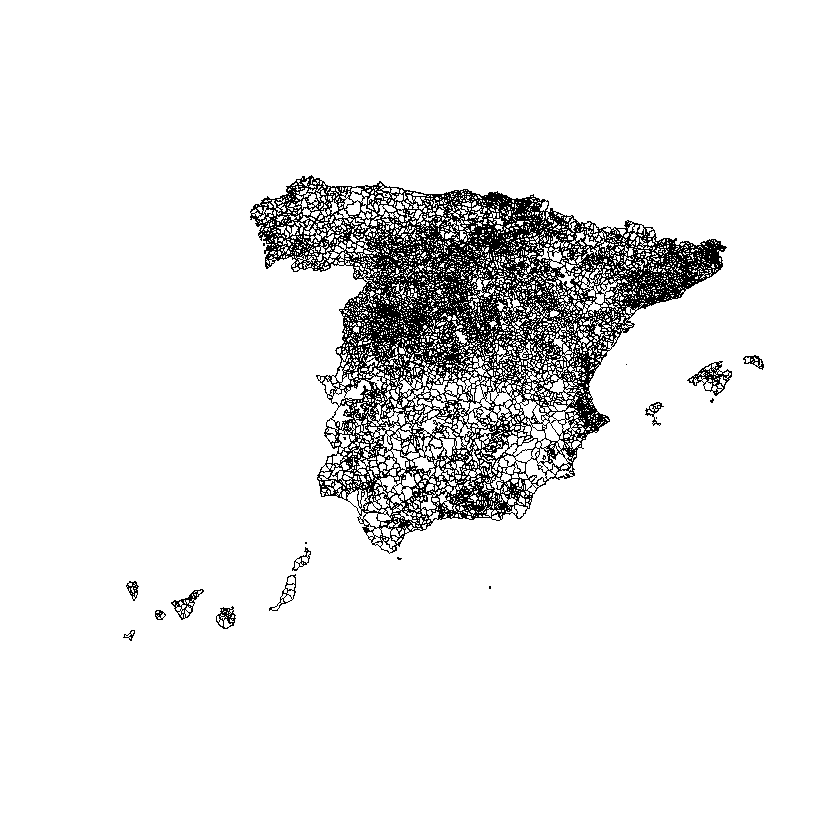

In [138]:
# Obtenemos un gráfico de la cartografia con todos los municipios (datos variable geometry)
plot(MUNIC_ESP[17])

**PRESENTACIÓN DEL DATASET**

In [139]:
# Resumen del dataset
cat('\nResumen del dataset:\n')
str(MUNIC_ESP)

# Clase
cat('\nClase del dataset:\n')
class(MUNIC_ESP)

# Dimensiones
cat('\nDimensiones del dataset:\n')
dim(MUNIC_ESP)

# Variables
cat('\nNombre de las variables del dataset:\n')
names(MUNIC_ESP)


Resumen del dataset:
Classes 'sf' and 'data.frame':	8108 obs. of  17 variables:
 $ SP_ID     : chr  "01001" "01002" "01003" "01004" ...
 $ id        : chr  "01001" "01002" "01003" "01004" ...
 $ cod_ine   : chr  "01001" "01002" "01003" "01004" ...
 $ CODINE_MU : chr  "01001" "01002" "01003" "01004" ...
 $ CCAA      : chr  "País Vasco" "País Vasco" "País Vasco" "País Vasco" ...
 $ COD_PROV  : chr  "01" "01" "01" "01" ...
 $ PROV      : chr  "Araba/Álava" "Araba/Álava" "Araba/Álava" "Araba/Álava" ...
 $ MUN       : chr  "Alegría-Dulantzi" "Amurrio" "Aramaio" "Artziniega" ...
 $ POB_2016  : num  2856 10260 1502 1840 234 ...
 $ POB_HO    : num  1467 5095 792 911 121 ...
 $ POB_MU    : num  1389 5165 710 929 113 ...
 $ PARO_TO   : num  195.8 856.2 28.6 114.6 13.9 ...
 $ POB16_64  : num  1937 6836 967 1225 167 ...
 $ TASA_PARO : num  0.1011 0.1252 0.0296 0.0935 0.0833 ...
 $ RENTPCAP07: num  21457 22205 16978 19711 15554 ...
 $ PrecioIn16: num  1553 1666 1253 1477 1165 ...
 $ geometry  :sfc

[1] "sf"         "data.frame"


Dimensiones del dataset:


[1] 8108   17


Nombre de las variables del dataset:


[1] "SP_ID"      "id"         "cod_ine"    "CODINE_MU"  "CCAA"      
 [6] "COD_PROV"   "PROV"       "MUN"        "POB_2016"   "POB_HO"    
[11] "POB_MU"     "PARO_TO"    "POB16_64"   "TASA_PARO"  "RENTPCAP07"
[16] "PrecioIn16" "geometry"

In [140]:
# Revisamos si existen valores NA
nrow(na.omit(MUNIC_ESP))

[1] 8108

**INTERPRETACIÓN DE RESULTADOS** Presentación del dataset `MUNIC_ESP`:

- El dataset está estructurado en un objeto ``'sf''data.frame'``. Este tipo de objeto combina datos tabulares y espaciales, lo que lo hace ideal para análisis y visualización de datos geográficos.
  
- El dataset registra información de los 8108 municipios de España y algunas variables socioeconómicas.
  
- El dataset tiene un total de $8108$ observaciones (municipios) y $17$ variables. Resumen de las variables:
  
    - `SP_ID`, `id`, `cod_ine` y `CODINE_MU` (valores tipo cadena de caracteres): codificación interna del INE para los municipios de España.
    
    -  `CCAA` (valores tipo cadena de caracteres): nombre de la comunidad autónoma.
    
    - `COD_PROV` (valores tipo cadena de caracteres): codificación interna del INE para las provincias de España.
    
    - `PROV` (valores tipo cadena de caracteres): nombre de la provincia.
    
    - `MUN` (valores tipo cadena de caracteres): nombre del municipio.
    
    - `POB_2016` (valores numéricos tipo enteros): población total del municipio en 2016.
    
    - `POB_HO` (valores numéricos tipo enteros): número de hombres del municipio en 2016.
    
    - `POB_MU` (valores numéricos tipo enteros): número de mujeres del municipio en 2016.
    
    - `PARO_TO` (valores numéricos tipo flotantes): número de personas en paro del municipio en 2016.
    
    - `POB16_64` (valores numéricos tipo enteros): población entre 16 y 64 años del municipio en 2016.
    
    - `TASA_PARO` (valores numéricos tipo flotantes): tasa de paro del municipio en 2016.
    
    - `RENTPCAP07` (valores numéricos tipo flotantes): renta percápita del municipio en 2016.
    
    - `PrecioIn16` (valores numéricos tipo flotantes): precio del metro cuadrado del municipio en 2016.
    
    - `geometry` (objetos tipo MULTIPOLYGON): contiene los datos geográficos en formato vectorial.

      
- El dataset NO contiene valores NA.

**ANÁLISIS EXPLORATORIO DEL DATASET**

In [141]:
# Resumen del dataset
summary(MUNIC_ESP)

    SP_ID                id              cod_ine           CODINE_MU        
 Length:8108        Length:8108        Length:8108        Length:8108       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     CCAA             COD_PROV             PROV               MUN           
 Length:8108        Length:8108        Length:8108        Length:8108       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [142]:
# Desviaciones estándar de las columnas numéricas
vector_sd = c(POB_2016 = sd(MUNIC_ESP$POB_2016),
              POB_HO = sd(MUNIC_ESP$POB_HO),
              POB_MU = sd(MUNIC_ESP$POB_MU),
              PARO_TO = sd(MUNIC_ESP$PARO_TO),
              POB16_64 = sd(MUNIC_ESP$POB16_64),
              TASA_PARO = sd(MUNIC_ESP$TASA_PARO),
              RENTPCAP07 = sd(MUNIC_ESP$RENTPCAP07),
              PrecioIn16 = sd(MUNIC_ESP$PrecioIn16)
             )
vector_sd

POB_2016       POB_HO       POB_MU      PARO_TO     POB16_64    TASA_PARO 
4.645489e+04 2.188405e+04 2.457849e+04 3.649427e+03 3.058322e+04 5.572849e-02 
  RENTPCAP07   PrecioIn16 
5.253491e+03 3.704611e+02

In [143]:
# Coeficientes de asimetría de las columnas numéricas
vector_skewness = c(POB_2016 = skewness(MUNIC_ESP$POB_2016),
              POB_HO = skewness(MUNIC_ESP$POB_HO),
              POB_MU = skewness(MUNIC_ESP$POB_MU),
              PARO_TO = skewness(MUNIC_ESP$PARO_TO),
              POB16_64 = skewness(MUNIC_ESP$POB16_64),
              TASA_PARO = skewness(MUNIC_ESP$TASA_PARO),
              RENTPCAP07 = skewness(MUNIC_ESP$RENTPCAP07),
              PrecioIn16 = skewness(MUNIC_ESP$PrecioIn16)
             )
vector_skewness

POB_2016     POB_HO     POB_MU    PARO_TO   POB16_64  TASA_PARO RENTPCAP07 
46.2313057 44.9507340 47.3665342 33.8005409 45.4246347  0.6226817  1.3005660 
PrecioIn16 
 1.4531501

In [144]:
# Coeficientes de curtosis
vector_skewness = c(POB_2016 = kurtosis(MUNIC_ESP$POB_2016),
              POB_HO = kurtosis(MUNIC_ESP$POB_HO),
              POB_MU = kurtosis(MUNIC_ESP$POB_MU),
              PARO_TO = kurtosis(MUNIC_ESP$PARO_TO),
              POB16_64 = kurtosis(MUNIC_ESP$POB16_64),
              TASA_PARO = kurtosis(MUNIC_ESP$TASA_PARO),
              RENTPCAP07 = kurtosis(MUNIC_ESP$RENTPCAP07),
              PrecioIn16 = kurtosis(MUNIC_ESP$PrecioIn16)
             )
vector_skewness

POB_2016       POB_HO       POB_MU      PARO_TO     POB16_64    TASA_PARO 
2840.1254214 2711.8785373 2955.2145135 1704.9150302 2763.0066677    0.9823961 
  RENTPCAP07   PrecioIn16 
   1.9319718    2.8729185

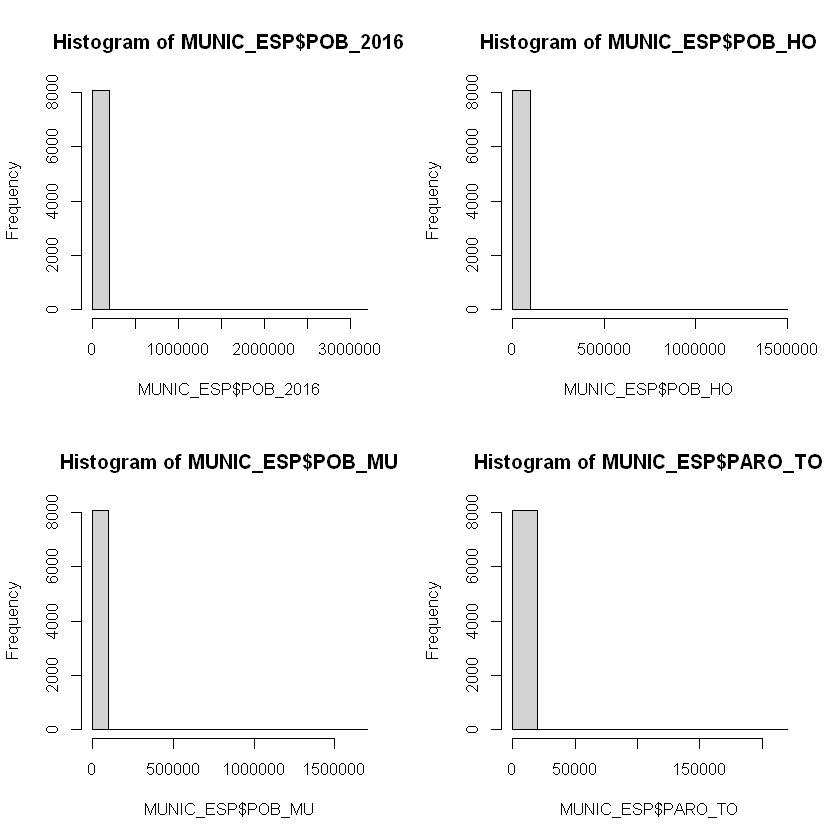

In [145]:
# ANÁLISIS GRÁFICO
# Creamos histogramas para las variables numéricas

# Ajustamos el layout
par(mfrow=c(2,2))  # c(filas, columnas)

# Realizamos los histogramas  y diagramas de caja para cada variable numérica
hist(MUNIC_ESP$POB_2016)
hist(MUNIC_ESP$POB_HO)
hist(MUNIC_ESP$POB_MU)
hist(MUNIC_ESP$PARO_TO)
                    
# Reset del layout 
par(mfrow=c(1,1))

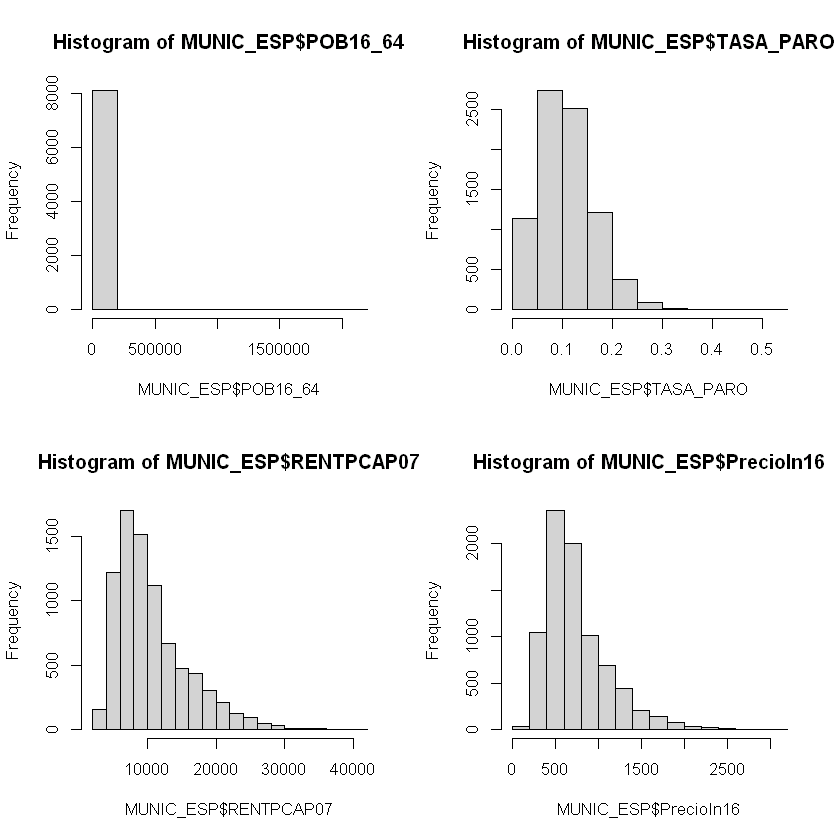

In [146]:
# ANÁLISIS GRÁFICO
# Creamos histogramas para las variables numéricas

# Ajustamos el layout
par(mfrow=c(2,2))  # c(filas, columnas)

# Realizamos los histogramas  y diagramas de caja para cada variable numérica
hist(MUNIC_ESP$POB16_64)
hist(MUNIC_ESP$TASA_PARO)
hist(MUNIC_ESP$RENTPCAP07)
hist(MUNIC_ESP$PrecioIn16)
                    
# Reset del layout 
par(mfrow=c(1,1))

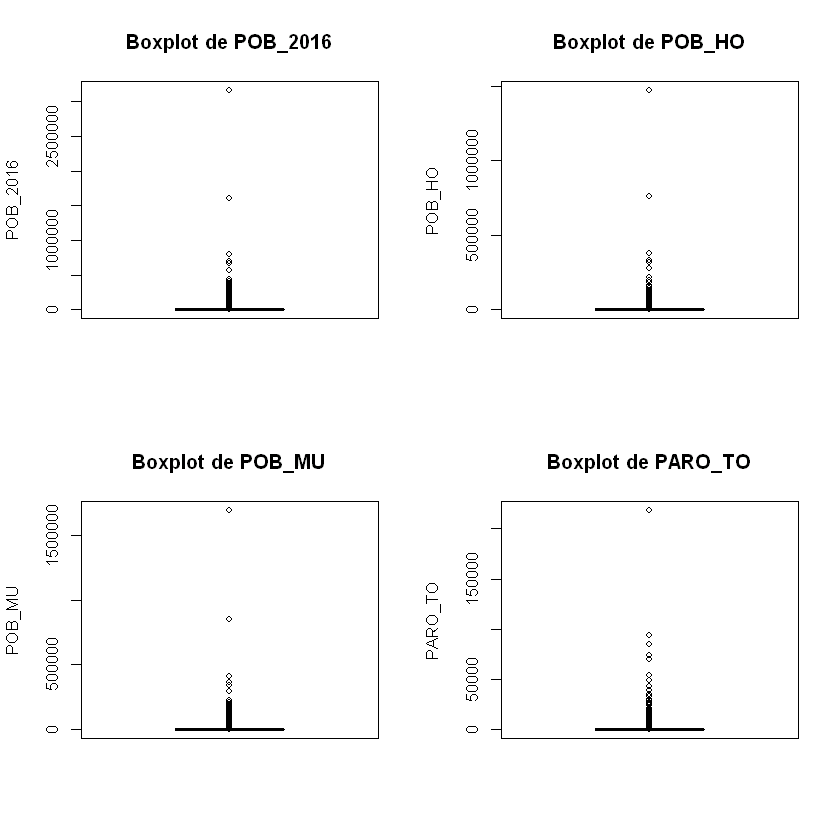

In [147]:
# ANÁLISIS GRÁFICO
# Creamos diagramas de caja para las variables numéricas

# Ajustamos el layout
par(mfrow=c(2,2))  # c(filas, columnas)

# Realizamos los histogramas  y diagramas de caja para cada variable numérica
boxplot(MUNIC_ESP$POB_2016, main = "Boxplot de POB_2016", ylab = "POB_2016")
boxplot(MUNIC_ESP$POB_HO, main = "Boxplot de POB_HO", ylab = "POB_HO")
boxplot(MUNIC_ESP$POB_MU, main = "Boxplot de POB_MU", ylab = "POB_MU")
boxplot(MUNIC_ESP$PARO_TO, main = "Boxplot de PARO_TO", ylab = "PARO_TO")
                    
# Reset del layout 
par(mfrow=c(1,1))

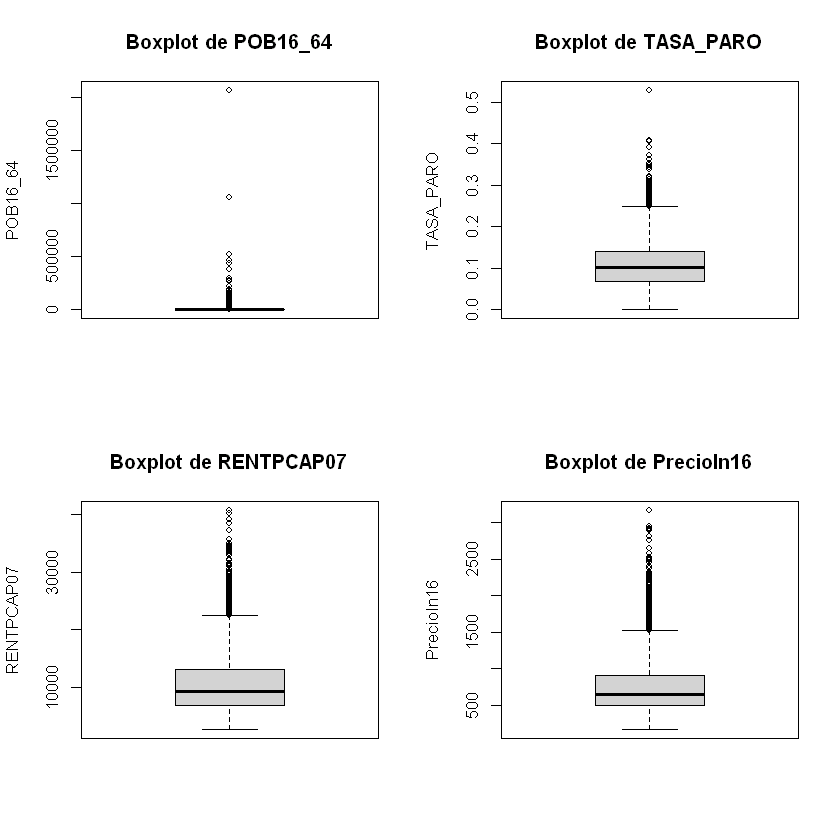

In [148]:
# ANÁLISIS GRÁFICO
# Creamos diagramas de caja para las variables numéricas

# Ajustamos el layout
par(mfrow=c(2,2))  # c(filas, columnas)

# Realizamos los histogramas  y diagramas de caja para cada variable numérica
boxplot(MUNIC_ESP$POB16_64, main = "Boxplot de POB16_64", ylab = "POB16_64")
boxplot(MUNIC_ESP$TASA_PARO, main = "Boxplot de TASA_PARO", ylab = "TASA_PARO")
boxplot(MUNIC_ESP$RENTPCAP07, main = "Boxplot de RENTPCAP07", ylab = "RENTPCAP07")
boxplot(MUNIC_ESP$PrecioIn16, main = "Boxplot de PrecioIn16", ylab = "PrecioIn16")
                    
# Reset del layout 
par(mfrow=c(1,1))

In [149]:
# Contamos el número de valores atípicos en cada variable numérica

# Función para contar valores atípicos en un vector
contarAtipicos = function(vector) {
    
    # Calcular Q1, Q3 y IQR
    Q1 = quantile(vector, 0.25, na.rm = TRUE)
    Q3 = quantile(vector, 0.75, na.rm = TRUE)
    IQR = Q3 - Q1
    
    # Definir los límites para los valores atípicos
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Contar valores fuera de los límites
    atipicos = sum(vector < limite_inferior | vector > limite_superior, na.rm = TRUE)
    
    return(atipicos)
}

vector_atipicos = c(POB_2016 = contarAtipicos(MUNIC_ESP$POB_2016),
              POB_HO = contarAtipicos(MUNIC_ESP$POB_HO),
              POB_MU = contarAtipicos(MUNIC_ESP$POB_MU),
              PARO_TO = contarAtipicos(MUNIC_ESP$PARO_TO),
              POB16_64 = contarAtipicos(MUNIC_ESP$POB16_64),
              TASA_PARO = contarAtipicos(MUNIC_ESP$TASA_PARO),
              RENTPCAP07 = contarAtipicos(MUNIC_ESP$RENTPCAP07),
              PrecioIn16 = contarAtipicos(MUNIC_ESP$PrecioIn16)
             )
vector_atipicos

POB_2016     POB_HO     POB_MU    PARO_TO   POB16_64  TASA_PARO RENTPCAP07 
      1159       1158       1165       1193       1179        115        296 
PrecioIn16 
       351

**INTERPRETACIÓN DE LOS RESULTADOS** Interpretación del análisis exploratorio:

- `POB_2016`, `POB_HO`, `POB_MU` y `POB16_64` (variables relacionadas con la población):

    - Las medias de estas cuatro variables son muy superiores que sus respectivas medianas. Esto significa que la mayoría de los municipios son pequeños pero existen algunos municipios muy grandes que elevan los valores de las medias. El 75% de los municipios tienen menos de 3,000 habitantes lo que afirma de nuevo que la mayoría de los municipios son pequeños.
    
    - La distribución de hombres y mujeres por municipio está equilibrada, sugiriendo paridad de género en términos generales.
    
    - Variabilidad alta en todas estas variables, lo que confirma la gran dispersión de los tamaños poblacionales entre los municipios, con muchos municipios pequeños y unos pocos muy grandes.

- `PARO_TO` y `TASA_PARO` (variables relacionadas con el desempleo):

    - Tasa de paro media de 10.79% y mediana de 10.23%. El valor de la media es ligeramente superior al de la mediana, sugiriendo una leve asimetría positiva (coef. de asimetría $g_1=0.6$).
    
    - Desviación estándar de 5.6%. La dispersión en la tasa de paro entre los distintos municipios es baja, estando la mayoróa de ellos aproximadamente entre el 5% y 15%. Sin embargo, se observa que algunos municipios alcanzan situaciones extremas de hasta el 52.9%.
    
    - Presencia de 115 municipios con tasas de paro anormalmente altas (outliers).
    
- `RENTPCAP07` (variable renta percápita):

    - Rango entre 2,587€ y 40,790€ lo que refleja una importante disparidad económica entre municipios.
    
    - Renta media de 10,607€ y mediana 9,288€. La distribución de renta per cápita presenta una asimetría positiva con coeficiente de asimetría $g_1=1.30$. Esto sugiere que la mayoría de los municipios tienen una renta percápita en la parte baja del rango y solo alguno de ellos en la parte alta.
    
    - La desviación estándar de 7,253€ indica una dispersión significativa, lo que reafirma las desigualdades entre municipios.
    
    - Presencia de 296 municipios con rentas percápita anormalmente altas (outliers). 

- `PrecioIn16` (variable precio del metro cuadrado):

    - Rango entre 155€/m2 y 3,168€/m2 lo que refleja una importante disparidad económica entre municipios.

    - Precio medio de 745.9€/m2 y mediana de 652.5€/m2. La distribución de renta per cápita presenta una asimetría positiva con coeficiente de asimetría $g_1=1.45$. Esto sugiere que la mayoría de los municipios tienen una renta percápita en la parte baja del rango y solo alguno de ellos en la parte alta. Analizando los cuartiles, se observa como el 75% de los municipios tienen precios de m2 inferiores a 907€/m2.
  
    - La desviación estándar de 370.5€/m2 indica una dispersión significativa, lo que reafirma las desigualdades entre municipios.
    
    - Presencia de 351 municipios con precio del metro cuadrdado anormalmente alto (outliers).  

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

**MAPAS DESCRIPTIVOS**

In [150]:
#==============================================#
# 3 Realizar los mapas descriptivos ----
#==============================================#
# Mapas Descriptivos de las variables numéricas
# Gráficos que nos ayudan a obtener evidencias gráficas de una posible DISTRIBUCION ESPACIAL
# Para ver las paletas de colores https://www.r-graph-gallery.com/38-rcolorbrewers-palettes.html

# Si hemos trabajado antes en mode = View, hay que cambiar el modo para que obtengamos la imagen estática
#tmap_mode("plot")

In [151]:
# Mostramos los nombres de las variables del dataset
names(MUNIC_ESP)

[1] "SP_ID"      "id"         "cod_ine"    "CODINE_MU"  "CCAA"      
 [6] "COD_PROV"   "PROV"       "MUN"        "POB_2016"   "POB_HO"    
[11] "POB_MU"     "PARO_TO"    "POB16_64"   "TASA_PARO"  "RENTPCAP07"
[16] "PrecioIn16" "geometry"

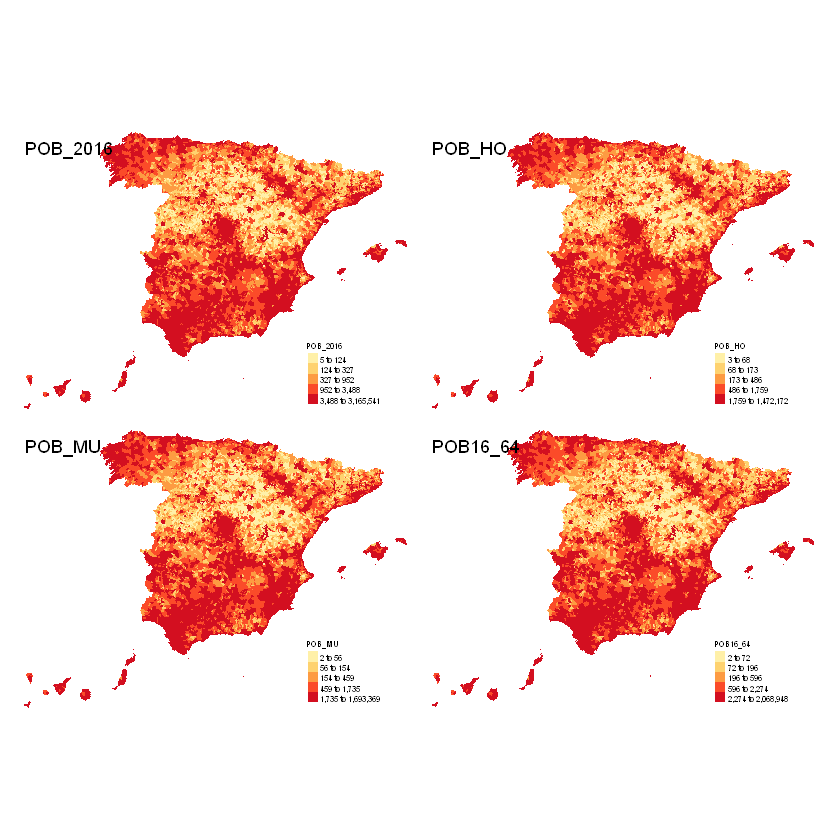

In [152]:
# Distribución espacial de las variables relacionadas con la población
tm_shape(MUNIC_ESP) +
  tm_fill(palette =c("YlOrRd"),col = c("POB_2016","POB_HO", "POB_MU", "POB16_64"),style = "quantile")+
  tm_facets(sync = TRUE, ncol = 2, nrow = 2)+
  tmap_options(check.and.fix = TRUE)+
  tm_layout(frame = FALSE,
            title = c("POB_2016","POB_HO", "POB_MU", "POB16_64"),
            legend.title.size = .7,
            legend.text.size =0.6,
            legend.position = c("right","bottom"),
            legend.bg.color = "white",
            legend.bg.alpha = 1,
            legend.stack = "horizontal",
            legend.width = 1.5,
            legend.height = 1.5)

**INTERPRETACIÓN DE RESULTADOS** En la imagen de arriba se representa el gráfico de coropletas de las 4 variables del dataset relacionadas con la población (``POB_2016``, ``POB_HO``, ``POB_MU`` y ``POB16_64``). El gráfico de coropletas representa espacialmente el valor de cada una de las variables, con color amarillo pastel los valores más bajos y color rojo los valores más altos.

La distribución espacial de las 4 variables relacionadas con la población es muy similar entre ellas, sugiriendo que las 4 variables están correlacionadas entre sí. Se observa como la población total, de hombres, de mujeres y activa es superior en el sur respecto al norte de España. Además, se observan poblaciones grandes en las islas (Canarias y Baleares). <u>Para evitar problemas de multicolinealidad en nuestro modelo de regresión espacial, se tomará únicamente la variable `POB16_64` como variable independiente</u>.

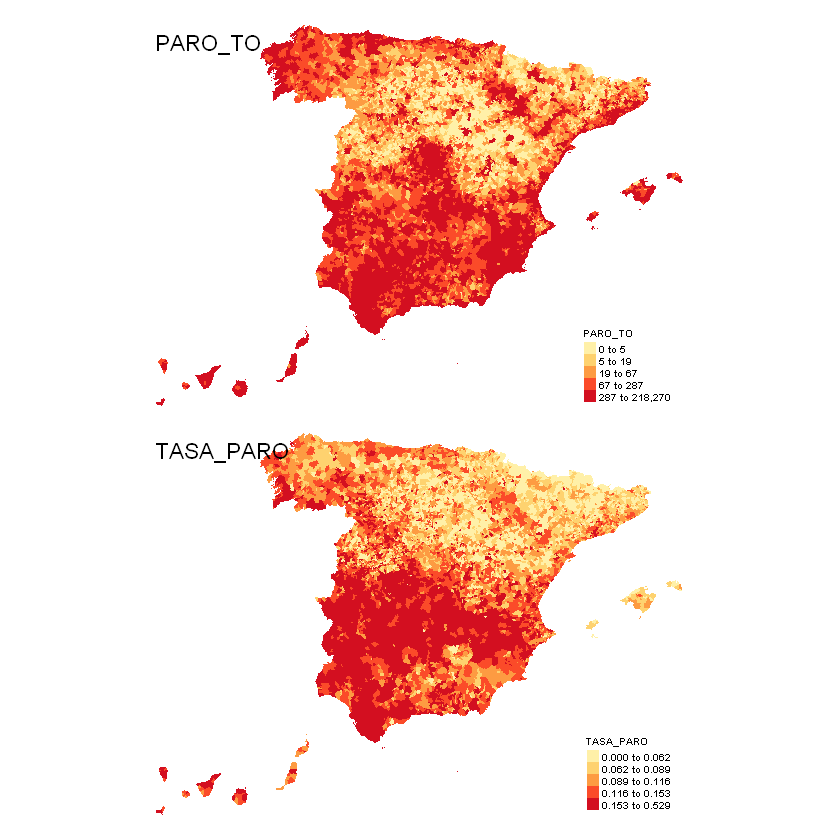

In [153]:
# Distribución espacial de las variables relacionadas con el desempleo
tm_shape(MUNIC_ESP) +
  tm_fill(palette =c("YlOrRd"),col = c("PARO_TO","TASA_PARO"),style = "quantile")+
  tm_facets(sync = TRUE, ncol = 1, nrow = 2)+
  tmap_options(check.and.fix = TRUE)+
  tm_layout(frame = FALSE,
            title = c("PARO_TO","TASA_PARO"),
            legend.title.size = .7,
            legend.text.size =0.6,
            legend.position = c("right","bottom"),
            legend.bg.color = "white",
            legend.bg.alpha = 1,
            legend.stack = "horizontal",
            legend.width = 1.5,
            legend.height = 1.5)

**INTERPRETACIÓN DE RESULTADOS** En la imagen de arriba se representa el gráfico de coropletas de las 2 variables del dataset relacionadas con el desempleo (``PARO_TO`` y ``TASA_PARO``). El gráfico de coropletas representa espacialmente el valor de cada una de las variables, con color amarillo pastel los valores más bajos y color rojo los valores más altos.

La distribución espacial de las 2 variables relacionadas con el desempleo es muy similar entre ellas, sugiriendo que las 2 variables están correlacionadas entre sí. Se observa como el paro total y la tasa de paro es superior en el sur respecto al norte de España. <u>Se tomará la variable ``TASA_PARO`` como variable dependiente del modelo de regresión espacial</u>. La variable ``PARO_TO`` no se tendrá en cuenta ya que es la representación de la tasa de paro en términos absolutos.

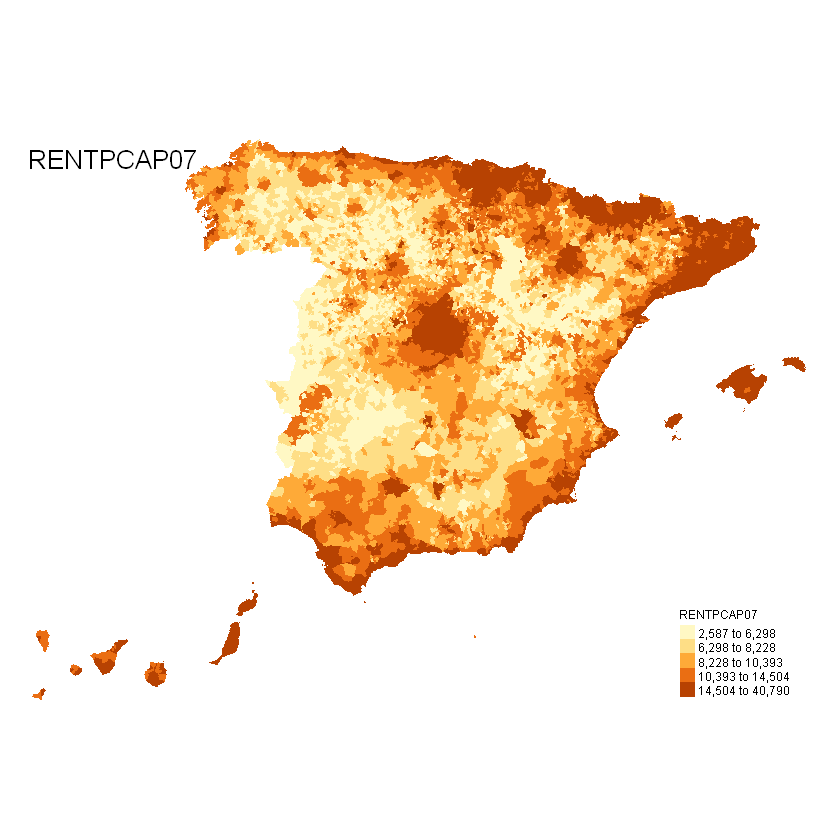

In [154]:
# Distribución espacial de la variable renta percápita
tm_shape(MUNIC_ESP) +
  tm_fill(palette ="YlOrBr",col = "RENTPCAP07",style = "quantile")+
  tmap_options(check.and.fix = TRUE)+
  tm_layout(frame = FALSE,
            title = "RENTPCAP07",
            legend.title.size = .7,
            legend.text.size =0.6,
            legend.position = c("right","bottom"),
            legend.bg.color = "white",
            legend.bg.alpha = 1,
            legend.stack = "horizontal",
            legend.width = 1.5,
            legend.height = 1.5)

**INTERPRETACIÓN DE RESULTADOS** En la imagen de arriba se representa el gráfico de coropletas de la variable `RENTPCAP07`. El gráfico de coropletas representa espacialmente los valores de renta percápita de cada municipio de España, con color amarillo pastel los valores más bajos y color rojo los valores más altos.

La distribución espacial de la variable parece seguir un patrón, siendo las zonas costeras, las islas Canarias y Baleares junto a la capital Madrid, las zonas con mayor renta percápita. Por contra, la zona interior de la península es la que presenta menores niveles de renta.

Tomaremos `RENTPCAP07` como variable independiente del modelo de regresión espacial múltiple.

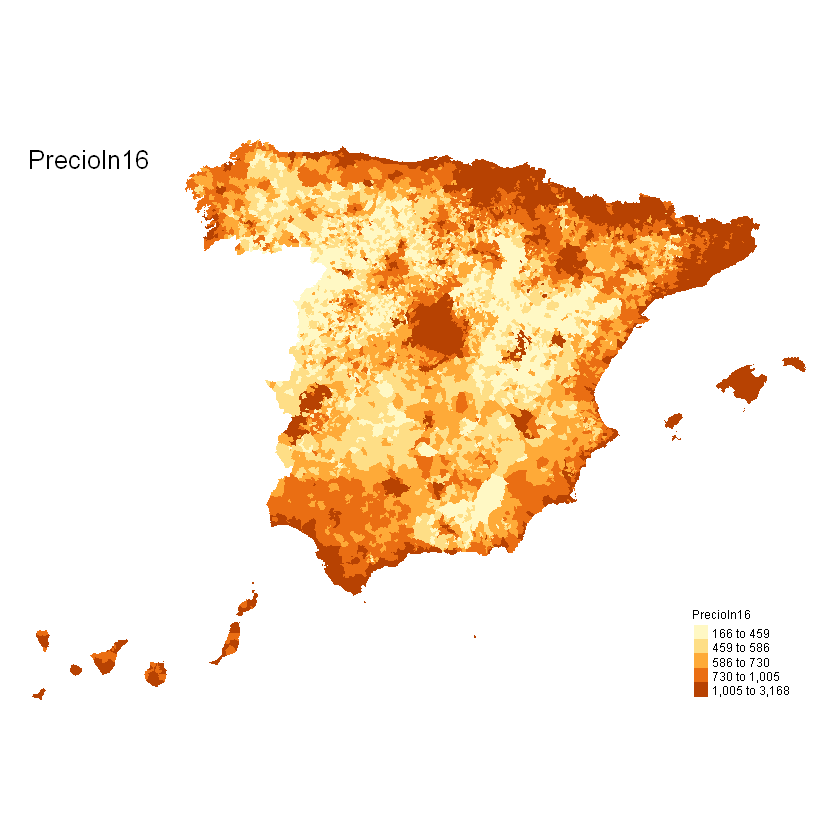

In [155]:
# Distribución espacial de la variable precio metro cuadrado
tm_shape(MUNIC_ESP) +
  tm_fill(palette ="YlOrBr",col = "PrecioIn16",style = "quantile")+
  tmap_options(check.and.fix = TRUE)+
  tm_layout(frame = FALSE,
            title = "PrecioIn16",
            legend.title.size = .7,
            legend.text.size =0.6,
            legend.position = c("right","bottom"),
            legend.bg.color = "white",
            legend.bg.alpha = 1,
            legend.stack = "horizontal",
            legend.width = 1.5,
            legend.height = 1.5)

**INTERPRETACIÓN DE RESULTADOS** En la imagen de arriba se representa el gráfico de coropletas de la variable `PrecioIn16`. El gráfico de coropletas representa espacialmente los valores del precio del metro cuadrado de cada municipio de España, con color amarillo pastel los valores más bajos y color rojo los valores más altos.

La distribución espacial del precio del metro cuadrado sigue el mismo patrón que el de renta percápita, siendo las zonas costeras, islas y la capital del país las zonas con precios más altos. Por lo tanto, esto nos sugiere la existencia de correlación entre el precio del metro cuadrado y la renta per cápita del municipio. Seguramente este efecto se deba a que aquellos municipios con mayores rentas percápita, atraigan a más personas aumentando la demanda de vivienda y consecuentemente, incrementando el precio del metro cuadrado. Para evitar problemas de multicolinealidad, no se considerará la variable `PrecioIn16` en el modelo de regresión espacial múltiple.

En resumen, nuestro modelo de regresión inicial estará formado por las siguientes variables:

- Variable dependiente:

    -  `TASA_PARO`

- Variables independientes o explicativas:

    - `POB_2016`
    
    - `RENTPCAP07`

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

**MATRIZ DE PESOS ESPACIALES**

**Criterio 1: Contigüidad de la reina**

Paso 1 - crear la LISTA de vecinos (objeto nb)

In [156]:
#==============================================#
# 4 Estimar la matriz de pesos espaciales ----
#==============================================#
# Caso 1: Contiguidad de la reina (criterio más común)
#_____________________________________________________#
# Paso 1 - crear la LISTA de vecinos (objeto nb)
# poly2nb: La funcion crea una lista de vecinos basada en regiones con limites contiguos, 
# que comparten uno o más puntos de limites.
list.queen = spdep::poly2nb(MUNIC_ESP, queen=TRUE)

Warning message in spdep::poly2nb(MUNIC_ESP, queen = TRUE):
"some observations have no neighbours;
if this seems unexpected, try increasing the snap argument."
Warning message in spdep::poly2nb(MUNIC_ESP, queen = TRUE):
"neighbour object has 19 sub-graphs;
if this sub-graph count seems unexpected, try increasing the snap argument."


In [157]:
# Visualizamos la matriz con la información de los vecinos cercanos
View(list.queen)

Neighbour list object:
Number of regions: 8108 
Number of nonzero links: 48358 
Percentage nonzero weights: 0.07355985 
Average number of links: 5.964233 
8 regions with no links:
817, 2537, 5327, 7062, 7161, 7230, 8107, 8108
19 disjoint connected subgraphs

**INTERPRETACIÓN DE RESULTADOS** El listado de vecinos mediante el criterio de contingüidad de la reina indica que de media, cada municipio tiene 6 vecinos. por otro lado, existen 8 municipios sin vecinos.

In [158]:
# Clase de la lista de vecinos (listas que describen los vecinos de cada entidad espacial)
class(list.queen)

[1] "nb"

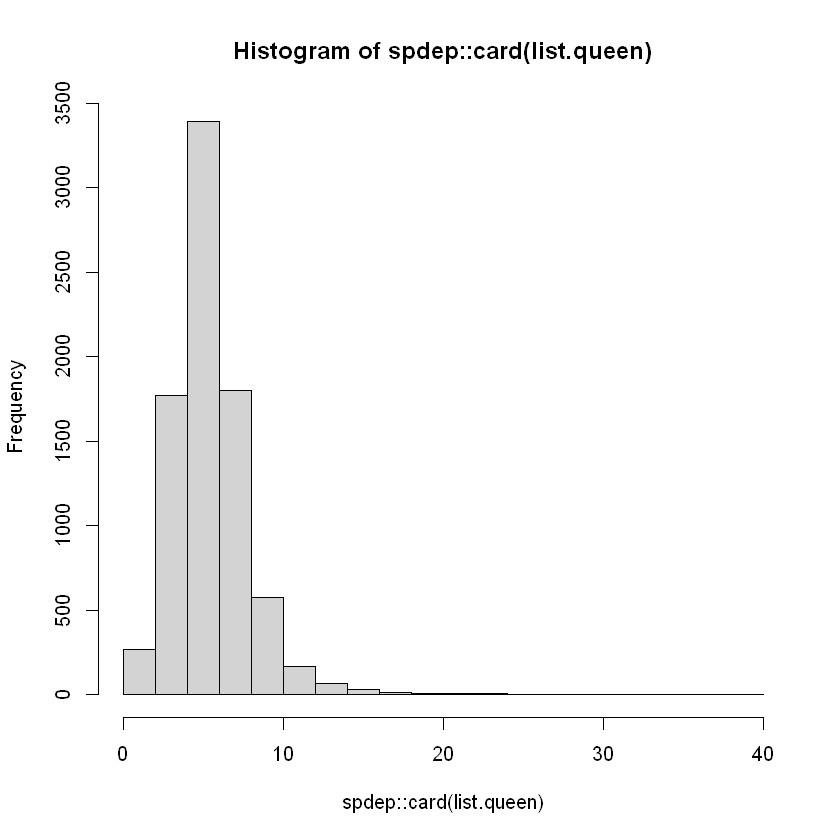

In [159]:
# Histograma del número de vecinos
hist(spdep::card(list.queen)) 

In [160]:
# Análisis descriptivo de la matriz con la información de los vecinos cercanos
summary(spdep::card(list.queen))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   4.000   6.000   5.964   7.000  39.000 

**INTERPRETATACIÓN DE RESULTADOS** En el histograma de arriba se representa la frecuencia de número de vecinos de los distintos municipios de España. Podemos observar como la mayoría de los municipios tienen entre 4 a 7 vecinos, siendo 6 el número de vecinos más repetido entre los municipios.

Paso 2 - Asignar PESOS a los vecinos (objeto listw)

In [161]:
#_____________________________________________________#
# Paso 2 - Asignar PESOS a los vecinos (objeto listw)
# nb2listw: Crea una lista de vecindad con pesos
# zero.policy=TRUE... la función deja las filas de la matriz como cero para cualquier región con vecinos cero 
# style = W: filas estandarizadas (esta es la que vamos a utilizar para construir el operador retardo espacial) 
peso.w.queen = spdep::nb2listw(list.queen, style="W", zero.policy=TRUE)

In [162]:
# Clase de la matriz de pesos
class(peso.w.queen)

[1] "listw" "nb"

In [163]:
# Visualizamos la matriz de pesos
View(peso.w.queen)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 8108 
Number of nonzero links: 48358 
Percentage nonzero weights: 0.07355985 
Average number of links: 5.964233 
8 regions with no links:
817, 2537, 5327, 7062, 7161, 7230, 8107, 8108
19 disjoint connected subgraphs

Weights style: W 
Weights constants summary:
     n       nn   S0       S1       S2
W 8100 65610000 8100 2935.875 34653.07

**INTERPRETACIÓN DE RESULTADOS** En la variable `peso.w.queen` se ha almacenado la lista de vecinos con pesos espaciales basada en los vecinos definidos en ``list.queen``. Se ha empleado el estilo de estandarización `W`, lo que significa que los valores en cada fila de la matriz de ponderación sumarán 1. Esto asegura que los pesos sean proporcionales y comparables entre diferentes filas.

Paso 3 - Crear la matriz de pesos W a partir de la lista de vecinos y los pesos

In [164]:
#_____________________________________________________#
# Paso 3 - Crear la matriz de pesos W a partir de la lista de vecinos y los pesos
matrix.w.queen = spdep::listw2mat(peso.w.queen)

In [165]:
# Clase de la matriz de contiguidad W
class(matrix.w.queen)

[1] "matrix" "array"

In [166]:
# Dimensiones de la matriz de contiguidad W
dim(matrix.w.queen)

[1] 8108 8108

**INTERPRETACIÓN DE RESULTADOS** Con la función `listw2mat` se crea la matriz de pesos W a partir del listado de vecinos con pesos `peso.w.queen`.

**Criterio 1: K-vecinos cercanos**

Paso 1 - crear la LISTA de vecinos (objeto nb)

In [167]:
#_____________________________________________________#
# Caso 2: Contiguidad de distancias - k-vecinos más cercanos
#_____________________________________________________#
# Paso 1 - crear la LISTA de vecinos (objeto nb)

# Extraemos los puntos de los polígonos de cada uno de los municipios
coords = sf::st_centroid(sf::st_geometry(MUNIC_ESP[17]$geometry), of_largest_polygon=TRUE)

In [168]:
# Cada municipio tiene 4 vecinos lo fijamos nosotros para que seleccione los municipios vecinos con esa condición
# Bajo este criterio, las relaciones de vecindad NO SON SIMÉTRICAS (si tú eres mi vecino, yo puedo NO ser el tuyo)
col.knn = spdep::knearneigh(coords, k=4) 

In [169]:
# Clase de la lista de vecinos
class(col.knn)  # Este objeto no es tipo nb

[1] "knn"

In [170]:
# Estructura de la lista de vecinos
str(col.knn)

List of 5
 $ nn       : int [1:8108, 1:4] 10 8 3159 8 11 10 39 2 18 1 ...
 $ np       : int 8108
 $ k        : num 4
 $ dimension: int 2
 $ x        : num [1:8108, 1:2] -2.5 -2.96 -2.59 -3.14 -2.87 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "X" "Y"
 - attr(*, "class")= chr "knn"
 - attr(*, "call")= language spdep::knearneigh(x = coords, k = 4)


In [171]:
# Transformación en un objeto tipo nb
list.knn4 = spdep::knn2nb(col.knn) 

Warning message in spdep::knn2nb(col.knn):
"neighbour object has 9 sub-graphs"


In [172]:
# Clase de la lista de vecinos
class(list.knn4)  # Este objeto ya si es tipo nb

[1] "nb"

In [173]:
# Visualizamos la lista de vecinos
View(list.knn4)

Neighbour list object:
Number of regions: 8108 
Number of nonzero links: 32432 
Percentage nonzero weights: 0.04933399 
Average number of links: 4 
9 disjoint connected subgraphs
Non-symmetric neighbours list

In [174]:
# Resumen del numero de vecinos
summary(spdep::card(list.knn4))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      4       4       4       4       4       4 

**INTERPRETATACIÓN DE RESULTADOS** Esta vez, el listado de vecinos se ha creado mediante el criterio de K-vecinos cercanos, estableciendo como criterio que el número de vecinos de cada municipio sea de 4.

Paso 2 - Asignar PESOS a los vecinos (objeto listw)

In [175]:
#_____________________________________________________#
# Paso 2 - Asignar PESOS a los vecinos (objeto listw)
# nb2listw: Crea una lista de vecindad con pesos
# zero.policy=TRUE... la función deja las filas de la matriz como cero para cualquier región con vecinos cero 
# style = B: codificación binaria básica (0 si no es vecino y 1 si lo es)
peso.w.knn4 = spdep::nb2listw(list.knn4, style="B", zero.policy=TRUE)

In [176]:
# Clase de la matriz de pesos
class(peso.w.knn4)

[1] "listw" "nb"

**INTERPRETACIÓN DE RESULTADOS** En la variable `peso.w.knn4` se ha almacenado la lista de vecinos con pesos espaciales basada en los vecinos definidos en ``list.knn4``. Se ha empleado el estilo de estandarización `B`, donde la relación entre entidades se codifica como 1 (vecino) o 0 (no vecino). No hay estandarización ni ajustes, es simplemente una matriz binaria de conectividad.

Paso 3 - Crea la matriz de pesos W a partir de la lista de vecinos y los pesos

In [177]:
#_____________________________________________________#
# Paso 3 - Crea la matriz de pesos W a partir de la lista de vecinos y los pesos
matrix.w.knn4 = spdep::listw2mat(peso.w.knn4)

In [178]:
# Clase de la matriz de contiguidad W
class(matrix.w.knn4)

[1] "matrix" "array"

In [179]:
# Dimensiones de la matriz de contiguidad W
dim(matrix.w.knn4)

[1] 8108 8108

**INTERPRETACIÓN DE RESULTADOS** Con la función `listw2mat` se crea la matriz de pesos W a partir del listado de vecinos con pesos `peso.w.knn4`.

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

**CONSTRUCCIÓN DE RETARDOS ESPACIALES**

Paso 1 - Construimos el retardo de Wy (variable dependiente)

In [180]:
#==============================================#
# 5 Construir las variables retardadas espacialmente Wy & WX ----
#==============================================#
# Paso 1 - Construimos el retardo de Wy (variable dependiente: tasa_paro)
wy = matrix.w.queen%*%MUNIC_ESP$TASA_PARO

In [181]:
# Visualizamos los valores de la variable retardada espacialmente
head(wy)

1,0.05972160
2,0.07802270
3,0.07996100
4,0.09053153
5,0.07719490
6,0.07005176


In [182]:
# Obtenemos sus dimensiones (vector)
dim(wy)

[1] 8108    1

In [183]:
# Incluimos Wy como una nueva variable en la tabla de datos que llamamos TASA_PAROW
MUNIC_ESP$TASA_PAROW = wy[,1]  # Spatial Lag: Wy

In [184]:
# Visualizamos la nueva variable
View(head(MUNIC_ESP))

,SP_ID,id,cod_ine,CODINE_MU,CCAA,COD_PROV,PROV,MUN,POB_2016,POB_HO,POB_MU,PARO_TO,POB16_64,TASA_PARO,RENTPCAP07,PrecioIn16,geometry,TASA_PAROW
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>,<dbl>
1,01001,01001,01001,01001,País Vasco,01,Araba/Álava,Alegría-Dulantzi,2856,1467,1389,195.83,1937,0.1010996,21456.95,1552.83,MULTIPOLYGON (((-2.530627 4...,0.05972160
2,01002,01002,01002,01002,País Vasco,01,Araba/Álava,Amurrio,10260,5095,5165,856.16,6836,0.1252428,22205.09,1665.67,MULTIPOLYGON (((-3.037591 4...,0.07802270
3,01003,01003,01003,01003,País Vasco,01,Araba/Álava,Aramaio,1502,792,710,28.58,967,0.0295553,16977.71,1252.81,MULTIPOLYGON (((-2.55876 43...,0.07996100
4,01004,01004,01004,01004,País Vasco,01,Araba/Álava,Artziniega,1840,911,929,114.58,1225,0.0935347,19710.68,1476.80,MULTIPOLYGON (((-3.147123 4...,0.09053153
5,01006,01006,01006,01006,País Vasco,01,Araba/Álava,Armiñón,234,121,113,13.91,167,0.0832934,15554.47,1165.40,MULTIPOLYGON (((-2.842932 4...,0.07719490
6,01008,01008,01008,01008,País Vasco,01,Araba/Álava,Arratzua-Ubarrundia,979,531,448,39.33,697,0.0564275,24179.93,1757.80,MULTIPOLYGON (((-2.582719 4...,0.07005176


Paso 2 - Análisis exploratorio de y + retardo espacial Wy

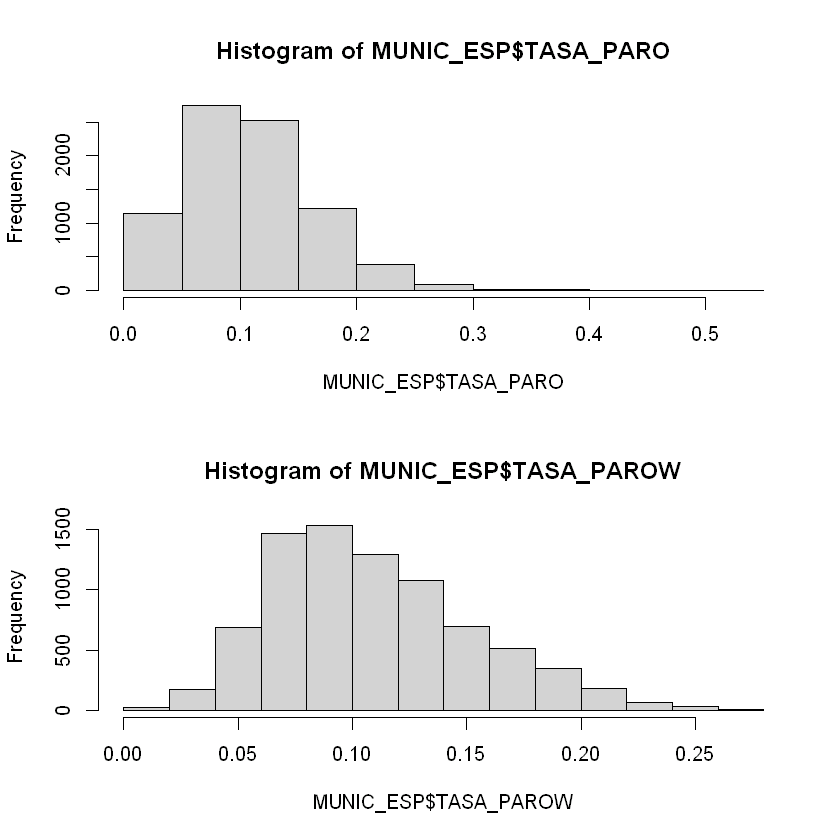

In [185]:
#_____________________________________________________#
# Paso 2 - Análisis exploratorio de y + retardo espacial Wy
# Representacion grafica de y e Wy (Histograma)
par(mfrow=c(2,1))
hist(MUNIC_ESP$TASA_PARO)
hist(MUNIC_ESP$TASA_PAROW)
par(mfrow=c(1,1))

**INTERPRETACIÓN DE RESULTADOS** En los histogramas de arriba se representa la variable `TASA_PARO` y su correspondiente retardo espacial `TASA_PAROW`. Se observa como los valores de tasa de paro obtenidos en el retardo espacial son inferiores en comparación con los valores sin retardo. Posiblemente esto se deba a que el efecto de valores outliers con tasas de paro anormalmente altas disminuya al aplicar el correspondiente retardo espacial.

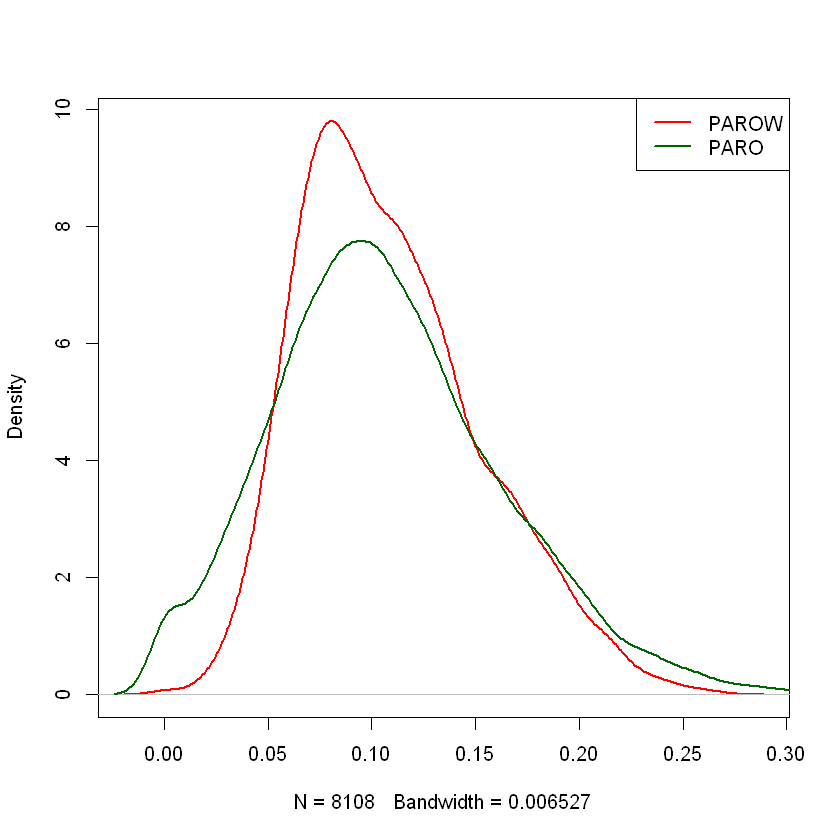

In [186]:
# Representacion grafica de y e Wy (Gráfico de densidad)
plot(density(MUNIC_ESP$TASA_PAROW), col="red", lwd=2, main="")
lines(density(MUNIC_ESP$TASA_PARO), col="darkgreen", lwd=2)
legend("topright",col=c("red","darkgreen"),legend = c("PAROW","PARO"), lty=1,lwd=2)

**INTERPRETACIÓN DE RESULTADOS** En la anterior gráfica se compara la curva de densidad de la variable `TASA_PARO` (curva verde) y su correspondiente retardo espacial `TASA_PAROW` (curva roja). En esta gráfica, podemos observar de forma más clara la evidencia vista en los histogramas. Se observa como al aplicar el retardo espacial, la distribución de tasa de paro en los distintos municipios se "homogeniza". Es decir, se concentran más valores en torno a la media de la distribución y se reducen los casos extremos de tasas de paro, tanto casos anormalmente altos como bajos.

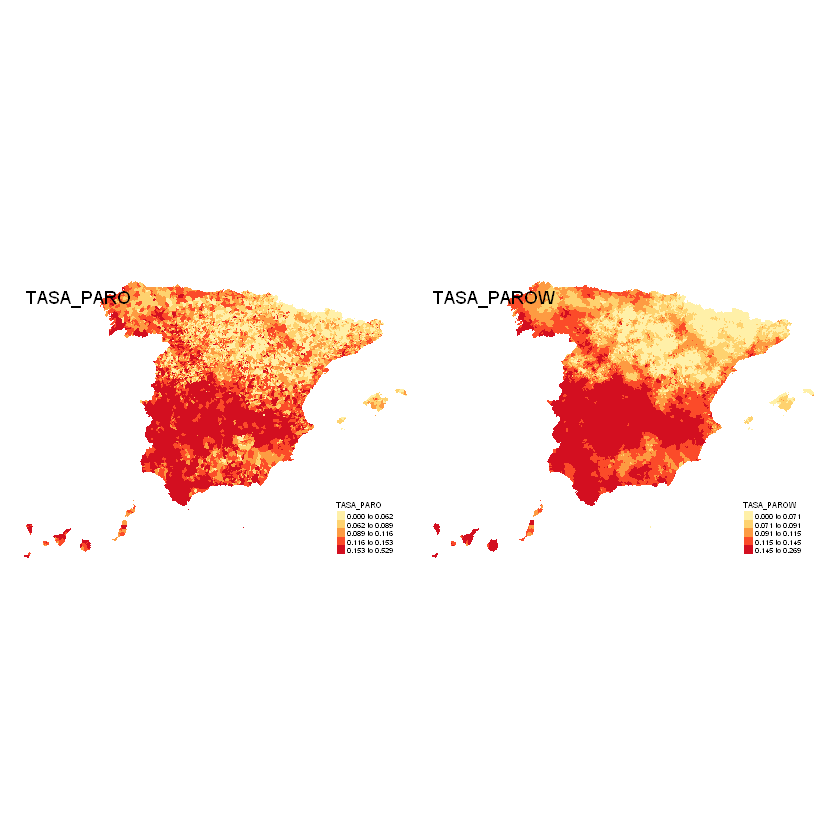

In [187]:
# Representación gráfica de y e Wy (Distribución espacial)
tm_shape(MUNIC_ESP) +
  tm_fill(palette =c("YlOrRd"),col = c("TASA_PARO","TASA_PAROW"),style = "quantile")+
  tm_facets(sync = TRUE, ncol = 2)+
  tmap_options(check.and.fix = TRUE)+
  tm_layout(frame = FALSE,
            title = c("TASA_PARO","TASA_PAROW"),
            legend.title.size = .7,
            legend.text.size =0.5,
            legend.position = c("right","bottom"),
            legend.bg.color = "white",
            legend.bg.alpha = 1,
            legend.stack = "horizontal",
            legend.width = 1,
            legend.height = 1)

**INTERPRETACIÓN DE RESULTADOS** En la anterior imagen se representa los mapas de coropletas de la variable `TASA_PARO` (mano izquierda) y su correspondiente retardo espacial `TASA_PAROW` (mano derecha). Tal como ya se había observado en el gráfico de curvas de densidad, en el mapa de coropletas se observa como el retardo espacial "homogeniza" la tasa de paro entre municipios vecinos.

Paso 3 - Construimos el retardo de WX (variables independientes)

In [188]:
#_____________________________________________________#
# Paso 3 - Construimos el retardo de WX (variable independientes)
wx_POB16_64 = matrix.w.queen%*%MUNIC_ESP$POB16_64
wx_rentapercap = matrix.w.queen%*%MUNIC_ESP$RENTPCAP07

In [189]:
# Obtenemos sus dimensiones (vector)
dim(wx_POB16_64)
dim(wx_rentapercap)

[1] 8108    1

[1] 8108    1

In [190]:
# Incluimos WX ccomo una nueva variable en la tabla de datos
MUNIC_ESP$POB16_64W = wx_POB16_64[,1]  # Spatial Lag: WX
MUNIC_ESP$RENTPCAP07W = wx_rentapercap[,1]  # Spatial Lag: WX

In [191]:
# Visualizamos las nuevas variables
View(head(MUNIC_ESP))

,SP_ID,id,cod_ine,CODINE_MU,CCAA,COD_PROV,PROV,MUN,POB_2016,POB_HO,POB_MU,PARO_TO,POB16_64,TASA_PARO,RENTPCAP07,PrecioIn16,geometry,TASA_PAROW,POB16_64W,RENTPCAP07W
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [°]>,<dbl>,<dbl>,<dbl>
1,01001,01001,01001,01001,País Vasco,01,Araba/Álava,Alegría-Dulantzi,2856,1467,1389,195.83,1937,0.1010996,21456.95,1552.83,MULTIPOLYGON (((-2.530627 4...,0.05972160,435.6667,15739.76
2,01002,01002,01002,01002,País Vasco,01,Araba/Álava,Amurrio,10260,5095,5165,856.16,6836,0.1252428,22205.09,1665.67,MULTIPOLYGON (((-3.037591 4...,0.07802270,1141.8750,16850.43
3,01003,01003,01003,01003,País Vasco,01,Araba/Álava,Aramaio,1502,792,710,28.58,967,0.0295553,16977.71,1252.81,MULTIPOLYGON (((-2.55876 43...,0.07996100,3762.1111,23773.21
4,01004,01004,01004,01004,País Vasco,01,Araba/Álava,Artziniega,1840,911,929,114.58,1225,0.0935347,19710.68,1476.80,MULTIPOLYGON (((-3.147123 4...,0.09053153,1836.0000,18906.15
5,01006,01006,01006,01006,País Vasco,01,Araba/Álava,Armiñón,234,121,113,13.91,167,0.0832934,15554.47,1165.40,MULTIPOLYGON (((-2.842932 4...,0.07719490,717.6667,16468.82
6,01008,01008,01008,01008,País Vasco,01,Araba/Álava,Arratzua-Ubarrundia,979,531,448,39.33,697,0.0564275,24179.93,1757.80,MULTIPOLYGON (((-2.582719 4...,0.07005176,32712.4000,23035.57


Paso 4 - Análisis exploratorio de X's + retardo espacial WX's

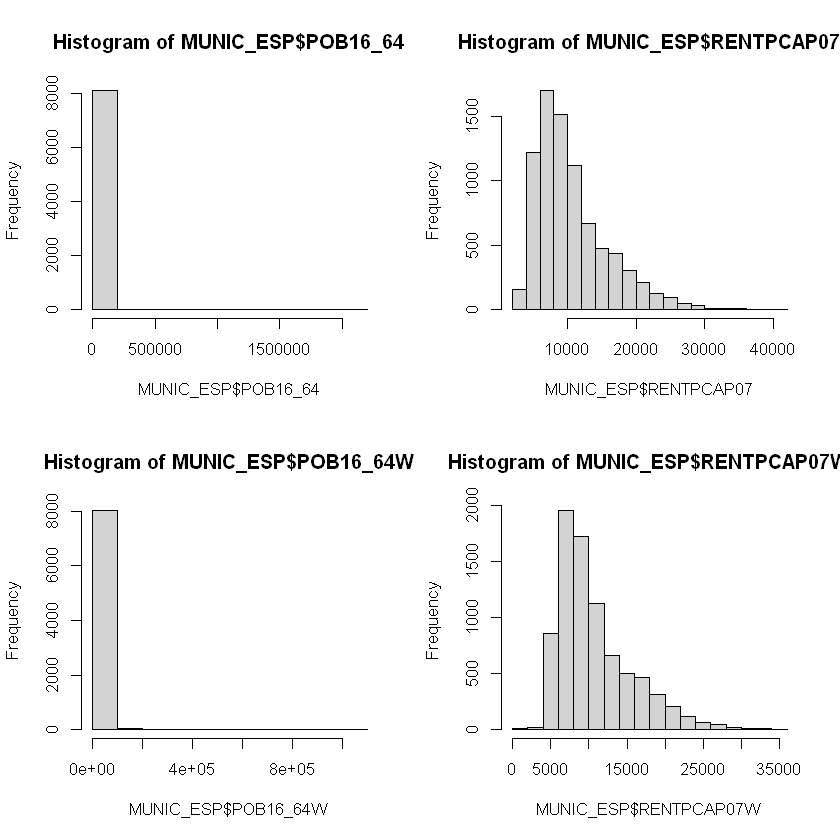

In [192]:
#_____________________________________________________#
# Paso 4 - Análisis exploratorio de X + retardo espacial WX
# Representacion grafica de X e WX (Histograma)
par(mfrow=c(2,2))
hist(MUNIC_ESP$POB16_64)
hist(MUNIC_ESP$RENTPCAP07)
hist(MUNIC_ESP$POB16_64W)
hist(MUNIC_ESP$RENTPCAP07W)
par(mfrow=c(1,1))

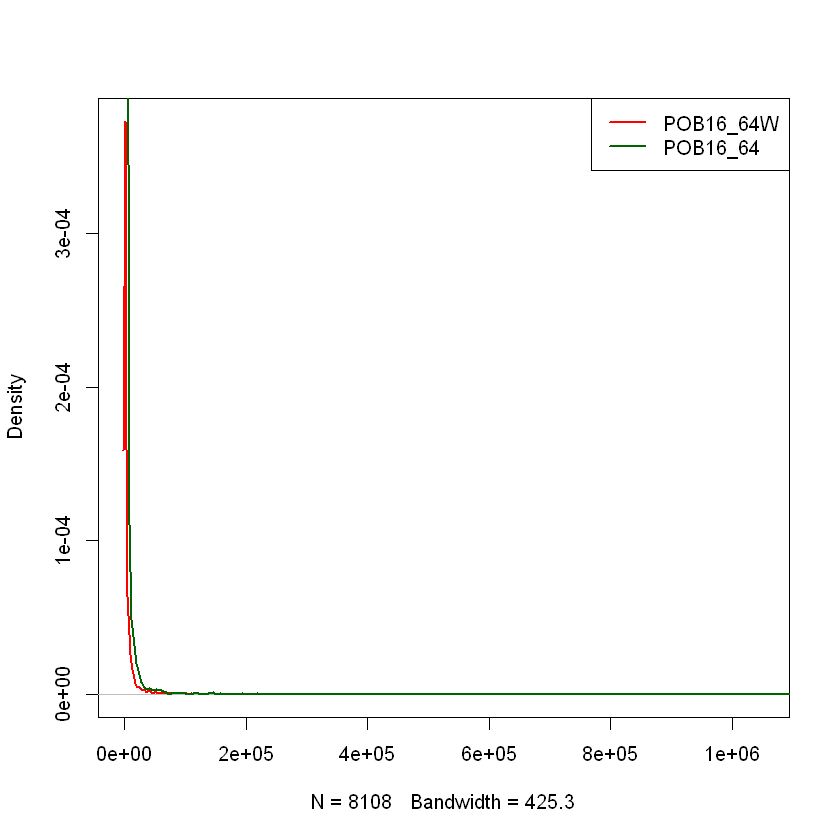

In [193]:
# Representacion grafica de X e WX (Gráfico de densidad)
plot(density(MUNIC_ESP$POB16_64W), col="red", lwd=2, main="")
lines(density(MUNIC_ESP$POB16_64), col="darkgreen", lwd=2)
legend("topright",col=c("red","darkgreen"),legend = c("POB16_64W","POB16_64"), lty=1,lwd=2)

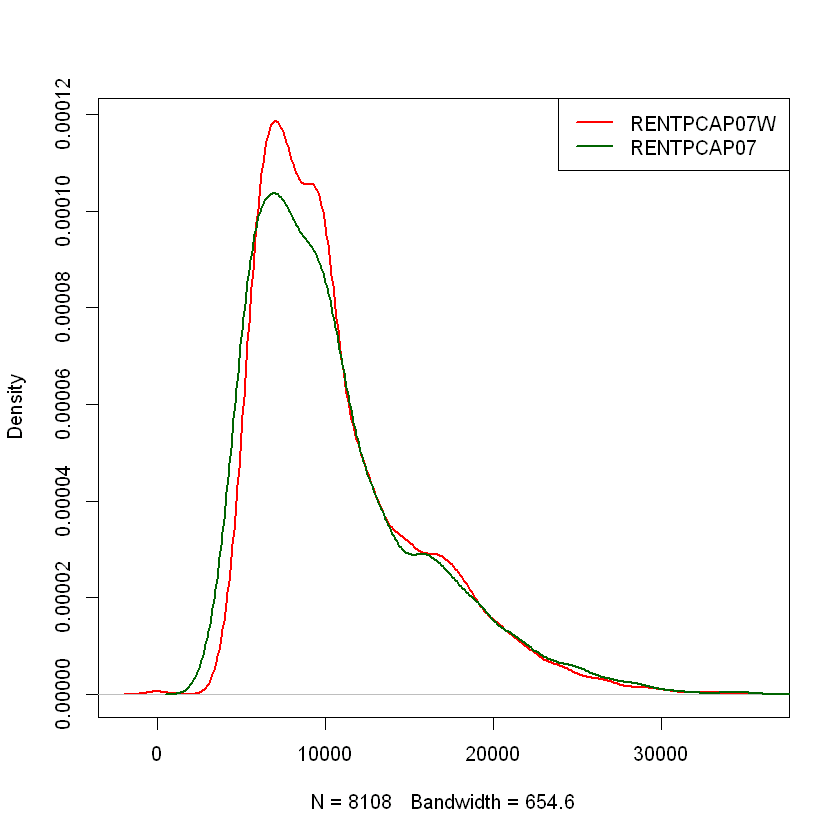

In [194]:
# Representacion grafica de X e WX (Gráfico de densidad)
plot(density(MUNIC_ESP$RENTPCAP07W), col="red", lwd=2, main="")
lines(density(MUNIC_ESP$RENTPCAP07), col="darkgreen", lwd=2)
legend("topright",col=c("red","darkgreen"),legend = c("RENTPCAP07W","RENTPCAP07"), lty=1,lwd=2)

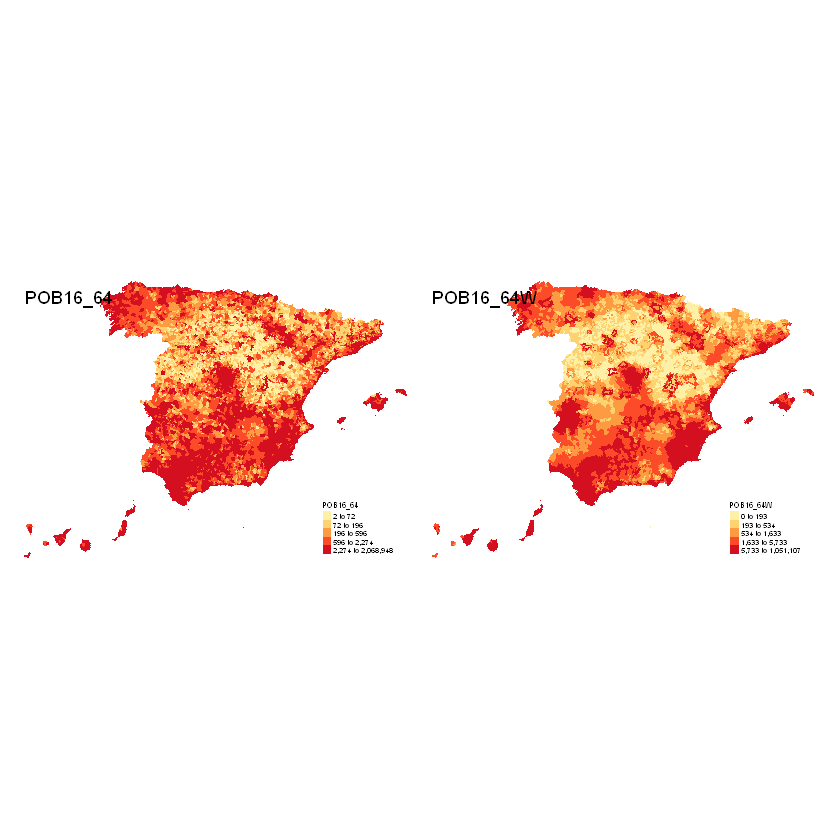

In [195]:
# Representación gráfica de X e WX (Distribucion espacial variable POB_2016)
tm_shape(MUNIC_ESP) +
  tm_fill(palette =c("YlOrRd"),col = c("POB16_64","POB16_64W"),style = "quantile")+
  tm_facets(sync = TRUE, ncol = 2)+
  tmap_options(check.and.fix = TRUE)+
  tm_layout(frame = FALSE,
            title = c("POB16_64","POB16_64W"),
            legend.title.size = .7,
            legend.text.size =0.5,
            legend.position = c("right","bottom"),
            legend.bg.color = "white",
            legend.bg.alpha = 1,
            legend.stack = "horizontal",
            legend.width = 1,
            legend.height = 1)

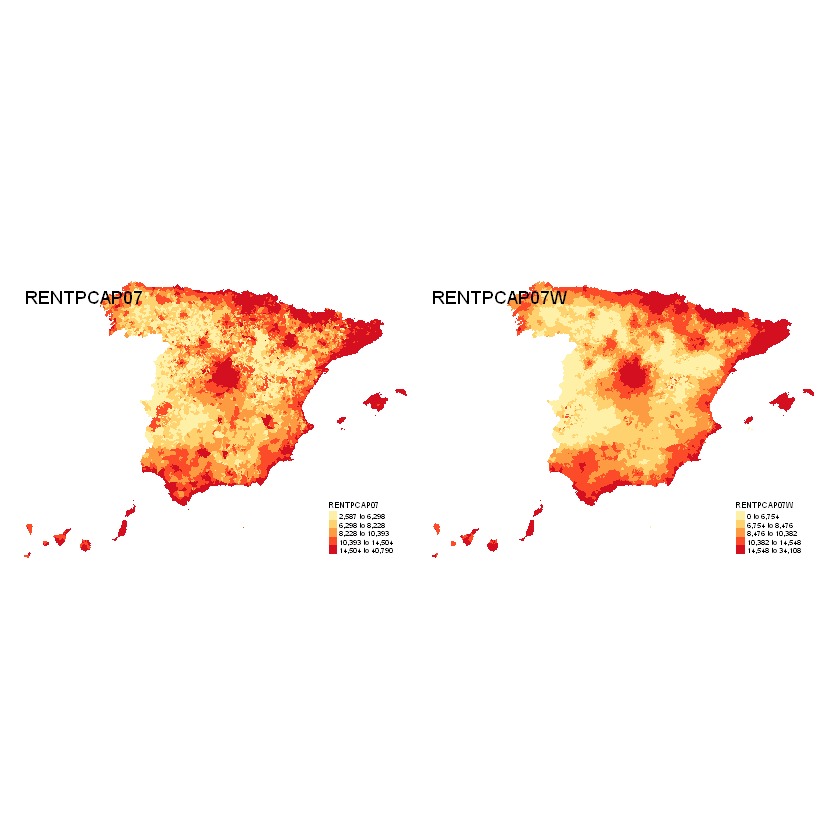

In [196]:
# Representación gráfica de X e WX (Distribucion espacial)
tm_shape(MUNIC_ESP) +
  tm_fill(palette =c("YlOrRd"),col = c("RENTPCAP07","RENTPCAP07W"),style = "quantile")+
  tm_facets(sync = TRUE, ncol = 2)+
  tmap_options(check.and.fix = TRUE)+
  tm_layout(frame = FALSE,
            title = c("RENTPCAP07","RENTPCAP07W"),
            legend.title.size = .7,
            legend.text.size =0.5,
            legend.position = c("right","bottom"),
            legend.bg.color = "white",
            legend.bg.alpha = 1,
            legend.stack = "horizontal",
            legend.width = 1,
            legend.height = 1)

**INTERPRETACIÓN DE RESULTADOS** Al igual que ocurría con la variable independiente `TASA_PARO`, se observa como al aplicar los correspondientes retardos espaciales a las variables independientes `POB16_64` y `RENTPCAP07` consideradas para el modelo, los valores de los municipios cercanos tienden a igualarse, "homgenizando" la distribución de ambas variables.

<div style="background-color:#5DADE2"><b>Apartado 6</b></div>

**ESTUDIO CORRELACIÓN ESPACIAL ENTRE VARIABLES Y SUS RETARDOS ESPACIALES**

Estudio correlación espacial en variable dependiente.

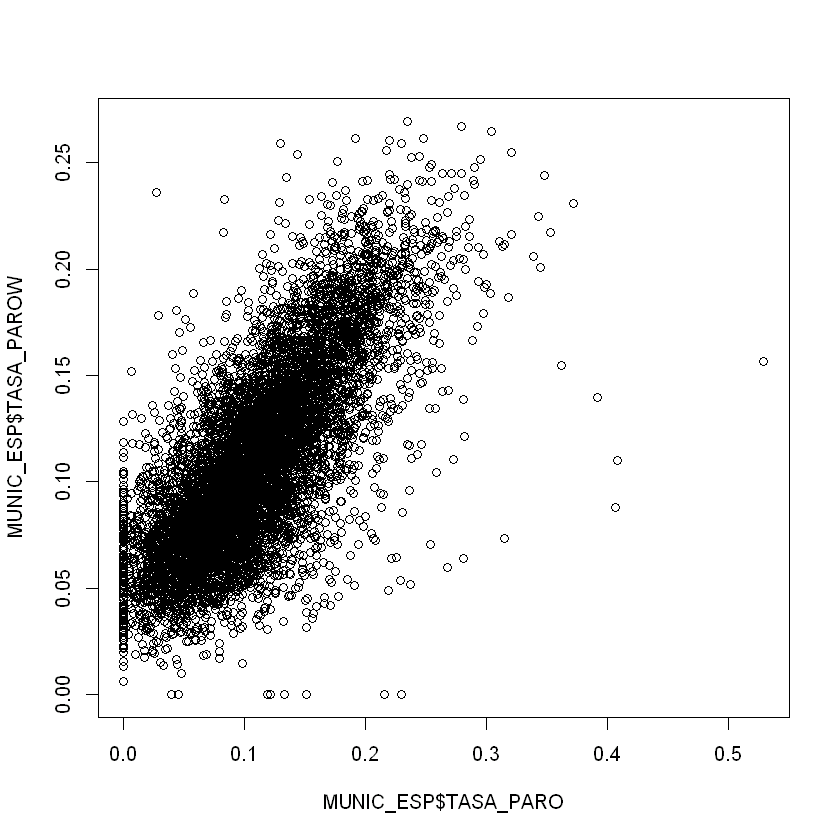

In [197]:
#==============================================#
# 6 Estudiar si existe o no correlacion espacial entre una variable y su retardo espacial ----
#==============================================#
# Hacemos un simple plot
plot(MUNIC_ESP$TASA_PAROW~MUNIC_ESP$TASA_PARO)

**INTERPRETACIÓN DE RESULTADOS** El gráfico de arriba representa el diagrama de dispersión de la variable `TASA_PARO` frente a su correspondiente retardo espacial `TASA_PAROW`. La evidencia gráfica sugiere una dependencia espacial positiva entre la tasa de paro y su correspondiente retardo espacial, es decir, los valores de tasas de paro de un municipio tienden a asemejarse a la tasa de paro de sus correspondientes municipios próximos.

In [198]:
# Coeficiente de Correlacion espacial: La I de Moran Global
# HO: NO hay correlación espacial global
moran.g = spdep::moran.test(MUNIC_ESP$TASA_PARO, peso.w.queen, zero.policy = TRUE)  
moran.g


	Moran I test under randomisation

data:  MUNIC_ESP$TASA_PARO  
weights: peso.w.queen  
n reduced by no-neighbour observations  

Moran I statistic standard deviate = 87.241, p-value < 2.2e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
     5.831975e-01     -1.234720e-04      4.470721e-05 


**INTERPRETACIÓN DE RESULTADOS** El test de Moran evalúa si los valores de una variable están espacialmente correlacionados. Puede variar entre:

- 1: Alta correlación espacial positiva (valores similares están cerca).
  
- 0: No hay correlación espacial (patrón aleatorio).
  
- -1: Alta correlación espacial negativa (valores opuestos están cerca).

El coeficiente de correlación espacial obtenido es de $0.58$. Este valor es positivo y relativamente alto, indicando correlación espacial positiva. Es decir, las áreas con tasas de paro similares tienden a estar cerca unas de otras.

Por otro lado, el p-valor obtenido en el contraste de correlación espacial es $<2.2e-16$. Dicho valor es inferior al nivel de significación del $5\%$ y consecuentemente, debemos rechazar la hipótesis nula de correlación espacial. En otras palabras, existe evidencia estadísticamente significativa de que la variable tasa de paro `TASA_PARO` está espacialmente correlacionada.

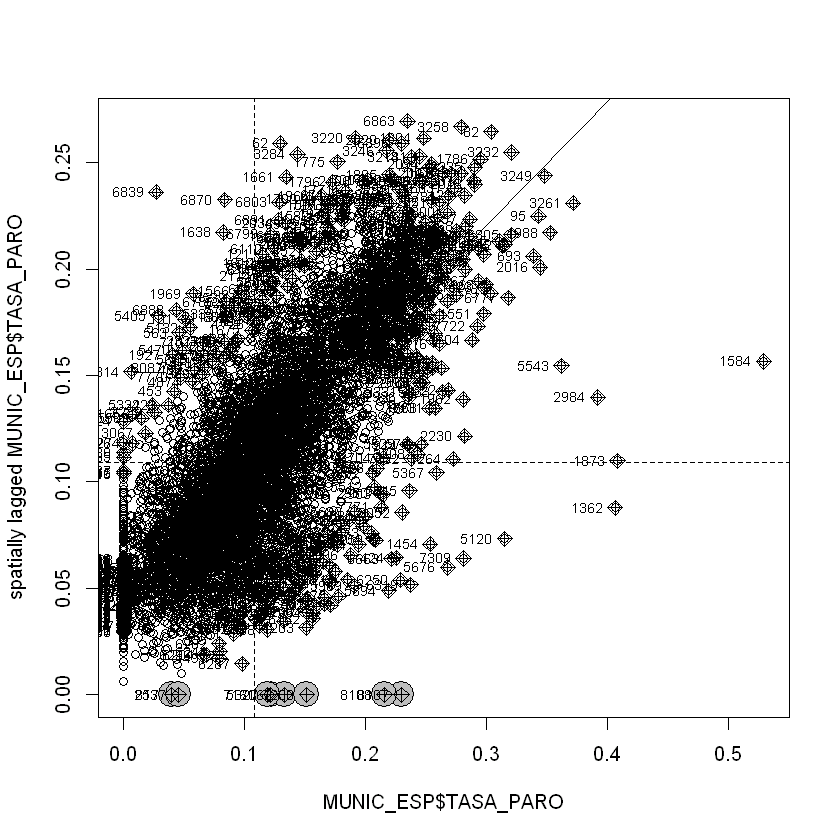

In [199]:
# Obtenemos el Scatterplot de Moran
par(mar=c(5.1, 4.1, 4.1, 2.1))
spdep::moran.plot(MUNIC_ESP$TASA_PARO,peso.w.queen,zero.policy = TRUE)

**INTERPRETACIÓN DE RESULTADOS** En el diagrama de dispersión de Moran podemos observar como los valores se concentran en el primer y tercer cuadrante, obteniendo una doble evidencia de que la tasa de paro presenta una autocorrelación espacial positiva.

In [200]:
# Coeficiente de Correlacion espacial: La I de Moran Local (calculamos la I de Moran para cada uno de los 8108 Municipios)
# HO: NO hay correlación espacial local
moran.loc = spdep::localmoran(MUNIC_ESP$TASA_PARO, peso.w.queen, zero.policy = TRUE)

In [201]:
# Visualizamos la La I de Moran Local para cada municipio
View(head(moran.loc))

,Ii,E.Ii,Var.Ii,Z.Ii,Pr(z != E(Ii))
1,0.10498814,-1.821153e-06,0.002459463,2.1170331,0.03425704
2,-0.16698112,-1.198802e-05,0.012139224,-1.5154469,0.12965926
3,0.70388147,-2.436308e-04,0.219214247,1.5038878,0.13261026
4,0.08004801,-8.163750e-06,0.022058272,0.5390252,0.58986944
5,0.24278752,-2.399408e-05,0.064830455,0.9536297,0.34027114
6,0.62651954,-1.051219e-04,0.170363691,1.5181649,0.12897282


In [202]:
#_______________________________________#
# A continuación os muestro como construir paso a paso el mapa de LISA
# Los cuadrantes (Q1 - superior derecho, Q2 - superior izquierdo, Q3 -inferior izquierdo y Q4 - inferior derecho) 
# pueden ser interpretados como:
# Q1 y Q3 - indican puntos de asociacion espacial positiva, 
# en el sentido de que una localizacion posee vecinos con valores semejantes.
# Q2 y Q4 - indican puntos de asociacion espacial negativa, 
# en el sentido de que una localizacion posee vecinos con valores distintos.
# indicando puntos de transicion entre diferentes patrones espaciales.
MUNIC_ESP$lmoran_TASA_PARO = moran.loc[,5]

In [203]:
# Variable que queremos crear
MUNIC_ESP$quad_sig_TASA_PARO = NA

In [204]:
# Mapa de las correlaciones espaciales locales y significativas
# Mapas LISA-Local Indicator of Spatial Association para la varible TASA_PARO
MUNIC_ESP$TASA_PARO_TIP = scale(MUNIC_ESP$TASA_PARO)

In [205]:
# Mapas LISA-Local Indicator of Spatial Association para la varible TASA_PAROW
MUNIC_ESP$TASA_PAROW_TIP = scale(MUNIC_ESP$TASA_PAROW)

In [206]:
# Construimos las 4 posibles categorias significativas y la posible categoria NO significativa
# high-high quadrant
MUNIC_ESP$quad_sig_TASA_PARO[(MUNIC_ESP$TASA_PARO_TIP >= 0 & MUNIC_ESP$TASA_PAROW_TIP >= 0 & 
                                 MUNIC_ESP$lmoran_TASA_PARO <= 0.05)] <- "high-high" # que sean significativos (p-valor de la I Moran local < 5%)
# low-low quadrant
MUNIC_ESP$quad_sig_TASA_PARO[(MUNIC_ESP$TASA_PARO_TIP <= 0 & 
                                 MUNIC_ESP$TASA_PAROW_TIP <= 0 & 
                                 MUNIC_ESP$lmoran_TASA_PARO <= 0.05)] <- "low-low"

# high-low quadrant
MUNIC_ESP$quad_sig_TASA_PARO[(MUNIC_ESP$TASA_PARO_TIP >= 0 & 
                                 MUNIC_ESP$TASA_PAROW_TIP <= 0 & 
                                 MUNIC_ESP$lmoran_TASA_PARO <= 0.05)] <-  "high-low"

# low-high quadrant
MUNIC_ESP$quad_sig_TASA_PARO[(MUNIC_ESP$TASA_PARO_TIP <= 0 & 
                                 MUNIC_ESP$TASA_PAROW_TIP >= 0 & 
                                 MUNIC_ESP$lmoran_TASA_PARO <= 0.05)] <-  "low-high"

# non-significant observations
MUNIC_ESP$quad_sig_TASA_PARO[MUNIC_ESP$lmoran_TASA_PARO > 0.05] <-  "not signif."

In [207]:
# Transformación a factor de los valores
MUNIC_ESP$quad_sig_TASA_PARO <- as.factor(MUNIC_ESP$quad_sig_TASA_PARO)

Warning message in title(...):
""add" es un parámetro gráfico inválido"


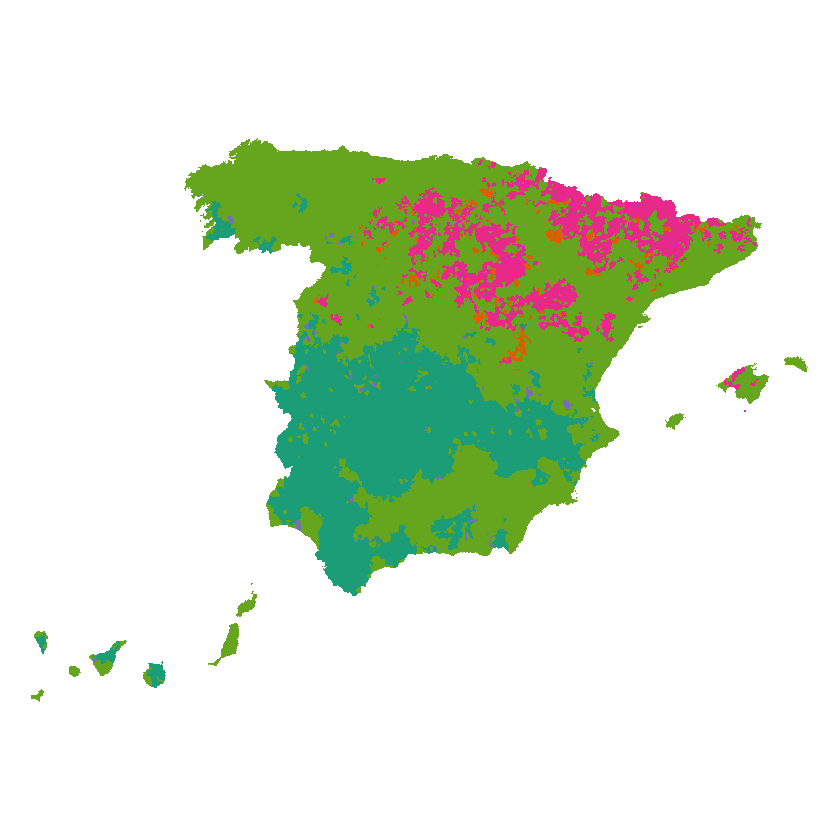

In [208]:
# Finalmente construimos el mapa LISA calculando la I de Moran Local para ver donde existe dependencia espacial SIGNIFICATIVA
nombrevbles = "quad_sig_TASA_PARO"
par(mar=c(0,0,0,0))
palette(RColorBrewer::brewer.pal(n = length(levels(eval(parse(text=paste("MUNIC_ESP$",noquote(nombrevbles),sep=""))))), name = "Dark2"))
plot(MUNIC_ESP[17],col = eval(parse(text=paste("MUNIC_ESP$",noquote(nombrevbles),sep=""))),
     lty=1, border=NA,lwd=0.25, add=F,  axes=F, pch = 19)
par(mar=c(2,2,2,2))

In [209]:
# Tabla de frecuencias absolutas de la I de Moran Local
table(MUNIC_ESP$quad_sig_TASA_PARO)

# Mapeo de colores
setNames(RColorBrewer::brewer.pal(n = 5, name = "Dark2"), sort(levels(MUNIC_ESP$quad_sig_TASA_PARO)))


  high-high    high-low    low-high     low-low not signif. 
       1226         106          45         956        5767 

high-high    high-low    low-high     low-low not signif. 
  "#1B9E77"   "#D95F02"   "#7570B3"   "#E7298A"   "#66A61E"

Código de colores:

- <p style="color: #1B9E77;">Verde Oscuro #1B9E77: high-high (municipios cuyas tasas de paro son elevadas cuyos vecinos tambien tienen tasas de paro altas).</p>

- <p style="color: #D95F02;">Marrón #D95F02: high-low (municipios cuyas tasas de paro son elevadas cuyos vecinos tienen tasas de paro bajas).</p>

- <p style="color: #7570B3;">Morado #7570B3: low-high (municipios cuyas tasas de paro son bajas cuyos vecinos tienen tasas de paro altas).</p>

- <p style="color: #E7298A;">Rosa #E7298A: low-low (municipios cuyas tasas de paro son bajas cuyos vecinos tambien tienen tasas de paro bajas).</p>

- <p style="color: #66A61E;">Verde Claro #66A61E: sin relación espacial local (relación no significativa).</p>

**INTERPRETACIÓN DE RESULTADOS** El mapa de LISA, mediante el contraste de correlación local o test de Moran Local, nos ayuda a indentificar clústeres significativos y posibles valores atípicos en áreas específicas.

Analizando el mapa de LISA para la variable `TASA_PARO`, identificamos unos clústeres significativos con tasas de paro altas (color verde oscuro) en el sur de España. Por otro lado, podemos observar la presencia de clústeres significativos con tasas de paro bajas (color rosa) en noreste del país. Este resultado coincide con el ya observado previamente en el mapa de coropletas.

Estudio correlación espacial en variables independientes.

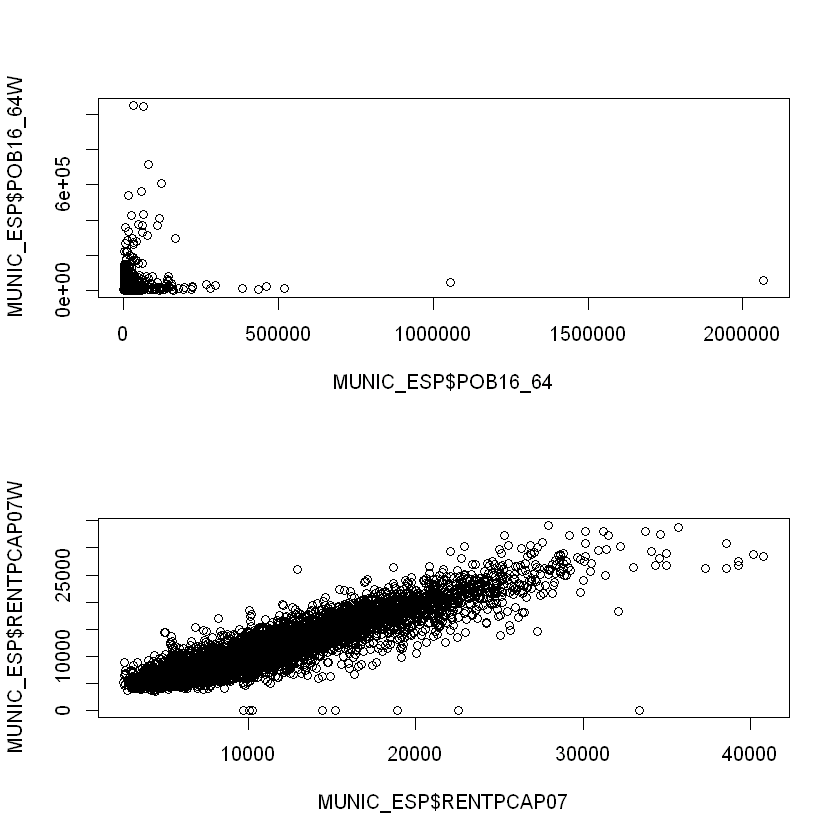

In [210]:
#==============================================#
# 6 Estudiar si existe o no correlacion espacial entre una variable y su retardo espacial ----
#==============================================#
# Hacemos un simple plot
par(mfrow=c(2,1))
plot(MUNIC_ESP$POB16_64W~MUNIC_ESP$POB16_64)
plot(MUNIC_ESP$RENTPCAP07W~MUNIC_ESP$RENTPCAP07)
par(mfrow=c(1,1))

**INTERPRETACIÓN DE RESULTADOS** Los gráficos de arriba representan el diagrama de dispersión de la variable `POB16_64` y `RENTPCAP07` frente a sus correspondientes retardos espaciales `POB16_64W` y `RENTPCAP07W`, respectivamente.

No se puede extraer ninguna conclusión clara de autocorrelación espacial en el diagrama de dispersión de la población activa. Consecuentemente, se debe evidenciar numéricamente y contrastar la autocorrelación espacial de esta variable.

La evidencia gráfica sugiere una autocorrelación espacial positiva en la renta percápita, es decir, los valores de renta percápita de un municipio tienden a asemejarse a la renta percápita de sus correspondientes municipios próximos.

In [211]:
# Coeficiente de Correlacion espacial: La I de Moran Global
# HO: NO hay correlación espacial global
spdep::moran.test(MUNIC_ESP$POB16_64, peso.w.queen, zero.policy = TRUE)
spdep::moran.test(MUNIC_ESP$RENTPCAP07, peso.w.queen, zero.policy = TRUE)  


	Moran I test under randomisation

data:  MUNIC_ESP$POB16_64  
weights: peso.w.queen  
n reduced by no-neighbour observations  

Moran I statistic standard deviate = 25.595, p-value < 2.2e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
     1.387718e-01     -1.234720e-04      2.944888e-05 



	Moran I test under randomisation

data:  MUNIC_ESP$RENTPCAP07  
weights: peso.w.queen  
n reduced by no-neighbour observations  

Moran I statistic standard deviate = 127.5, p-value < 2.2e-16
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
     8.523423e-01     -1.234720e-04      4.470197e-05 


**INTERPRETACIÓN DE RESULTADOS** El test de Moran evalúa si los valores de una variable están espacialmente correlacionados. Puede variar entre:

- 1: Alta correlación espacial positiva (valores similares están cerca).
  
- 0: No hay correlación espacial (patrón aleatorio).
  
- -1: Alta correlación espacial negativa (valores opuestos están cerca).

Los coeficientes de correlacións espacial obtenidos son de $0.14$ y $0.85$ para las variables `POB16_64` y `RENTPCAP07`, respectivamente. Estos valores son positivos, indicando correlación espacial positiva. Es decir, las áreas con número de población activa similar tienden a estar cerca unas de otras y áreas con renta percápita similar tienden a estar cerca unas de otras.

Por otro lado, el p-valor obtenido en ambos contrastes de correlación espacial es $<2.2e-16$. Dicho valor es inferior al nivel de significación del $5\%$ y consecuentemente, debemos rechazar la hipótesis nula de correlación espacial. En otras palabras, existe evidencia estadísticamente significativa de que las variables de población activa `POB16_64` y renta percápita `RENTPCAP07` están espacialmente autocorrelacionadas.

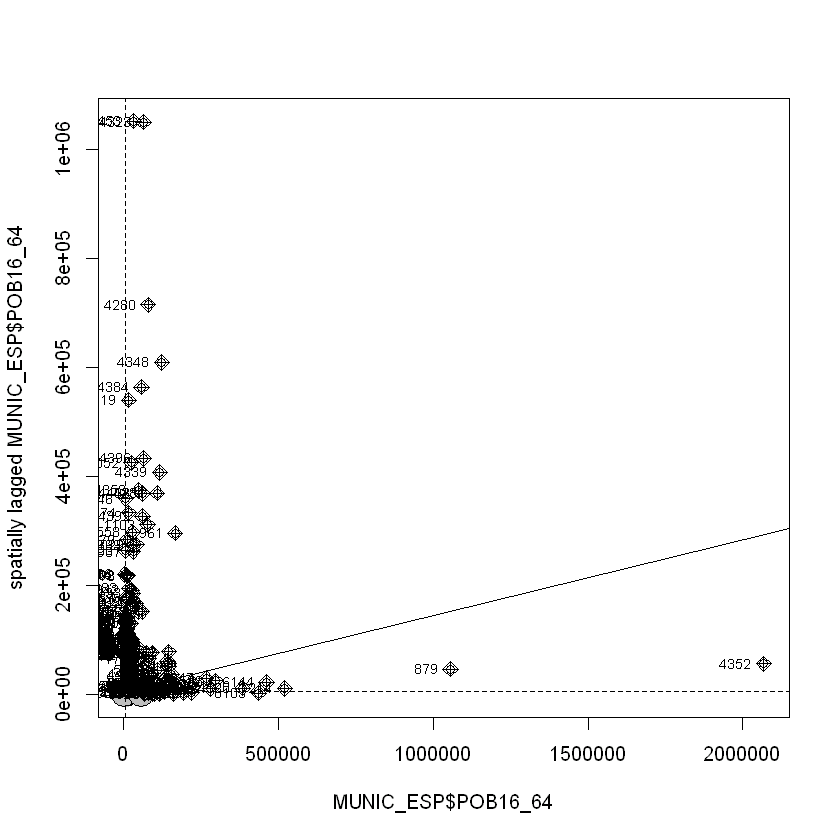

In [212]:
# Obtenemos el Scatterplot de Moran
par(mar=c(5.1, 4.1, 4.1, 2.1))
spdep::moran.plot(MUNIC_ESP$POB16_64,peso.w.queen,zero.policy = TRUE)

**INTERPRETACIÓN DE RESULTADOS** Al igual que pasaba en el diagrama de dispersión, en este diagrama de Moran no se puede observar correctamente la autocorrelación espacial en la variable de población activa. Sin embargo, ya hemos evidenciado numéricamente y hemos realizado su correspondiente contraste, evidenciando que dicha variable sí está autocorrelacionada espacialmente.

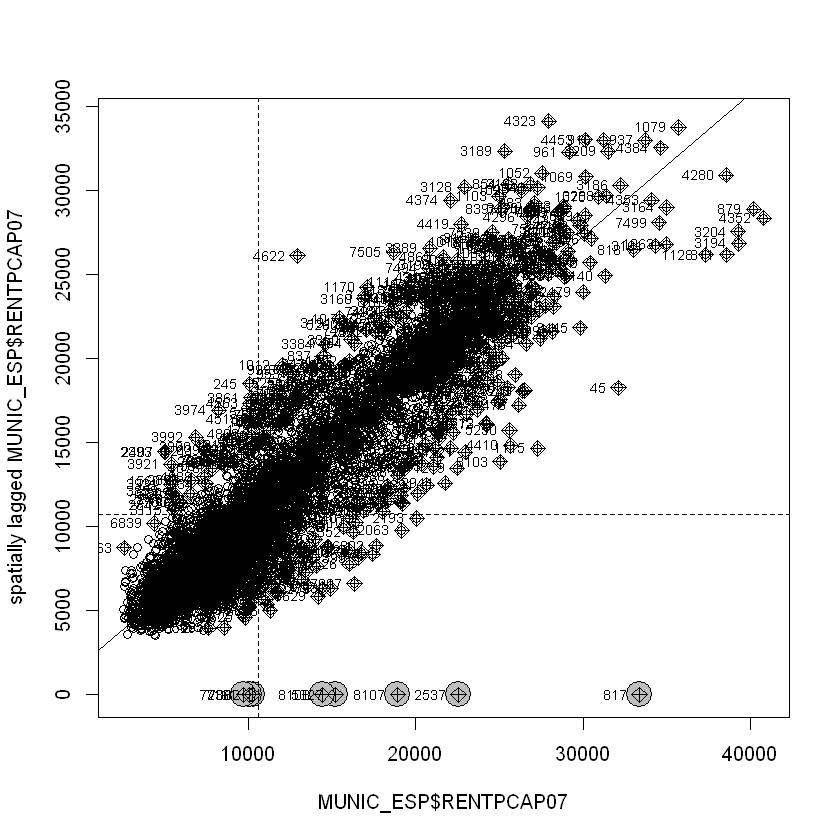

In [213]:
# Obtenemos el Scatterplot de Moran
par(mar=c(5.1, 4.1, 4.1, 2.1))
spdep::moran.plot(MUNIC_ESP$RENTPCAP07,peso.w.queen,zero.policy = TRUE)

**INTERPRETACIÓN DE RESULTADOS** Se observa como la mayoría de los puntos se concentran en el primer y tercer cuadrante del diagrama de Moran, obteniendo una segunda evidencia gráfica de que la varaible de renta percápita presenta un autocorrelación espacial positiva.

In [214]:
# Coeficiente de Correlacion espacial: La I de Moran Local (calculamos la I de Moran para cada uno de los 8108 Municipios)
# HO: NO hay correlación espacial local
moran.loc_POB16_64 = spdep::localmoran(MUNIC_ESP$POB16_64, peso.w.queen, zero.policy = TRUE)
moran.loc_RENTPC = spdep::localmoran(MUNIC_ESP$RENTPCAP07, peso.w.queen, zero.policy = TRUE)

#_______________________________________#
# A continuación os muestro como construir paso a paso el mapa de LISA
# Los cuadrantes (Q1 - superior derecho, Q2 - superior izquierdo, Q3 -inferior izquierdo y Q4 - inferior derecho) 
# pueden ser interpretados como:
# Q1 y Q3 - indican puntos de asociacion espacial positiva, 
# en el sentido de que una localizacion posee vecinos con valores semejantes.
# Q2 y Q4 - indican puntos de asociacion espacial negativa, 
# en el sentido de que una localizacion posee vecinos con valores distintos.
# indicando puntos de transicion entre diferentes patrones espaciales.
MUNIC_ESP$lmoran_POB16_64 = moran.loc_POB16_64[,5]
MUNIC_ESP$lmoran_RENTPC = moran.loc_RENTPC[,5]

# Variable que queremos crear
MUNIC_ESP$quad_sig_POB16_64 = NA
MUNIC_ESP$quad_sig_RENTPC = NA

# Mapa de las correlaciones espaciales locales y significativas
# Mapas LISA-Local Indicator of Spatial Association
MUNIC_ESP$POB16_64_TIP = scale(MUNIC_ESP$POB16_64)
MUNIC_ESP$RENTPCAP07_TIP = scale(MUNIC_ESP$RENTPCAP07)

# Mapas LISA-Local Indicator of Spatial Association para la varible TASA_PAROW
MUNIC_ESP$POB16_64W_TIP = scale(MUNIC_ESP$POB16_64W)
MUNIC_ESP$RENTPCAP07W_TIP = scale(MUNIC_ESP$RENTPCAP07W)

# Construimos las 4 posibles categorias significativas y la posible categoria NO significativa
# high-high quadrant
MUNIC_ESP$quad_sig_POB16_64[(MUNIC_ESP$POB16_64_TIP >= 0 & MUNIC_ESP$POB16_64W_TIP >= 0 & 
                                 MUNIC_ESP$lmoran_POB16_64 <= 0.05)] <- "high-high" # que sean significativos (p-valor de la I Moran local < 5%)

MUNIC_ESP$quad_sig_RENTPC[(MUNIC_ESP$RENTPCAP07_TIP >= 0 & MUNIC_ESP$RENTPCAP07W_TIP >= 0 & 
                                 MUNIC_ESP$lmoran_RENTPC <= 0.05)] <- "high-high" # que sean significativos (p-valor de la I Moran local < 5%)

# low-low quadrant
MUNIC_ESP$quad_sig_POB16_64[(MUNIC_ESP$POB16_64_TIP <= 0 & 
                                 MUNIC_ESP$POB16_64W_TIP <= 0 & 
                                 MUNIC_ESP$lmoran_POB16_64 <= 0.05)] <- "low-low"

MUNIC_ESP$quad_sig_RENTPC[(MUNIC_ESP$RENTPCAP07_TIP <= 0 & 
                                 MUNIC_ESP$RENTPCAP07W_TIP <= 0 & 
                                 MUNIC_ESP$lmoran_RENTPC <= 0.05)] <- "low-low"

# high-low quadrant
MUNIC_ESP$quad_sig_POB16_64[(MUNIC_ESP$POB16_64_TIP >= 0 & 
                                 MUNIC_ESP$POB16_64W_TIP <= 0 & 
                                 MUNIC_ESP$lmoran_POB16_64 <= 0.05)] <-  "high-low"

MUNIC_ESP$quad_sig_RENTPC[(MUNIC_ESP$RENTPCAP07_TIP >= 0 & 
                                 MUNIC_ESP$RENTPCAP07W_TIP <= 0 & 
                                 MUNIC_ESP$lmoran_RENTPC <= 0.05)] <-  "high-low"

# low-high quadrant
MUNIC_ESP$quad_sig_POB16_64[(MUNIC_ESP$POB16_64_TIP <= 0 & 
                                 MUNIC_ESP$POB16_64W_TIP >= 0 & 
                                 MUNIC_ESP$lmoran_POB16_64 <= 0.05)] <-  "low-high"

# low-high quadrant
MUNIC_ESP$quad_sig_RENTPC[(MUNIC_ESP$RENTPCAP07_TIP <= 0 & 
                                 MUNIC_ESP$RENTPCAP07W_TIP >= 0 & 
                                 MUNIC_ESP$lmoran_RENTPC <= 0.05)] <-  "low-high"

# non-significant observations
MUNIC_ESP$quad_sig_POB16_64[MUNIC_ESP$lmoran_POB16_64 > 0.05] <-  "not signif."

MUNIC_ESP$quad_sig_RENTPC[MUNIC_ESP$lmoran_RENTPC > 0.05] <-  "not signif."

In [215]:
# Transformación a factor de los valores
MUNIC_ESP$quad_sig_POB16_64 <- as.factor(MUNIC_ESP$quad_sig_POB16_64)
MUNIC_ESP$quad_sig_RENTPC <- as.factor(MUNIC_ESP$quad_sig_RENTPC)

Warning message in title(...):
""add" es un parámetro gráfico inválido"


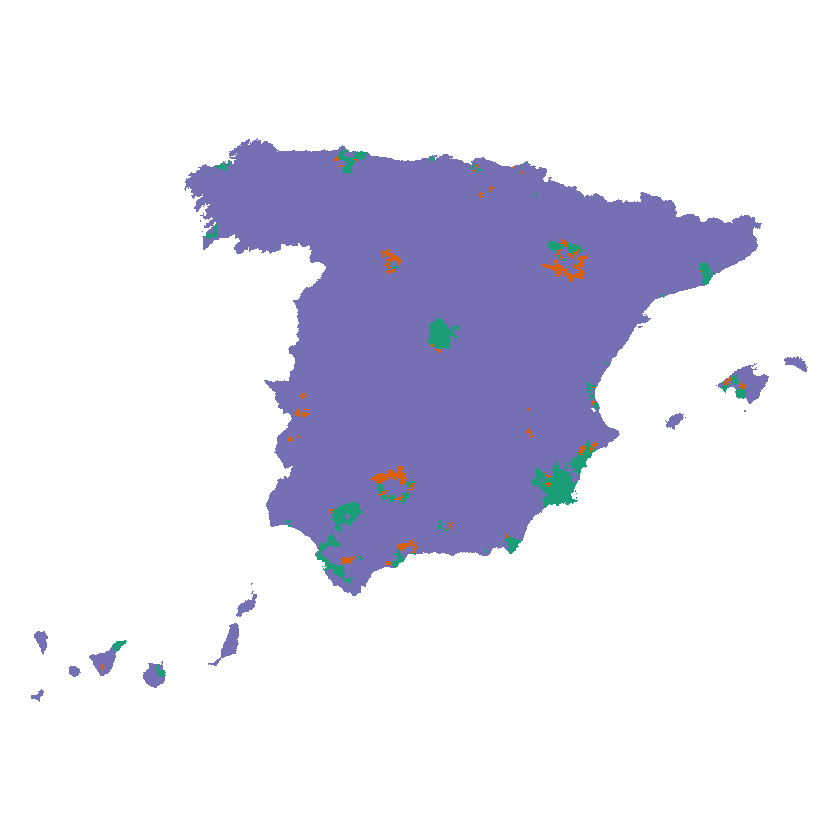

In [216]:
# Finalmente construimos el mapa LISA calculando la I de Moran Local para ver donde existe dependencia espacial SIGNIFICATIVA
nombrevbles = "quad_sig_POB16_64"
par(mar=c(0,0,0,0))
palette(RColorBrewer::brewer.pal(n = length(levels(eval(parse(text=paste("MUNIC_ESP$",noquote(nombrevbles),sep=""))))), name = "Dark2"))
plot(MUNIC_ESP[17],col = eval(parse(text=paste("MUNIC_ESP$",noquote(nombrevbles),sep=""))),
     lty=1, border=NA,lwd=0.25, add=F,  axes=F, pch = 19)
par(mar=c(2,2,2,2))

In [217]:
# Tabla de frecuencias absolutas de la I de Moran Local
table(MUNIC_ESP$quad_sig_POB16_64)

# Mapeo de colores
setNames(RColorBrewer::brewer.pal(n = 5, name = "Dark2"), sort(levels(MUNIC_ESP$quad_sig_POB16_64)))


  high-high    low-high not signif. 
        231         110        7759 

high-high    low-high not signif.        <NA>        <NA> 
  "#1B9E77"   "#D95F02"   "#7570B3"   "#E7298A"   "#66A61E"

Código de colores:

- <p style="color: #1B9E77;">Verde Oscuro #1B9E77: high-high (municipios cuya población activa es elevada cuyos vecinos tambien tienen población activa alta).</p>

- <p style="color: #D95F02;">Marrón #D95F02: low-high (municipios cuya población activa es baja cuyos vecinos tienen población activa alta).</p>

- <p style="color: #7570B3;">Morado #7570B3: sin relación espacial local (relación no significativa).</p>

**INTERPRETACIÓN DE RESULTADOS** El mapa de LISA, mediante el contraste de correlación local o test de Moran Local, nos ayuda a indentificar clústeres significativos y posibles valores atípicos en áreas específicas.

Analizando el mapa de LISA para la variable `POB16_64`, observamos como la mayoría de los municipios no están autocorrelacionados LOCALMENTE, a pesar de que la autocorrelación espacial global sea significativa. Posiblemente, esto se deba a que unos pocos valores extremos estén dominando el estadístico global , mientras que las áreas restantes no tienen patrones significativos. Se observa algunos pocos clúesteres con alta población activa. En resumen, aunque existe una tendencia global de autocorrelación espacial en la variable (test de Moran Global), esta tendencia no es uniforme, y muchas áreas no muestran evidencia de patrones espaciales significativos (test de Moran Local). Esto sugiere que las dinámicas espaciales varían localmente.

Warning message in title(...):
""add" es un parámetro gráfico inválido"


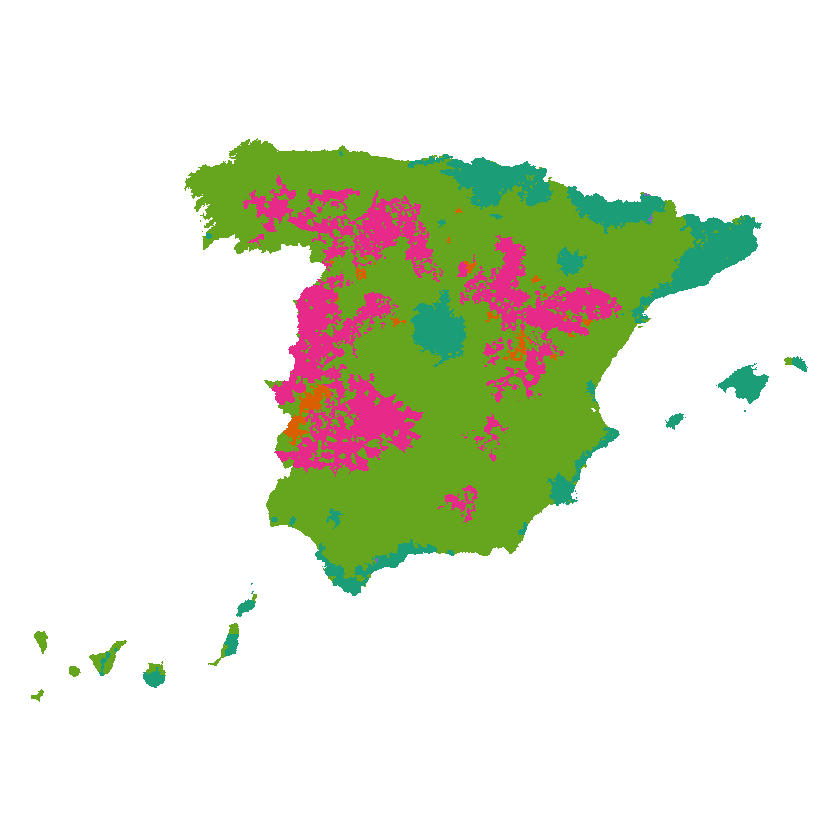

In [218]:
# Finalmente construimos el mapa LISA calculando la I de Moran Local para ver donde existe dependencia espacial SIGNIFICATIVA
nombrevbles = "quad_sig_RENTPC"
par(mar=c(0,0,0,0))
palette(RColorBrewer::brewer.pal(n = 5, name = "Dark2"))
plot(MUNIC_ESP[17],col = eval(parse(text=paste("MUNIC_ESP$",noquote(nombrevbles),sep=""))),
     lty=1, border=NA,lwd=0.25, add=F,  axes=F, pch = 19)
legend(x = -0.75,y = 37, legend=names(table(eval(parse(text=paste("MUNIC_ESP$",noquote(nombrevbles),sep=""))))),
       fill=palette(RColorBrewer::brewer.pal(n = 5, name = "Set2")), title = nombrevbles, cex=0.6, box.lty=0, border = 0)
par(mar=c(2,2,2,2))

In [219]:
# Tabla de frecuencias absolutas de la I de Moran Local
table(MUNIC_ESP$quad_sig_RENTPC)

# Mapeo de colores
setNames(RColorBrewer::brewer.pal(n = 5, name = "Dark2"), sort(levels(MUNIC_ESP$quad_sig_RENTPC)))


  high-high    high-low    low-high     low-low not signif. 
       1437          20           3        1203        5437 

high-high    high-low    low-high     low-low not signif. 
  "#1B9E77"   "#D95F02"   "#7570B3"   "#E7298A"   "#66A61E"

Código de colores:

- <p style="color: #1B9E77;">Verde Oscuro #1B9E77: high-high (municipios cuya renta percápita es elevada cuyos vecinos tambien tienen renta percápita alta).</p>

- <p style="color: #D95F02;">Marrón #D95F02: high-low (municipios cuya renta percápita es elevada cuyos vecinos tienen renta percápita baja).</p>

- <p style="color: #7570B3;">Morado #7570B3: low-high (municipios cuya renta percápita es baja cuyos vecinos tienen renta percápita alta).</p>

- <p style="color: #E7298A;">Rosa #E7298A: low-low (municipios cuya renta percápita es baja cuyos vecinos tambien tienen renta percápita baja).</p>

- <p style="color: #66A61E;">Verde Claro #66A61E: sin relación espacial local (relación no significativa).</p>

**INTERPRETACIÓN DE RESULTADOS** El mapa de LISA, mediante el contraste de correlación local o test de Moran Local, nos ayuda a indentificar clústeres significativos y posibles valores atípicos en áreas específicas.

Analizando el mapa de LISA para la variable `RENTPCAP07`, identificamos unos clústeres significativos con renta percápita alta (color verde oscuro) en zonas costeras, islas Canarias/Baleares y en la capital. Por otro lado, podemos observar la presencia de clústeres significativos con rentas percápita baja (color rosa) en el interior del país. Este resultado coincide con el ya observado previamente en el mapa de coropletas.

<div style="background-color:#5DADE2"><b>Apartado 7</b></div>

**ESTIMACIÓN DEL MODELO DE REGRESIÓN LINEAL SIN TENER EN CUENTA EL EFECTO ESPACIAL**

Paso 1. Correlacion variable dependiente con variables independientes

In [220]:
# En primer lugar, verificamos si las variables se ajustan a una distribución normal
# Creamos un nuevo data.frame formado únicamente por la variable dependiente y las independientes
df = st_drop_geometry(MUNIC_ESP[, c('TASA_PARO', 'POB16_64', 'RENTPCAP07')])

# Contraste de bondad de ajuste
# H0: la variable se ajusta a una distribución normal
apply(df, MARGIN = 2, function(x) lillie.test(x)$p.value)

TASA_PARO      POB16_64    RENTPCAP07 
 5.348004e-40  0.000000e+00 1.299458e-307

Se observa como el p-valor obtenido del contraste de bondad de ajuste para las tres variables es inferior al nivel de significación del $5\%$. Por lo tanto, existe evidencia estadísticamente significativa para afirmar que las tres variables NO se ajustan a una distribución normal. Debido a que no se cumple la condición de normalidad, a continuación se calculará la evidencia numérica y correspondiente contraste de hipótesis de correlación entre la variable dependiente y las independientes, empleando el método de `Kendall` (este método no precisa de que las variables cumplan el principio de normalidad).

In [221]:
# Contraste de correlación lineal
# H0: Las variables son independientes (r=0)
cor.test(MUNIC_ESP$TASA_PARO, MUNIC_ESP$POB16_64, method = 'kendall') 
cor.test(MUNIC_ESP$TASA_PARO, MUNIC_ESP$RENTPCAP07, method = 'kendall') 


	Kendall's rank correlation tau

data:  MUNIC_ESP$TASA_PARO and MUNIC_ESP$POB16_64
z = 41.99, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.3111753 



	Kendall's rank correlation tau

data:  MUNIC_ESP$TASA_PARO and MUNIC_ESP$RENTPCAP07
z = 1.127, p-value = 0.2598
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
0.008346969 


**INTERPRETACIÓN DE RESULTADOS**

El p-valor obtenido en el contraste de correlación entre la variable dependiente `TASA_PARO` y `POB16_64`es $<2.2e-16$. Dado que es inferior al nivel de significación del $5\%$, existe evidencia estadísticamente significativa de que ambas variables están correlacionadas.

Por otro lado, el p-valor obtenido en el contraste de correlación entre la variable dependiente `TASA_PARO` y `RENTPCAP07`es $0.2598$ superior al nivel de significación del $5\%$. En esta ocasión, no podemos rechazar la hipótesis nula establecida y consecuentemente, existe evidencia estadísticamente significativa de que las variables NO están correlacionadas. Por tanto, no se puede emplear la variable `RENTPCAP07` en el modelo de regresión lineal.

En resumen, dado los resultados obtenidos en el contraste de correlación entre la variable dependiente y las variables independientes, solo emplearemos la variable `POB16_64` como variable independiente en el modelo de regresión lineal.

Paso 2. Estimamos el modelo de regresion sin efectos espaciales

In [222]:
# Modelo regresion SIN efectos espaciales
modelo.lm = lm(TASA_PARO ~ POB16_64, MUNIC_ESP) 
summary(modelo.lm)


Call:
lm(formula = TASA_PARO ~ POB16_64, data = MUNIC_ESP)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24320 -0.03852 -0.00556  0.03297  0.42186 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.074e-01  6.225e-04 172.574  < 2e-16 ***
POB16_64    1.166e-07  2.020e-08   5.774 8.04e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05562 on 8106 degrees of freedom
Multiple R-squared:  0.004096,	Adjusted R-squared:  0.003973 
F-statistic: 33.34 on 1 and 8106 DF,  p-value: 8.037e-09


**INTERPRETACIÓN DE RESULTADOS** A continuación, se detalla la información de interés devuelta por la función `summary`:

- Principales estadísticos de los valores de error (columna `Residuals`):

    En esta tabla se observa el valor mínimo -0.24320, primer cuartil -0.03852, mediana -0.00556, tercer cuartil 0.03297 y máximo 0.42186 de los residuos del modelo. Dichos valores se correponden a la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo (más abajo se calcula el vector de residuos).

- Coeficientes de regresión (columna `Estimate`):
  
    - $\beta_0=1.074e-01$: representa la ordendada en el origen. Para este caso, la tasa de paro cuando la población activa es de 0. El valor no es interpretable debido a que la tasa de paro debe ser 0 cuando el número población activa es de 0.
    
    - $\beta_1=1.166e-07$: representa la pendiente de la recta. Es decir, por cada aumento en una unidad en la población activa, la tasa de paro incrementa aproximadamente 1.166e-07 veces. Es decir, el modelo predice que por cada aumento de 1,000 personas en edad activa en un municipio, la tasa de paro del municipio aumenta un $0.01\%$, sugiriendo que la cantidad de población activa tiene muy poco impacto sobre la tasa de paro del municipio.

- Errores típicos de los parámetros estimados (columna `Std. Error`):

  Estos valores indican la precisión con la que se ha estimado los coeficientes de regresión $\beta_0$ y $\beta_1$.
  
    - Error estándar de $\beta_0=6.225e-04$: indica que hay mucha presición en la estimación de la tasa de paro cuando no se tiene en cuenta la variable independiente de la cantidad de población activa.
      
    - Error estándar de $\beta_1=2.020e-08$: sugiere que hay mucha precisión en la estimación del efecto de la cantidad de población activa sobre la tasa de paro.

- P-valor para **Contraste de Significatividad Individual** sobre los parámetros estimados (columna `Pr(>|t|)`):
  
    - P-valor de $\beta_0<2e-16$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_0$. En otras palabras, $\beta_0$ es distinto de 0.
      
    - P-valor de $\beta_1=8.04e-09$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_1$. En otras palabras, $\beta_1$ es distinto de 0.

- Estimador de la desviación típica de los errores (valor de `Residual standard error`):
  
    - $SSR$ o $\sigma=0.05562$: este valor indica la cantidad total de variabilidad en la tasa de paro que no es capturada por el modelo. Un SSR de 0.05562 puede ser interpretado como una indicación de que, aunque la cantidad de población activa tiene un efecto sobre la tasa de paro, hay otros muchos factores significativos que también afectan y que no están incluidos en el modelo estimado.

- Grados de libertad (valor de `degrees of freedom`):
  
    - $df=8106$: este valor se obtiene de restar el número total de observaciones (8108) y el número de parámetros estimados ($\beta_0$ y $\beta_1$). Los grados de libertad son importantes porque afectan a la precisión de las estimaciones de los parámetros y la robustez de las pruebas estadísticas. Un número mayor de grados de libertad generalmente indica una mayor confiabilidad en las conclusiones estadísticas derivadas del modelo, ya que se dispone de más datos para estimar los parámetros y evaluar el ajuste del modelo. No existe un criterio formal que indique qué es un número elevado o no de grados de libertad aunque si es menor, se suele identificar con una menor confiabilidad en los resultados. Dado que este dataset dispone de 8108 observaciones, la confiabilidad en la estimación de los parámetros y robustez de las pruebas se puede considerar aceptable.

- Coeficientes de determinación (valores de `Multiple R-squared` y `Adjusted R-squared`):
  
    - $R^{2}=0.004096$: indica que aproximadamente el 0.4% de la variabilidad en la tasa de paro puede ser explicada por la cantidad de población activa de un municipio. Este valor implica que, aunque existe una relación lineal entre ambas variables, hay otros factores significativos que sumados todos ellos, influyen con mucho mayor peso en la tasa de paro y que no están incluidos en el modelo. El $R^2$ de este tamaño sugiere que, el efecto de la cantidad de población activa sobre la tasa de paro es mínimo, existiendo aproximadamente un 99.6% de la variabilidad atribuible a otros factores no contemplados en el modelo.
      
    - $R_{adj}^2=0.003973$: $R^2$ tiende a sobreestimar el proder predictivo del modelo, aunque las variables no sean significativas. Entonces, calculamos el coeficiente de determinación ajustado $R^2_{adj}$ que intenta corregir esto ya que penaliza la incorporación de nuevas variables independientes. En este caso, no es preocupación ya que tenemos una única variable independiente.

- P-valor para **Contraste de Significatividad Global** sobre los parámetros estimados (valor `p-value`):
  
    -  $p-valor=8.037e-09$: el valor es menor que el nivel de significación de $5\%$. Esto implica que los valores de los coeficientes de regresión son diferentes entre sí. Aunque ya lo habíamos comprobado utilizando el contraste de significatividad individual, obtenemos una doble evidencia, validando los resultados anteriores y dotando de mayor robustez a los mismos.

In [223]:
# Guardamos los residuos de cada Municipio
MUNIC_ESP$lm.res = resid(modelo.lm)

Paso 3. Obtenemos las evidencias graficas sobre efectos espaciales

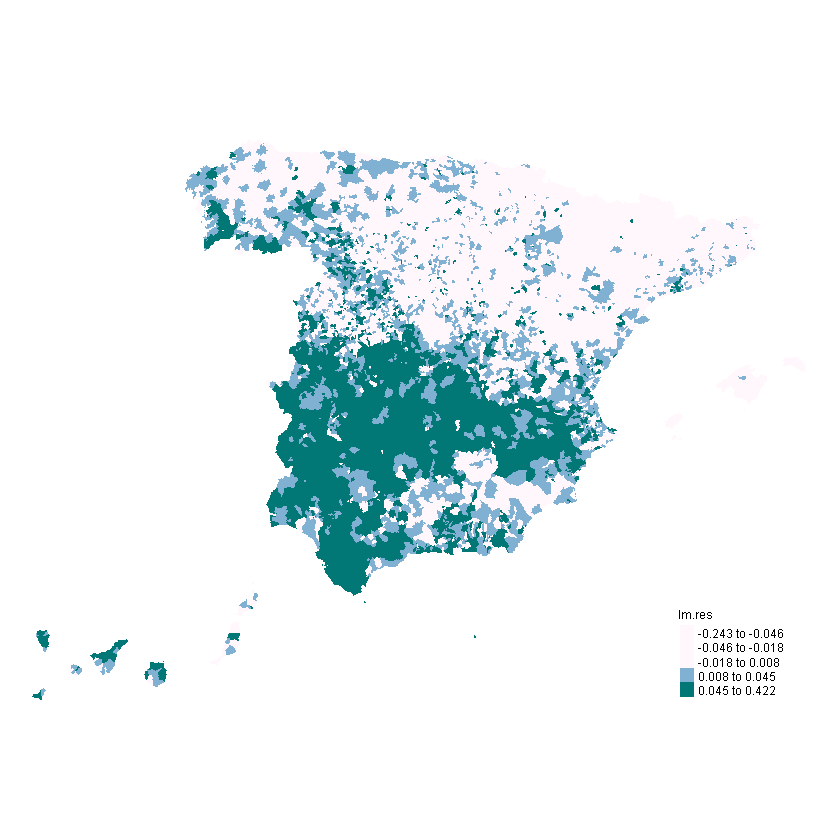

In [224]:
#_____________________________________________________#
# Paso 3. Obtenemos las evidencias graficas sobre efectos espaciales 
# en los residuos del modelo de regresion lineal simple de cada Municipio
tm_shape(MUNIC_ESP) +
  tm_fill(palette ="PuBuGn",col = "lm.res",style = "quantile",n=5)+
  tmap_options(check.and.fix = TRUE)+
  tm_layout(frame = FALSE,
            legend.title.size = .7,
            legend.text.size =0.6,
            legend.position = c("right","bottom"),
            legend.bg.color = "white",
            legend.bg.alpha = 1,
            legend.stack = "horizontal",
            legend.width = 1.5,
            legend.height = 1.5)

**INTERPRETACIÓN DE RESULTADOS** En la imagen de arriba se ha representado el mapa de coropletas de los residuos del modelo de regresión lineal, tomando como variable dependiente `TASA_PARO` y como independiente `POB16_64`.

Para que no exista dependencia espacial entre las variables del modelo, la evidencia gráfica de los residuos debería mostrar un patrón aleaotrio. Sin embargo, se observa como los residuos se distribuyen siguiendo un patrón, evidenciando gráficamente de que SÍ existe dependencia espacial.

Hasta que no obtengamos unos residuos con ruido blanco NO estaremos estimando BIEN nuestro modelo ya que NO estamos captando esa dependencia espacial que existe. Por ruido blanco se entiende que todos los términos de error de todos los individuos, en este caso, municipios, tienen media 0, la misma varianza y NO estan autocorrelacionados. Se debe de cumplir esto para que el estimador de MCO sea un estimador insesgado, eficiente y consistente para el modelo de regresion lineal general. Entonces, en este caso, necesitamos captar esa dependencia espacial utilizando variables retardadas espacialmente utilizando modelos de regresion espacial.

A continuación, se obtiene la evidencia contrastada sobre la dependencia espacial.

Paso 4. Obtenemos evidencias contrastadas sobre efectos espaciales

Anteriormente se ha evidenciado que la variable independiente `RENTPCAP07` no está relacionada linealmente con la variable dependiente `TASA_PARO` y consecuentemente, no se ha incluido en el modelo de regresión lineal.

A continuación, se incluirá en el modelo de regresión espacial ambas variables independientes `RENTPCAP07` / `POB16_64` y se contrastará la dependencia espacial del modelo.

In [225]:
# Declaramos modelo con todas las variables independientes consideradas
modelo.lm_full = lm(TASA_PARO ~ RENTPCAP07 + POB16_64,data = MUNIC_ESP)

In [226]:
#_____________________________________________________#
# Paso 4. Obtenemos evidencias contrastadas sobre efectos espaciales 
# en los residuos del modelo de regresion lineal simple de cada Municipio

# Calculamos el Indice de Moran sobre los RESIDUOS de nuestro modelo lm 
# HO: NO hay correlación espacial
moran.lm = spdep::lm.morantest(modelo.lm_full, peso.w.queen, alternative="two.sided", zero.policy=TRUE)
print(moran.lm)


	Global Moran I for regression residuals

data:  
model: lm(formula = TASA_PARO ~ RENTPCAP07 + POB16_64, data =
MUNIC_ESP)
weights: peso.w.queen

Moran I statistic standard deviate = 85.928, p-value < 2.2e-16
alternative hypothesis: two.sided
sample estimates:
Observed Moran I      Expectation         Variance 
    5.741143e-01    -2.399317e-04     4.467798e-05 



**INTERPRETACIÓN DE RESULTADOS** Se obtiene un p-valor $<2.2e-16$ en el contraste de dependencia espacial y por lo tanto, se debe rechazar la hipótesis nula en favor de la alternativa. Es decir, existe evidencia estadísticamente significativa de que existe dependencia espacial en el modelo estimado y por lo tanto, tenemos que crear un nuevo modelo teniendo en cuenta este efecto espacial.

En resumen, el siguiente paso seria incluir las variables retardadas espaciales y realizar la regresión oportuna. No podemos aplicar MCO ya que existe un problema de ENDOGENEIDAD al incluir en nuestra regresion las variables retardadas espacialmente. No se cumplirían las 3 caracteristicas de todo estimador. Luego, tenemos que aplicar Minimos Cuadrados en 2 etapas.

<div style="background-color:#5DADE2"><b>Apartado 8</b></div>

In [227]:
# Creamos el modelo de regresión espacial
modelo.em = lm(TASA_PARO ~ RENTPCAP07 + POB16_64,data = MUNIC_ESP)
summary(modelo.em)


Call:
lm(formula = TASA_PARO ~ RENTPCAP07 + POB16_64, data = MUNIC_ESP)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27872 -0.03760 -0.00471  0.03308  0.41771 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.148e-01  1.405e-03  81.739  < 2e-16 ***
RENTPCAP07  -7.075e-07  1.205e-07  -5.873 4.46e-09 ***
POB16_64     1.442e-07  2.069e-08   6.966 3.52e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0555 on 8105 degrees of freedom
Multiple R-squared:  0.008315,	Adjusted R-squared:  0.008071 
F-statistic: 33.98 on 2 and 8105 DF,  p-value: 2.014e-15


In [228]:
# Obtenemos la fórmula del modelo de regresión espacial
formula_em = formula(modelo.em)
formula_em

TASA_PARO ~ RENTPCAP07 + POB16_64

**MODELO DE REGRESIÓN ESPACIAL SLM (Spatial Lag Model)**

La expresión del modelo SLM con retardo espacial en la variable dependiente es la siguiente:

\begin{align*}
𝒚=𝝆𝑾𝒚+𝑿𝜷+𝒖 \\
𝒖\sim 𝑵(𝟎, 𝝈^𝟐)
\end{align*}

**Solución**: Las estimaciones MCO (Mínimo Cuadrado Ordinario) serán **sesgadas e inconsistentes** ante la presencia de un retardo espacial en la variable dependiente (endógena). Hay que utilizar MC2E (Mínimos Cuadrados en 2 Etapas) utilizando como instrumentos los retardos espaciales del resto de variables explicativas.

In [229]:
lagsarmodel = spatialreg::lagsarlm(formula_em, data = MUNIC_ESP, peso.w.queen, zero.policy = TRUE,
                                  na.action = na.fail,Durbin = FALSE)
summary(lagsarmodel)


Call:spatialreg::lagsarlm(formula = formula_em, data = MUNIC_ESP, 
    listw = peso.w.queen, na.action = na.fail, Durbin = FALSE, 
    zero.policy = TRUE)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.1777263 -0.0235973 -0.0017122  0.0211387  0.3853662 

Type: lag 
Regions with no neighbours included:
 817 2537 5327 7062 7161 7230 8107 8108 
Coefficients: (asymptotic standard errors) 
               Estimate  Std. Error z value  Pr(>|z|)
(Intercept)  2.5185e-02  1.3355e-03 18.8575 < 2.2e-16
RENTPCAP07  -3.9839e-08  8.3072e-08 -0.4796    0.6315
POB16_64     6.7222e-08  1.4272e-08  4.7101 2.475e-06

Rho: 0.75964, LR test value: 4950.6, p-value: < 2.22e-16
Asymptotic standard error: 0.0089316
    z-value: 85.051, p-value: < 2.22e-16
Wald statistic: 7233.7, p-value: < 2.22e-16

Log likelihood: 14414.85 for lag model
ML residual variance (sigma squared): 0.0014644, (sigma: 0.038268)
Number of observations: 8108 
Number of parameters estimated: 5 
AIC: -28820, (AIC 

**INTERPRETACIÓN DE RESULTADOS** A continuación, se detalla la información de interés devuelta por la función `summary`:

- Principales estadísticos de los valores de error (columna `Residuals`):

    En esta tabla se observa el valor mínimo -0.1777263, primer cuartil -0.0235973, mediana -0.0017122, tercer cuartil 0.0211387 y máximo 0.3853662 de los residuos del modelo. Dichos valores se correponden a la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo (más abajo se calcula el vector de residuos).

- Coeficientes de regresión (columna `Estimate`):
  
    - $\beta_0=2.5185e-02$: representa la ordendada en el origen. Para este caso, la tasa de paro cuando la población activa y renta percápita es de 0. El valor no es interpretable debido a que la tasa de paro debe ser 0 cuando el número población activa es de 0.
    
    - $\beta_1=-3.9839e-08$: representa la pendiente de la recta. Es decir, por cada aumento en una unidad en la renta percápita, la tasa de paro se reduce aproximadamente 1.166e-07 veces. Es decir, el modelo predice que por cada aumento de 1,000 € en la renta percápita de los ciudadanos de un municipio, la tasa de paro del municipio disminuye un $0.003\%$, sugiriendo poca influencia.

    - $\beta_2=6.7222e-08$: representa la pendiente de la recta. Es decir, por cada aumento en una unidad en la cantidad de población activa, la tasa de paro incrementa aproximadamente 6.7222e-08 veces. Es decir, el modelo predice que por cada aumento de 1,000 personas de población activa en un municipio, la tasa de paro del municipio aumenta un $0.007\%$, sugiriendo poca influencia.

- Errores típicos de los parámetros estimados (columna `Std. Error`):

  Estos valores indican la precisión con la que se ha estimado los coeficientes de regresión $\beta_0$ y $\beta_1$.
  
    - Error estándar de $\beta_0=1.3355e-03$: indica que hay mucha presición en la estimación de la tasa de paro cuando no se tiene en cuenta las variables independientes del modelo.

    - Error estándar de $\beta_1=8.3072e-08$: sugiere que hay mucha precisión en la estimación del efecto de la renta percápita sobre la tasa de paro.

    - Error estándar de $\beta_2=1.4272e-08$: sugiere que hay mucha precisión en la estimación del efecto de la cantidad de población activa sobre la tasa de paro.

- P-valor para **Contraste de Significatividad Individual** sobre los parámetros estimados (columna `Pr(>|t|)`):
  
    - P-valor de $\beta_0<2e-16$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_0$. En otras palabras, $\beta_0$ es distinto de 0.
      
    - P-valor de $\beta_1=0.6315$: el valor es mayor que el nivel de significación de $5\%$. Por lo tanto, NO es estadísticamente significativo el coeficiente estimado $\beta_1$. En otras palabras, $\beta_1$ es igual a 0.

    - P-valor de $\beta_2=2.475e-06$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_2$. En otras palabras, $\beta_1$ es distinto de 0.

- Autocorrelación espacial (`Rho`):

    - Estimación de 0.75964, lo que indica una fuerte autocorrelación positiva en la variable dependiente. Esto significa que los valores de tasa de paro en una región tienden a estar relacionados con los valores en sus regiones vecinas. P-valor obtenido inferior a < 2.22e-16, altamente significativo, lo que confirma la presencia de autocorrelación espacial.

- Estimador de la desviación típica de los errores (valor de `Residual standard error`):
  
    - $SSR$ o $\sigma=0.038268$: este valor indica la cantidad total de variabilidad en la tasa de paro que no es capturada por el modelo. Un SSR de 0.038268 puede ser interpretado como una indicación de que, aunque la cantidad de población activa tiene un efecto sobre la tasa de paro, hay otros muchos factores significativos que también afectan y que no están incluidos en el modelo estimado.

- Criterios de ajuste (`AIC`):

    - AIC igual a -28820 para el modelo de regresión espacial estimado. Este valor es mucho menor al AIC de -23871 obtenido para el correspondiente modelo sin considerar la dependencia espacial.

In [230]:
# Comprobamos los residuos del Spatial Lag Model (SLM)
# Recordar que hasta que NO obtengamos unos residuos ruido blanco NO estaremos estimando bien nuestro modelo
# ya que no estaremos captando esa dependencia espacial que existe.
slm.res = resid(lagsarmodel)

In [231]:
# Hemos conseguido captar BIEN esa dependencia espacial? Evidencias gráficas
MUNIC_ESP$slm.res = slm.res # para poder dibujar los residuos

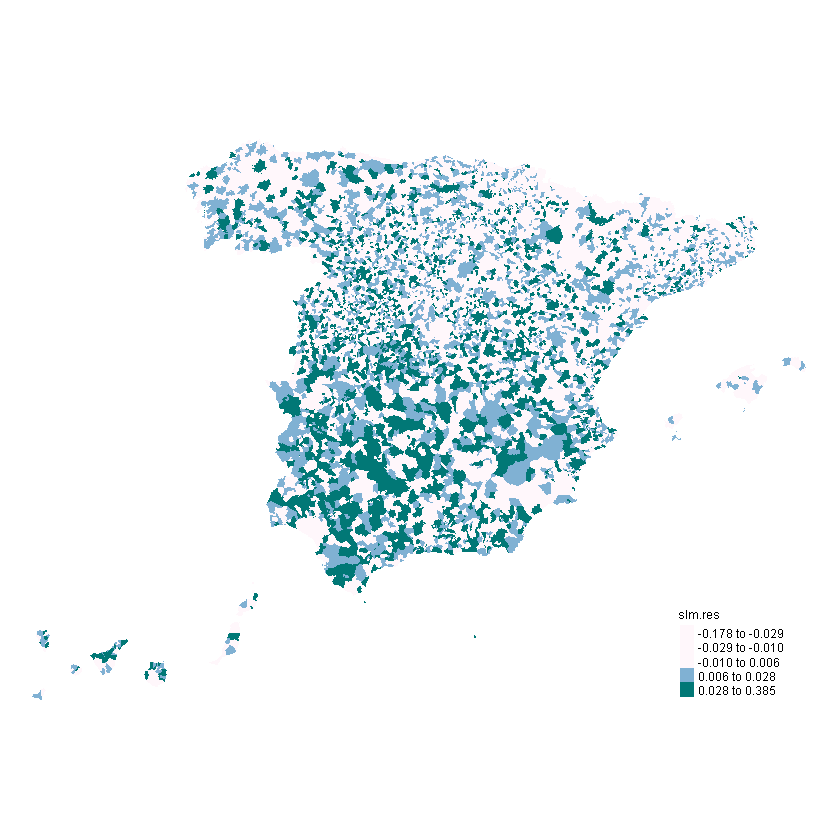

In [232]:
# Obtenemos las evidencias graficas sobre efectos espaciales 
# en los residuos del modelo de regresion con dependencia espacial de cada Municipio
tm_shape(MUNIC_ESP) +
  tm_fill(palette ="PuBuGn",col = "slm.res",style = "quantile",n=5)+
  tmap_options(check.and.fix = TRUE)+
  tm_layout(frame = FALSE,
            legend.title.size = .7,
            legend.text.size =0.6,
            legend.position = c("right","bottom"),
            legend.bg.color = "white",
            legend.bg.alpha = 1,
            legend.stack = "horizontal",
            legend.width = 1.5,
            legend.height = 1.5)

**INTERPRETACIÓN DE RESULTADOS** La imagen de arriba representa la distribución espacial de los residuos del modelo considerando dependencia espacial en la variable dependiente `TASA_PARO`. Se observa que los residuos se distribuyen de forma aleatorio, sugiriendo que el modelo está captando correctamente la dependencia espacial existente.


	Moran I test under randomisation

data:  resid(lagsarmodel)  
weights: peso.w.queen  
n reduced by no-neighbour observations  

Moran I statistic standard deviate = -10.061, p-value = 1
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
    -6.738555e-02     -1.234720e-04      4.469098e-05 


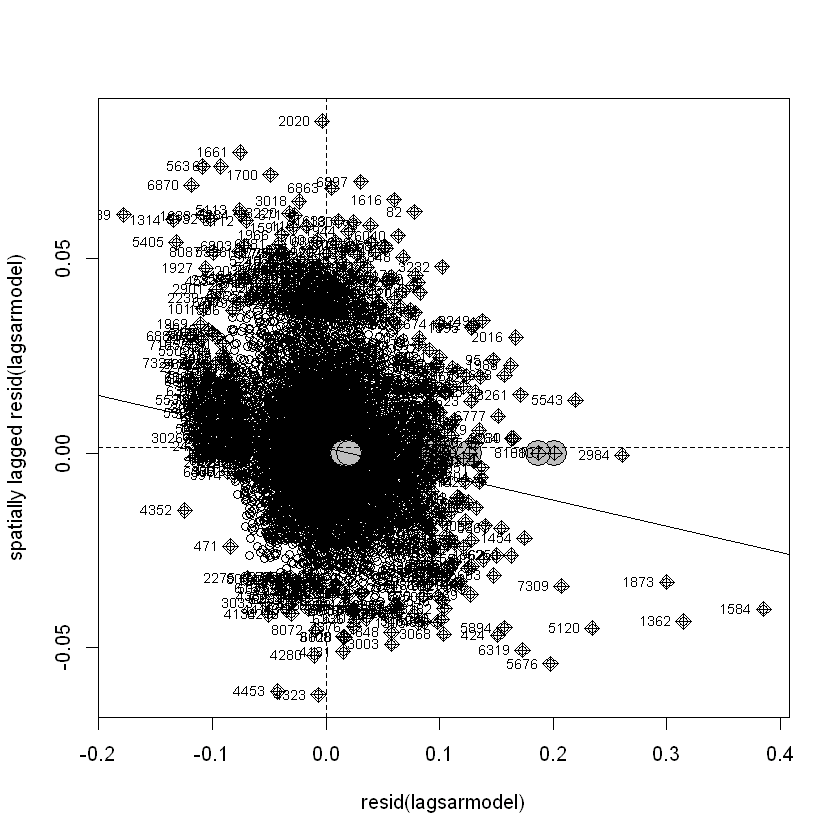

In [233]:
# Contraste de correlación espacial
# Indice de Moran sobre los RESIDUOS
# HO: NO hay correlación espacial
spdep::moran.test(resid(lagsarmodel), peso.w.queen, alternative="greater", zero.policy=TRUE)
spdep::moran.plot(resid(lagsarmodel), peso.w.queen, zero.policy = TRUE)

**INTERPRETACIÓN DE RESULTADOS** El p-valor obtenido del contraste de correlación espacial mediante el método de Moran es de $1$. Dicho valor es muy superior al nivel de significación del $5\%$ y por lo tanto, se debe rechazar la hipótesis nula. Es decir, existe evidencia estadísticamente significativa para afirmar que los residuos del modelo no presentan dependencia espacial y por lo tanto, el modelo está captando correctamente la dependencia espacial existente.

**MODELO DE REGRESIÓN ESPACIAL SEM (Spatial Error Model)**

La expresión del modelo SEM con retardo espacial en el término de error es la siguiente:

\begin{align*}
𝒚=𝐗𝛃+𝒖 \\
𝒖=𝝀𝐖𝒖+ 𝛆 \quad 𝜺\sim𝑵(𝟎, 𝝈^𝟐)
\end{align*}

**Solución**: Ante la presencia de errores correlacionados espacialmente, las estimaciones MCO serán **insesgadas pero ineficientes** porque la matriz de varianzas-covarianzas será no esférica (no es una matriz escalar). Debemos estimarla consistentemente y luego aplicar MCO.

In [234]:
Spatialerror = spatialreg::errorsarlm(formula_em, data = MUNIC_ESP, peso.w.queen, zero.policy = TRUE,
                                     na.action = na.fail,Durbin = FALSE)
summary(Spatialerror)


Call:spatialreg::errorsarlm(formula = formula_em, data = MUNIC_ESP, 
    listw = peso.w.queen, na.action = na.fail, Durbin = FALSE, 
    zero.policy = TRUE)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.1755994 -0.0236226 -0.0019177  0.0210693  0.3864076 

Type: error 
Regions with no neighbours included:
 817 2537 5327 7062 7161 7230 8107 8108 
Coefficients: (asymptotic standard errors) 
              Estimate Std. Error z value  Pr(>|z|)
(Intercept) 9.8388e-02 2.6205e-03 37.5454 < 2.2e-16
RENTPCAP07  5.6400e-07 1.8470e-07  3.0536  0.002262
POB16_64    3.4808e-08 1.1988e-08  2.9037  0.003687

Lambda: 0.76834, LR test value: 5007.6, p-value: < 2.22e-16
Asymptotic standard error: 0.0087937
    z-value: 87.374, p-value: < 2.22e-16
Wald statistic: 7634.2, p-value: < 2.22e-16

Log likelihood: 14443.32 for error model
ML residual variance (sigma squared): 0.0014482, (sigma: 0.038055)
Number of observations: 8108 
Number of parameters estimated: 5 
AIC: -28877, (AIC

**INTERPRETACIÓN DE RESULTADOS** A continuación, se detalla la información de interés devuelta por la función `summary`:

- Principales estadísticos de los valores de error (columna `Residuals`):

    En esta tabla se observa el valor mínimo -0.1755994, primer cuartil -0.0236226, mediana -0.0019177, tercer cuartil 0.0210693 y máximo 0.3864076 de los residuos del modelo. Dichos valores se correponden a la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo (más abajo se calcula el vector de residuos).

- Coeficientes de regresión (columna `Estimate`):
  
    - $\beta_0=9.8388e-02$: representa la ordendada en el origen. Para este caso, la tasa de paro cuando la población activa y renta percápita es de 0. El valor no es interpretable debido a que la tasa de paro debe ser 0 cuando el número población activa es de 0.
    
    - $\beta_1=5.6400e-07$: representa la pendiente de la recta. Es decir, por cada aumento en una unidad en la renta percápita, la tasa de paro se incrementa aproximadamente 5.6400e-07 veces. Es decir, el modelo predice que por cada aumento de 1,000 € en la renta percápita de los ciudadanos de un municipio, la tasa de paro del municipio disminuye un $0.06\%$, sugiriendo poca influencia.

    - $\beta_2=3.4808e-08$: representa la pendiente de la recta. Es decir, por cada aumento en una unidad en la cantidad de población activa, la tasa de paro incrementa aproximadamente 3.4808e-08 veces. Es decir, el modelo predice que por cada aumento de 1,000 personas de población activa en un municipio, la tasa de paro del municipio aumenta un $0.003\%$, sugiriendo muy poca influencia, siendo incluso menor que la influencia de la tasa percápita.

- Errores típicos de los parámetros estimados (columna `Std. Error`):

  Estos valores indican la precisión con la que se ha estimado los coeficientes de regresión $\beta_0$ y $\beta_1$.
  
    - Error estándar de $\beta_0=2.6205e-03$: indica que hay mucha presición en la estimación de la tasa de paro cuando no se tiene en cuenta las variables independientes del modelo.

    - Error estándar de $\beta_1=1.8470e-07$: sugiere que hay mucha precisión en la estimación del efecto de la renta percápita sobre la tasa de paro.

    - Error estándar de $\beta_2=1.1988e-08$: sugiere que hay mucha precisión en la estimación del efecto de la cantidad de población activa sobre la tasa de paro.

- P-valor para **Contraste de Significatividad Individual** sobre los parámetros estimados (columna `Pr(>|t|)`):
  
    - P-valor de $\beta_0<2e-16$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_0$. En otras palabras, $\beta_0$ es distinto de 0.
      
    - P-valor de $\beta_1=0.002262$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_2$. En otras palabras, $\beta_1$ es distinto de 0. A diferencia del modelo SLM, esta vez el coeficiente de regresión es significativo lo que sugiere que el ingreso percápita tiene un efecto positivo en la variable dependiente cuando se ajusta por la dependencia espacial en los errores.

    - P-valor de $\beta_2=0.003687$: el valor es menor que el nivel de significación de $5\%$. Por lo tanto, es estadísticamente significativo el coeficiente estimado $\beta_2$. En otras palabras, $\beta_1$ es distinto de 0.

- Autocorrelación espacial (`Lambda`):

    - Estimación de 0.76834, lo que indica una fuerte dependencia espacial en los errores del modelo. Esto significa que cerca del 77% de la varianza del error está explicada por factores espaciales. P-valor obtenido inferior a < 2.22e-16, altamente significativo, lo que confirma la dependencia espacial en el término de error del modelo.

- Estimador de la desviación típica de los errores (valor de `Residual standard error`):
  
    - $SSR$ o $\sigma=0.038055$: este valor indica la cantidad total de variabilidad en la tasa de paro que no es capturada por el modelo. Un SSR de 0.038268 puede ser interpretado como una indicación de que, aunque la cantidad de población activa tiene un efecto sobre la tasa de paro, hay otros muchos factores significativos que también afectan y que no están incluidos en el modelo estimado.

- Criterios de ajuste (`AIC`):

    - AIC igual a -28877 para el modelo de regresión espacial estimado. Este valor es mucho menor al AIC de -23871 obtenido para el correspondiente modelo sin considerar la dependencia espacial.

In [235]:
# Comprobamos los residuos del modelo SEM
# Recordar que hasta que NO obtengamos unos residuos ruido blanco NO estaremos estimando bien nuestro modelo
# ya que no estaremos captando esa dependencia espacial que existe.
sem.res = resid(Spatialerror)

In [236]:
# Hemos conseguido captar BIEN esa dependencia espacial? Evidencias gráficas
MUNIC_ESP$sem.res = sem.res # para poder dibujar los residuos

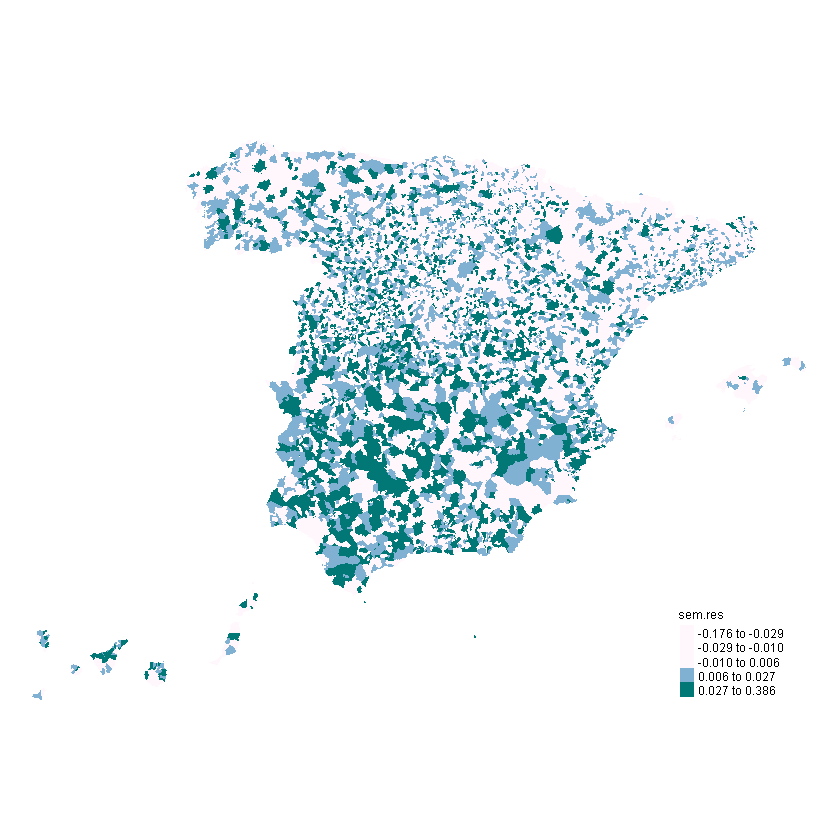

In [237]:
# Obtenemos las evidencias graficas sobre efectos espaciales 
# en los residuos del modelo de regresion con dependencia espacial de cada Municipio
tm_shape(MUNIC_ESP) +
  tm_fill(palette ="PuBuGn",col = "sem.res",style = "quantile",n=5)+
  tmap_options(check.and.fix = TRUE)+
  tm_layout(frame = FALSE,
            legend.title.size = .7,
            legend.text.size =0.6,
            legend.position = c("right","bottom"),
            legend.bg.color = "white",
            legend.bg.alpha = 1,
            legend.stack = "horizontal",
            legend.width = 1.5,
            legend.height = 1.5)

**INTERPRETACIÓN DE RESULTADOS** La imagen de arriba representa la distribución espacial de los residuos del modelo considerando dependencia espacial en en término de error del modelo. Se observa que los residuos se distribuyen de forma aleatorio, sugiriendo que el modelo está captando correctamente la dependencia espacial existente.


	Moran I test under randomisation

data:  resid(Spatialerror)  
weights: peso.w.queen  
n reduced by no-neighbour observations  

Moran I statistic standard deviate = -10.862, p-value = 1
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
    -7.273448e-02     -1.234720e-04      4.469103e-05 


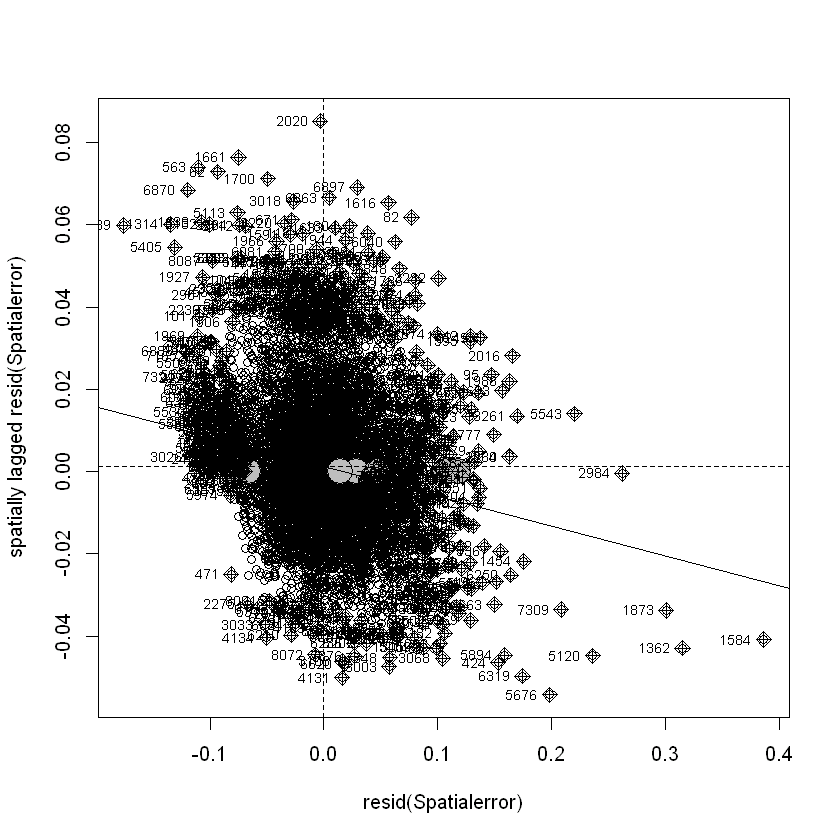

In [238]:
# Los resultados obtenidos son satisfactorios? Evidencias contrastadas
# Indice de Moran sobre los RESIDUOS
# HO: NO hay correlación espacial
spdep::moran.test(resid(Spatialerror), peso.w.queen, alternative="greater", zero.policy=TRUE)
spdep::moran.plot(resid(Spatialerror), peso.w.queen, zero.policy = TRUE)

**INTERPRETACIÓN DE RESULTADOS** El p-valor obtenido del contraste de correlación espacial mediante el método de Moran es de $1$. Dicho valor es muy superior al nivel de significación del $5\%$ y por lo tanto, se debe rechazar la hipótesis nula. Es decir, existe evidencia estadísticamente significativa para afirmar que los residuos del modelo no presentan dependencia espacial y por lo tanto, el modelo está captando correctamente la dependencia espacial en el término de error del modelo.

A continuación, se selecciona el mejor de los modelos estimados en base al criterio de selección AIC.

**SELECCIÓN DEL MEJOR MODELO ESTIMADO**

In [239]:
# Seleccion de mejor modelo

# Criterio de Información de Akaike
AIC = c(AIC(modelo.lm),
        AIC(lagsarmodel),
        AIC(Spatialerror)
        )

# Criterio de Información Bayesiano
BIC = c(BIC(modelo.lm),
        BIC(lagsarmodel),
        BIC(Spatialerror)
        )

# Obtenemos la tabla de comparación
df_seleccion_modelo = data.frame(Modelo = c('ModeloLineal','SLM', 'SEM'), AIC, BIC)
df_seleccion_modelo

Modelo,AIC,BIC
<chr>,<dbl>,<dbl>
ModeloLineal,-23838.64,-23817.64
SLM,-28819.70,-28784.70
SEM,-28876.64,-28841.64


**INTERPRETACIÓN DE RESULTADOS** En base al criterio de selección de modelos AIC, se observa como los modelos con dependencia espacial `SLM` y `SEM` se ajustan mejor a los datos en comparación al modelo lineal, debido a que los valores de AIC obtenidos son inferiores.

Dentro de los dos modelos de regresión espacial, debemos tomar el modelo `SEM` como el mejor de ambos ya que sus valores de AIC y BIC son inferiores en comparación con el modelo `SLM`.

**DIAGNOSIS DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE ELEGIDO**

Finalmente, tenemos que comprobar si el mejor modelo seleccionado es BUENO o NO. Es decir, tenemos que validar el modelo ya que podría ser el menos malo de todos los modelos que hemos comparado. Este proceso se denomina la diagnosis del modelo seleccionado y se centra en el análisis de los residuos (errores). Para que sea considerado bueno deberá de cumplir la mayoría de las siguientes condiciones. 

* Relativos al modelo [Gráfico 1]: Queremos comprobar si las variables están linealmente relacionadas. Para ello, hay que representar los valores de los residuos vs valores predichos `(Residuals vs Fitted)`.


* Relativos a los residuos [Gráficos 2-3]: Tenemos que saber si los errores del modelo siguen una distribución normal con media 0 y varianza $σ^2$ constante. Para ello, contamos con el gráfico Q-Q `(Q-Q plot)` que sirve para examinar la normalidad de los residuos y además, hay que representar gráficamente los valores predichos vs raíz cuadrada de los residuos estandarizados `(Fitted vs Square Standarized Residuals)` que sirve para comprobar la homocedasticidad del modelo, es decir, si la varianza de los errores es constante y no depende del valor de las variables independientes.

  
* Relativos a las observaciones anómalas [Gráfico 4]: Hay que comporbar si algunas de las observaciones no se ajusten al modelo, comprometiendo su validez general. Para ello, representaremos gráficamente los valores de los residuos del modelo para identificar observaciones influyentes `(Residuals vs Leverage)`.


* Relativos a las variables independientes [Gráfico 5]: En el caso de los modelos de regresión múltiple es de especial interés el fenómeno de la colinealidad (o multicolinealidad). Cuando algunas variables explicativas estén altamente correlacionadas entre sí, tendremos una situación de alta colinealidad, y esto es un problema. En este caso, solamente os voy a pedir que lo indiquéis y nada más a través de los coeficientes de correlación `(Matriz correlaciones)`. En general, los métodos de selección de variables como los que hemos vistos anteriormente solucionan automáticamente este problema pero siempre hay que comprobarlo.

In [240]:
# Realizamos cambio de variable para facilitar la diagnosis del modelo
modelo = Spatialerror
summary(modelo)


Call:spatialreg::errorsarlm(formula = formula_em, data = MUNIC_ESP, 
    listw = peso.w.queen, na.action = na.fail, Durbin = FALSE, 
    zero.policy = TRUE)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.1755994 -0.0236226 -0.0019177  0.0210693  0.3864076 

Type: error 
Regions with no neighbours included:
 817 2537 5327 7062 7161 7230 8107 8108 
Coefficients: (asymptotic standard errors) 
              Estimate Std. Error z value  Pr(>|z|)
(Intercept) 9.8388e-02 2.6205e-03 37.5454 < 2.2e-16
RENTPCAP07  5.6400e-07 1.8470e-07  3.0536  0.002262
POB16_64    3.4808e-08 1.1988e-08  2.9037  0.003687

Lambda: 0.76834, LR test value: 5007.6, p-value: < 2.22e-16
Asymptotic standard error: 0.0087937
    z-value: 87.374, p-value: < 2.22e-16
Wald statistic: 7634.2, p-value: < 2.22e-16

Log likelihood: 14443.32 for error model
ML residual variance (sigma squared): 0.0014482, (sigma: 0.038055)
Number of observations: 8108 
Number of parameters estimated: 5 
AIC: -28877, (AIC

This method assumes the response is known - see manual page



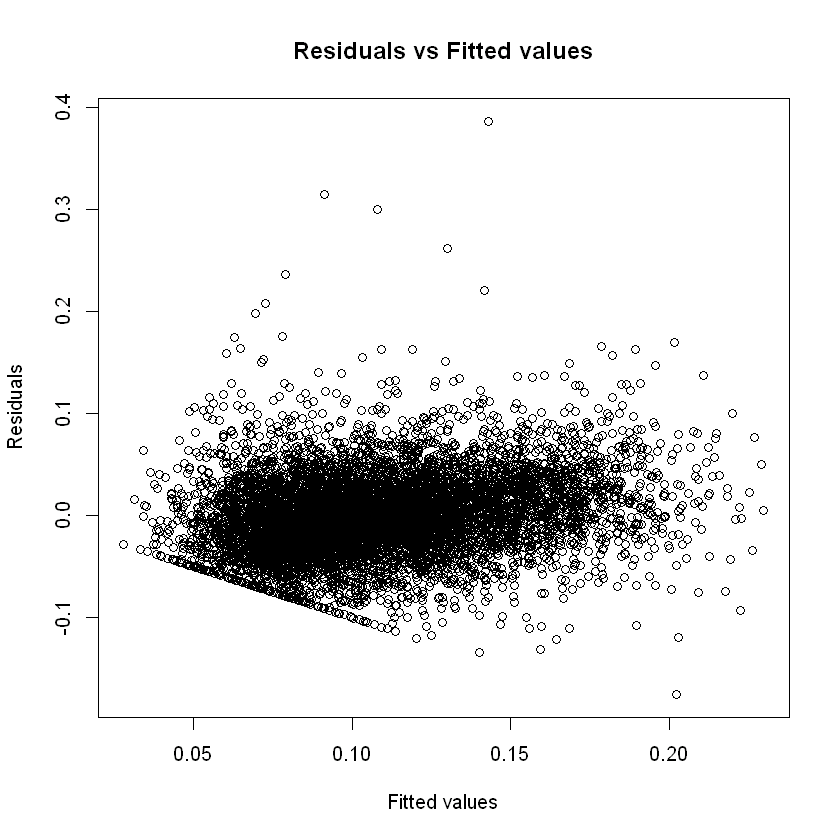

In [241]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
yhat = fitted(modelo)
uhat = residuals(modelo)
plot(yhat, uhat,
    main = 'Residuals vs Fitted values',
    ylab = 'Residuals',
    xlab = 'Fitted values') # El parámetro which=1 genera el grafico residuos = f(valores ajustados)

In [242]:
# Evidencia numérica para comprobar la existencia de una relación lineal entre los valores ajustados y los residuos

# Paso 1: verificar normalidad de los valores ajustados y residuos
# H0: la variable se ajusta a una distribución normal
lillie.test(yhat)
lillie.test(uhat)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  yhat
D = 0.062389, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  uhat
D = 0.042176, p-value < 2.2e-16


El p-valor obtenido en el contraste de bondad de ajuste para los valores ajustados y los residuos del modelo es inferior a < 2.2e-16, para ambas variables. Al ser ambos valores inferiores al nivel de significación del $5\%$, rechazamos la hipótesis nula o en otras palabras, existe evidencia estadísticamente significativa de que los valores ajustados y los residuos del modelo NO se ajustan a una distribución normal y consecuentemente, se emplea el método de `Kendall` para contrastar la correlación lineal de los valores ajustados con los residuos del modelo, ya que dicho modelo no precisa de la condición de normalidad.

In [243]:
# Evidencia numérica y contraste de linealidad mediante método de Pearson
# H0 (Hipótesis Nula): las variables son independientes (r=0)
# H1 (Hipótesis Alternativa): las variables están correlacionadas (r!=0)
cor.test(x = yhat, y = uhat, method = 'kendall')


	Kendall's rank correlation tau

data:  yhat and uhat
z = 20.357, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1507493 


**INTERPRETACIÓN DE RESULTADOS** Conclusiones extraídas del gráfico Residuos vs Valores Ajustados y evidencia numérica:

El `p-valor` obtenido es inferior a <2.2e-16 para el contraste de correlación lineal entre los valores ajustados y los residuos. Dicho `p-valor` es inferior al nivel de significación del $5\%$ y por lo tanto, <u>existe evidencia estadísticamente significativa de que los valores ajustados y los residuos están linealmente correlacionados.

- Para que las variables consideradas en el modelo estén linealmente relacionadas, no se debe observar ningún tipo de patrón no aleatorio en la gráfica de residuos vs valores ajustados. En este caso, la evidencia numérica de correlación entre los valores ajustados vs residuos y su correspondiente contraste de hipótesis indican que hay evidencia estadísticamente significativa para afirmar que los valores ajustados y los residuos están relacionados linealmente.

En resumen, se obtiene una `Evidencia NEGATIVA` en esta primera valoración realizada mediante el gráfico residuos vs valores ajustados.

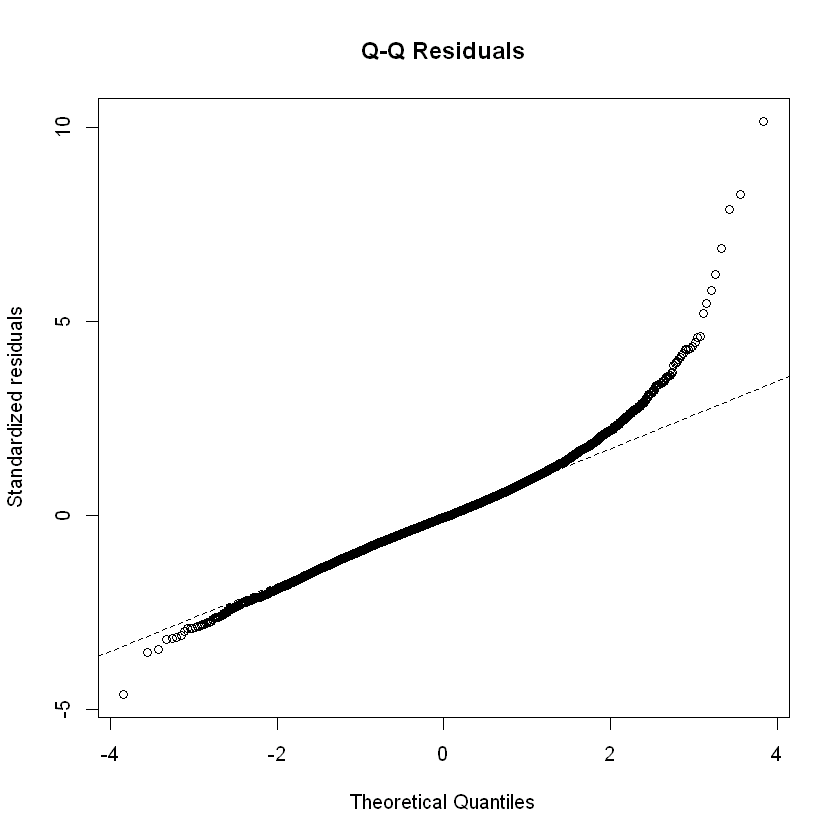

In [244]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
# Cáculo de residuos estandarizados
standardized_residuals = uhat / sqrt(sum(uhat^2) / length(uhat))

# Dibujamos gráfico Quantile-Quantile de los residuos
qqnorm(standardized_residuals, main = "Q-Q Residuals", 
       xlab = "Theoretical Quantiles", ylab = "Standardized residuals", pch = 1)
qqline(standardized_residuals, lty = 2)

**INTERPRETACIÓN DE RESULTADOS** La normalidad de los residuos es clave para que los intervalos de confianza y los valores p (de las pruebas de hipótesis sobre los coeficientes) sean válidos. Si los residuos no son normales, las predicciones del modelo pueden no ser confiables.

La anterior gráfica representa el gráfico Quantile-Quantile de residuos que evalua si dichos residuos siguen una distribución normal.

Conclusiones extraidas del gráfico y evidencia numérica:

- Se observa como la mayoría de los puntos del gráfico se ajustan bastante bien a la diagonal. Sin embargo, se observa como los los valores extremos se alejan de la diagonal, sugiriendo que la distribución de los residuos no se ajusta a una normal y consecuentemente, no tenemos la confianza de que los cálculos de las pruebas de hipótesis y los intervalos de confianza sean precisos para este modelo. Este aumento en la variabilidad de los residuos puede ser indicio de heterocedasticidad.

- En el anterior apartado se ha realizado el correspondiente contraste de hipótesis confirmando que los residuos NO se ajustan a una distribución normal. Obteniendo una doble evidencia (gráfica y numérica) además del correspondiente contraste que confirma la NO condición de normalidad en la distribución de los residuos.

En resumen, nuestro mejor modelo no ha pasado esta segunda valoración realizada mediante el gráfico Q-Q de residuos, obteniendo una`Evidencia NEGATIVA`.

Warning message in sqrt(standardized_residuals):
"Se han producido NaNs"


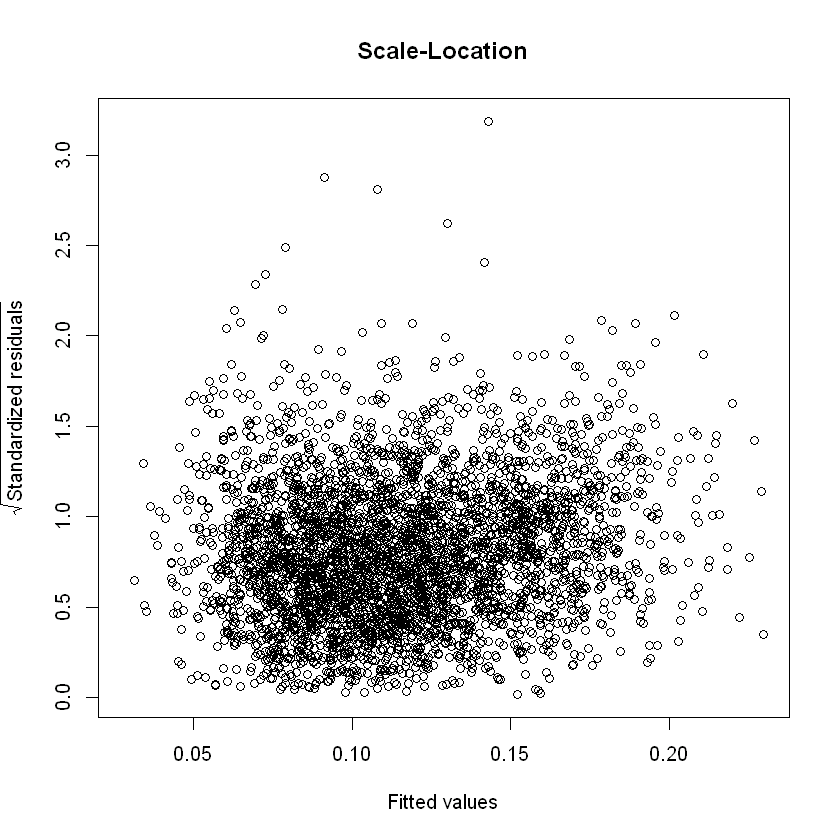

In [245]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(yhat, sqrt(standardized_residuals),
    main = 'Scale-Location',
    xlab = 'Fitted values',
    ylab = expression(sqrt('Standardized residuals')))

Para contrastar la hipótesis de varianza constante en los residuos, podemos utilizar las pruebas de `Breusch-Pagan` (se debe cumplir la normalidad en los residuos) o `White` (no es necesario cumplir la normalidad en los residuos). Dado que ya se ha contrastado que los residuos NO se ajustan a una distribución normal, emplearemos la prueba de `White` para contrastar la hipótesis de varianza constante en los residuos:

In [246]:
# Constraste de varianza constante en los residuos mediante el test de White
#library(sandwich)
#library(lmtest)

# Regresión auxiliar de los residuos al cuadrado en las variables explicativas
reg_auxiliar = lm(uhat^2 ~ MUNIC_ESP$POB16_64 + MUNIC_ESP$RENTPCAP07, data = MUNIC_ESP)

# Realizar el test de heterocedasticidad de Breusch-Pagan sobre los residuos cuadráticos
# H0: la varianza de los residuos es igual a 0 (homocedasticidad)
bptest(reg_auxiliar)


	studentized Breusch-Pagan test

data:  reg_auxiliar
BP = 7.7352, df = 2, p-value = 0.02091


**INTERPRETACIÓN DE RESULTADOS** El gráfico de arriba representa la raíz cuadrada de los residuos estandarizados vs valores ajustados. El objetivo de este gráfico es analizar la heterocedasticidad de los residuos del modelos. Este tipo de modelos parten de la base de que los residuos deben tener una varianza constante para que los cálculos del modelo y los intervalos de confianza sean fiables.

Conclusiones extraídas:

- Para verificar gráficamente que los residuos no presentan heterocedasticidad, no se debe observar ningún tipo de patrón no aleatorio en la gráfica de raíz cuadrada de los residuos vs valores ajustados. En este caso, no se puede extraer ninguna conclusión y nos tenemos que basar en la evidencia numérica y correspondiente contraste.

- El contraste de varianza constante de los residuos realizado mediante el test de `White`, nos evidencia que el modelo presenta heterocedasticidad o en otras palabras, hay evidencia estadísticamente significativa de que la varianza de los residuos del modelo NO es constante.

En resumen, nuestro mejor modelo no ha pasado esta tercera valoración realizada mediante el gráfico de residuos estandarizados vs valores ajustados, obteniendo una `Evidencia NEGATIVA`.

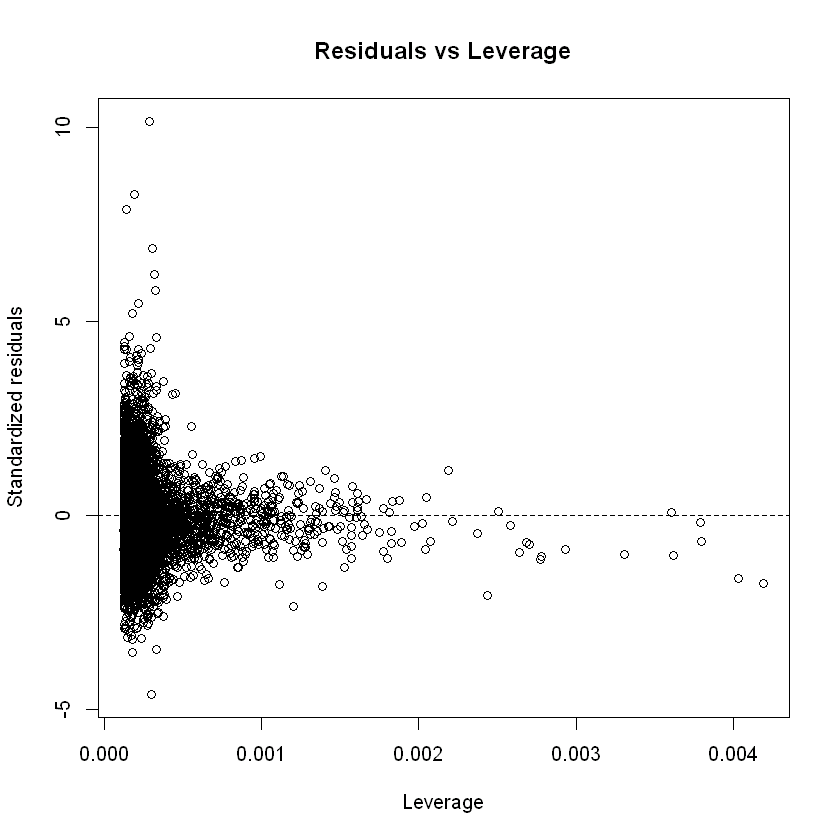

In [247]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
# Calcular la matriz de diseño X (del modelo SEM)
X = cbind(1, MUNIC_ESP$POB16_6, MUNIC_ESP$RENTPCAP07) 

# Calcular la matriz de apalancamiento (hat values)
# Los valores de apalancamiento se obtienen usando la fórmula H = X * (X'X)^(-1) * X'
# Pero en modelos espaciales, esto puede requerir el uso de la matriz de pesos espaciales también.
# Aquí se utiliza una aproximación simple basada en la matriz de diseño.
H = X %*% solve(t(X) %*% X) %*% t(X)

# Extraer los valores de apalancamiento
apalancamiento = diag(H)

# Crear el gráfico de residuos estandarizados vs apalancamiento
plot(apalancamiento, standardized_residuals,
     main = "Residuals vs Leverage",
     xlab = "Leverage", ylab = "Standardized residuals",
     pch = 1)
abline(h = 0,  lty = 2)  # Línea horizontal en 0

In [248]:
# Evidencia numérica de cantidad de puntos influyentes
# Cálculo del estadístico de la distancia de Cook
distancia_cook = standardized_residuals^2 * apalancamiento / (1 - apalancamiento)^2

# Identificar observaciones con alta influencia
umbral = 1 # Si distancia_cook > umbral -> punto influyente en el modelo
observaciones_influyentes = which(distancia_cook > umbral)

# Mostramos por pantalla el número de puntos influyentes
length(observaciones_influyentes)

[1] 0

**INTERPRETACIÓN DE RESULTADOS** La gráfica de arriba representa los residuos estandarizados frente al apalancamiento (leverage). El eje X representa el apalancamiento de cada observación. Los puntos con un apalancamiento alto tienen mayor capacidad para influir en el ajuste del modelo. El objetivo de este gráfico es:

- Identificar los puntos con alta influencia en el modelo (impacto desproporcionado en la determinación de los parámetros del modelo).
  
- Puntos aberrantes con valor muy alto de residuo asociado.

- Puntos con efecto palanca (leverage), es decir, predicciones no satisfactorias realizdas por el modelo.

Conslusiones extraídas:

- Visualmente, no se observa ningún punto fuera de las curvas de Cook. Además, la evidencia numérica confirma esta misma información. Consecuentemente, el modelo no presenta puntos con un impacto desproporcionado en la determinación de los parámetros del modelo, obteniendo en este sentido, una `Evidencia POSITIVA`.

- Se observan varios puntos muy negativos y con un apalancamiento significativo o en otras palabras, puntos aberrantes (puntos con valores de muy alto de residuo asociado). Por lo tanto, obtenemos una `Evidencia NEGATIVA` en este apartado.

- No se observan puntos muy positivos y con mucho apalancamiento o en otras palabras, el modelo no presenta puntos que no ha sido capaz de predecir correctamente. En este caso, obtenemos una `Evidencia POSITIVA`.

In [249]:
# Gráfico 5: Diagnosis para comprobar multicolinealidad
# Contraste de bondad de ajuste para comprobar si las variables dependientes se ajustan a una distribución normal
lillie.test(MUNIC_ESP$POB16_64)
lillie.test(MUNIC_ESP$RENTPCAP07)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  MUNIC_ESP$POB16_64
D = 0.45026, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  MUNIC_ESP$RENTPCAP07
D = 0.11737, p-value < 2.2e-16


Observamos como los valores obtenidos del p-valor para las variables independientes son menores al nivel de significación del $5\%$ y por lo tanto, las variables independientes no se ajustan a una distribución normal. Emplearemos el método de Kendall para contrastar la correlación entre las variables dependientes:

In [250]:
# Contraste y evidencia numérica mediante el cálculo del coeficiente de correlación
# H0 (Hipótesis Nula): las variables son independientes (r = 0)
# H1 (Hipótesis Alternativa): las variables están correlacionadas (r != 0)
cor.test(x = MUNIC_ESP$POB16_64, y = MUNIC_ESP$RENTPCAP07, method = 'kendall')


	Kendall's rank correlation tau

data:  MUNIC_ESP$POB16_64 and MUNIC_ESP$RENTPCAP07
z = 49.778, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.3688274 


**INTERPRETACIÓN DE RESULTADOS** Con el contraste de correlación realizado entre las variables independientes del modelo, el p-valor obtenido es inferior al nivel de significación del $5\%$. Es decir, existe evidencia estadísticamente significativa de que las variables independientes del modelo están relacionadas. Sin embargo, se observa que el coeficiente de correlación con valor 0.3688274 no es muy elevado y por lo tanto, podemos considerar que el modelo no presenta problemas de multicolinealidad, obteniendo una `Evidencia POSITIVA` en este apartado de diagnosis del modelo.

La multicolinealidad representa un problema para los modelos de regresión múltiple ya que el cálculo de los coeficientes es poco fiables debido a que al modelo le cuesta distinguir el efecto individual de cada variable independiente sobre la dependiente. Como su propio nombre indica, las variables independientes deben ser independientes entre ellas. En caso contrario, los coeficientes de regresión pueden cambiar drásticamente ante un mínimo cambio en los datos de entrenamiento del modelo.

Como conclusión final del proceso de diagnosis del modelo, hemos obtenido un total de 7 evidencias 3 positivas y 4 negativas. Por lo tanto, el modelo espacial seleccionado no se puede considerar como bueno para predecir la tasa de paro en los municipios de España.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>